# Macro UPI Transaction Trends

## Problem Statement

India’s Unified Payments Interface (UPI) has seen sustained growth in transaction volumes, transaction values, and participation across banks and payment applications. While overall growth is expected, certain periods may display abnormal patterns that warrant closer examination.

The objective of this analysis is to model normal macro-level UPI behavior and identify statistically significant deviations using only aggregated, publicly available data.

---

## Objectives

### Modeling Normal Behavior

The analysis will establish baseline system-wide behavior with respect to:

- Growth rates of UPI transaction volumes and values  
- Seasonal and calendar-driven patterns  
- Distribution and concentration of transactions across banks and UPI apps  

---

### Detection of Deviations

The study will flag periods or entities exhibiting deviations from expected behavior, including:

- Sudden increases or decreases in total UPI transaction volume or value inconsistent with historical trends  
- Abrupt or repeated changes in a bank’s or app’s market share relative to peers  
- Periods where observed system growth diverges from expected seasonal or long-term patterns  

---

## Anomaly Interpretation

For each identified deviation, the analysis will:

- Classify the event as either:
  - a potential business or operational signal, or  
  - a likely data-quality or reporting artefact  
- Provide a brief explanation grounded in publicly available, aggregate-level information  
- Avoid individual transaction-level or fraud-detection analysis  

---

## Data Sources

All data used in this analysis will be sourced exclusively from the following MOSPI publications:

| Year | Publication | Link |
|----|----|----|
| 2022 | Datasets and Registries in India | https://www.mospi.gov.in/sites/default/files/publication_reports/Datasets%20and%20Registries%20in%20India%202022.pdf |
| 2023 | Compendium of Datasets and Registries in India | https://www.mospi.gov.in/sites/default/files/Compendium_of_Datasets_and_Registries_in_India_2023.pdf |
| 2024 | Compendium of Datasets and Registries in India | https://www.mospi.gov.in/sites/default/files/publication_reports/Compendium_of_Datasets_and_Registries_in_India_2024_1.pdf |

---

## Evaluation Requirements

- A working hyperlink to the exact dataset downloaded from the MOSPI portal will be provided.  
- The choice of dataset sample from the above sources will be part of the evaluation.  

---

## Scope

**Included**
- Macro-level UPI trends  
- Aggregated system and entity-level data  
- Trend, seasonality, and concentration analysis  

**Excluded**
- Individual transaction analysis  
- User- or merchant-level behavior  
- Fraud detection  


# 1. Dataset Description

## RBI Payment System Indicators (PSDDP) - Daily level
 
- **Frequency**: Daily
- **Coverage**: June 1, 2020 → November 30, 2025 (2,009 records)
- **Granularity**: Aggregated system-level settlement data
- **Publisher**: Reserve Bank of India (RBI)
- **Source**: https://rbidocs.rbi.org.in/rdocs/content/docs/PSDDP04062020.xlsx

This dataset is publicly available and published by the Reserve Bank of India.  
The version used in this analysis is a cleaned and consolidated dataset created from the original PSDDP releases.

All figures represent aggregated daily totals across payment systems.  
No individual transaction, customer, or account-level information is included.

---

**What it contains:**
- Daily transaction counts and values for 24+ payment systems (UPI, IMPS, NEFT, Cards, AEPS, etc.)
- All figures represent aggregated daily totals across all banks
- No individual transaction or customer data

## Column Explanations

The dataset reports **transaction volume** and **transaction value** for major payment and settlement systems in India.

- **`_vol`** denotes the number of transactions (in lakhs)  
- **`_val`** denotes the total transaction value (₹ crore)

| Column | Explanation |
|------|-------------|
| **date** | Daily reporting date |
| **rtgs_vol / rtgs_val** | **Real Time Gross Settlement (RTGS)**: High-value, real-time interbank transfers, primarily used for wholesale and large-value payments, operated by RBI. |
| **neft_vol / neft_val** | **National Electronic Funds Transfer (NEFT)**: Retail electronic fund transfers processed in batches, available 24×7, operated by RBI. |
| **aeps_vol / aeps_val** | **Aadhaar Enabled Payment System (AePS)**: Aadhaar-based biometric transactions including cash withdrawal, deposit, balance enquiry, and fund transfer. |
| **upi_vol / upi_val** | **Unified Payments Interface (UPI)**: Instant mobile-based interbank payments, operated by NPCI. |
| **imps_vol / imps_val** | **Immediate Payment Service (IMPS)**: Instant interbank fund transfers available 24×7, operated by NPCI. |
| **nach_credit_vol / nach_credit_val** | **NACH Credit**: Bulk credit transactions such as salaries, pensions, dividends, and government transfers. |
| **nach_debit_vol / nach_debit_val** | **NACH Debit**: Bulk debit transactions such as EMIs, utility bills, and subscription collections. |
| **netc_vol / netc_val** | **National Electronic Toll Collection (NETC)**: FASTag-based electronic toll payments, operated by NPCI. |
| **bbps_vol / bbps_val** | **Bharat Bill Payment System (BBPS)**: Centralized platform for utility and bill payments, operated by NPCI. |
| **cts_vol / cts_val** | **Cheque Truncation System (CTS)**: Electronic cheque clearing system without physical cheque movement. |
| **credit_pos_vol / credit_pos_val** | Credit card transactions at physical Point-of-Sale (PoS) terminals. |
| **credit_ecom_vol / credit_ecom_val** | Credit card transactions for e-commerce and online purchases. |
| **debit_pos_vol / debit_pos_val** | Debit card transactions at physical PoS terminals. |
| **debit_ecom_vol / debit_ecom_val** | Debit card transactions for e-commerce purchases. |
| **ppi_pos_vol / ppi_pos_val** | Prepaid Payment Instrument (PPI) transactions at PoS terminals. |
| **ppi_ecom_vol / ppi_ecom_val** | PPI transactions for e-commerce. |
| **credit_combined_vol / credit_combined_val** | Combined credit card transactions (PoS and e-commerce). |
| **debit_combined_vol / debit_combined_val** | Combined debit card transactions (PoS and e-commerce). |
| **ppi_combined_vol / ppi_combined_val** | Combined PPI transactions (PoS and e-commerce). |
| **nfs_vol / nfs_val** | **National Financial Switch (NFS)**: Interbank ATM network for cash withdrawals and related services. |
| **aeps_bc_vol / aeps_bc_val** | AePS transactions conducted via Business Correspondents (Bank Mitras) using micro-ATMs. |
| **gov_sec_vol / gov_sec_val** | Transactions in Government Securities, including central and state government bonds. |
| **forex_vol / forex_val** | Foreign exchange market transactions, including spot and forward deals. |
| **rupee_der_vol / rupee_der_val** | Rupee-based derivative transactions such as interest rate and currency derivatives. |


# 1.1 Exploratory Data Analysis

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
from scipy import stats
from statsmodels.tsa.seasonal import STL
import json

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
psddp = pd.read_csv(
    "../data/processed/psddp_clean.csv",
    parse_dates=["date"]
)

In [3]:
psddp.shape

(2030, 49)

In [4]:
psddp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 2030 non-null   datetime64[ns]
 1   rtgs_vol             2030 non-null   object        
 2   rtgs_val             2030 non-null   object        
 3   neft_vol             2030 non-null   float64       
 4   neft_val             2030 non-null   float64       
 5   aeps_vol             2030 non-null   float64       
 6   aeps_val             2030 non-null   float64       
 7   upi_vol              2030 non-null   float64       
 8   upi_val              2030 non-null   float64       
 9   imps_vol             2030 non-null   float64       
 10  imps_val             2030 non-null   float64       
 11  nach_credit_vol      2030 non-null   object        
 12  nach_credit_val      2030 non-null   object        
 13  nach_debit_vol       2030 non-nul

In [5]:
psddp.head()

,date,rtgs_vol,rtgs_val,neft_vol,neft_val,aeps_vol,aeps_val,upi_vol,upi_val,imps_vol,imps_val,nach_credit_vol,nach_credit_val,nach_debit_vol,nach_debit_val,netc_vol,netc_val,bbps_vol,bbps_val,cts_vol,cts_val,credit_pos_vol,credit_pos_val,credit_ecom_vol,credit_ecom_val,debit_pos_vol,debit_pos_val,debit_ecom_vol,debit_ecom_val,ppi_pos_vol,ppi_pos_val,ppi_ecom_vol,ppi_ecom_val,credit_combined_vol,credit_combined_val,debit_combined_vol,debit_combined_val,ppi_combined_vol,ppi_combined_val,nfs_vol,nfs_val,aeps_bc_vol,aeps_bc_val,gov_sec_vol,gov_sec_val,forex_vol,forex_val,rupee_der_vol,rupee_der_val
0,2020-06-01,4.85,436996.69,172.11000,104275.130000,0.43618,7.682205,476.96710,10413.108975,76.80648,9072.554678,84.86,6326.17,20.12,2084.74,23.82175,44.367367,5.43,95.36,17.5486,15056.2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.81840,4764.812000,29.01883,696.561179,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-06-02,4.5434,361878.87153189996,100.06772,65259.016108,0.44138,7.665516,476.78182,9951.298586,72.24891,8215.412747,143.33,14387.49,63.13,3613.36,24.38030,46.225374,5.21,81.15,18.25,16041.190345467969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.13087,4781.974663,28.29832,676.752623,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-06-03,4.30157,330632.89225813,100.36426,62985.750191,0.43952,7.476038,456.25930,9622.375213,68.14805,7653.707593,40.66,2985.88,38.46,2288.95,25.36248,47.213057,5.24,81.36,16.76,14536.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.48995,4426.915552,28.85204,668.884848,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-06-04,4.35152,329072.447410464,94.65655,63148.288625,0.44828,7.323838,463.04959,9639.502869,70.68543,7705.893342,286.04,5113.36,37.8,3592.44,25.80935,48.389065,5.51,83.05,17.39,14865.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.38002,4424.531824,29.56756,648.922639,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-06-05,4.56267,365468.95198416803,111.26259,68932.718600,0.47535,7.324794,464.79398,9539.524729,72.99507,7705.245526,70.96000000000001,3166.1,88.48,9558.57,25.99207,48.601433,5.33,85.94,18.25,15214.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.19150,4321.009311,32.65205,646.989160,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
psddp = psddp[psddp["date"] < "2025-12-01"]  # Exclude incomplete December 2025
psddp.shape

(2009, 49)

In [7]:
print(psddp.columns.tolist())

['date', 'rtgs_vol', 'rtgs_val', 'neft_vol', 'neft_val', 'aeps_vol', 'aeps_val', 'upi_vol', 'upi_val', 'imps_vol', 'imps_val', 'nach_credit_vol', 'nach_credit_val', 'nach_debit_vol', 'nach_debit_val', 'netc_vol', 'netc_val', 'bbps_vol', 'bbps_val', 'cts_vol', 'cts_val', 'credit_pos_vol', 'credit_pos_val', 'credit_ecom_vol', 'credit_ecom_val', 'debit_pos_vol', 'debit_pos_val', 'debit_ecom_vol', 'debit_ecom_val', 'ppi_pos_vol', 'ppi_pos_val', 'ppi_ecom_vol', 'ppi_ecom_val', 'credit_combined_vol', 'credit_combined_val', 'debit_combined_vol', 'debit_combined_val', 'ppi_combined_vol', 'ppi_combined_val', 'nfs_vol', 'nfs_val', 'aeps_bc_vol', 'aeps_bc_val', 'gov_sec_vol', 'gov_sec_val', 'forex_vol', 'forex_val', 'rupee_der_vol', 'rupee_der_val']


In [8]:
psddp.describe()

,date,neft_vol,neft_val,aeps_vol,aeps_val,upi_vol,upi_val,imps_vol,imps_val,netc_vol,netc_val,bbps_vol,bbps_val,credit_ecom_vol,credit_ecom_val,debit_pos_vol,debit_pos_val,debit_ecom_vol,debit_ecom_val,ppi_pos_vol,ppi_pos_val,ppi_ecom_vol,ppi_ecom_val,credit_combined_vol,credit_combined_val,debit_combined_vol,debit_combined_val,ppi_combined_vol,ppi_combined_val,nfs_vol,nfs_val,aeps_bc_vol,aeps_bc_val
count,2009,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,1995.000000,1995.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,2009.000000,2009.000000,2009.000000,2009.000000
mean,2023-03-01 23:59:59.999999744,176.860352,99548.365470,0.590624,17.532207,3096.097920,45929.956344,141.476618,15427.593771,90.234623,152.076963,35.502483,1078.509195,37.314479,2442.204917,42.194840,1141.749530,20.552827,505.582866,2.928555,55.587320,2.996507,59.157581,64.424969,4504.907426,68.548674,1644.060969,5.759820,117.812513,97.528066,4106.499252,34.331751,1005.991057
min,2020-06-01 00:00:00,6.061600,2093.334083,0.160000,4.310000,289.002530,4333.739249,45.952000,3314.191724,22.743380,44.367367,1.360000,0.000000,11.042200,426.000988,15.181420,369.077256,4.300690,123.949874,0.483580,7.640919,0.516810,5.380776,12.225190,471.718168,21.925710,576.594075,1.167740,19.283133,0.531000,7.267640,9.920000,261.740000
25%,2021-10-16 00:00:00,111.213250,56153.883842,0.450000,13.990000,1341.270000,23272.130000,124.680000,10785.370000,68.810000,105.980000,16.070000,221.800000,29.194368,1631.468535,29.414210,757.946156,12.146963,382.553132,1.012167,17.214696,1.096180,34.503865,48.622743,2293.193830,44.525865,1175.867546,2.722672,65.331948,93.230000,3735.090000,26.860000,697.300000
50%,2023-03-02 00:00:00,164.805190,104322.693753,0.590000,17.800000,2737.560000,43870.340000,146.290000,15590.770000,97.490000,160.660000,29.610000,532.180000,35.362655,2277.087432,39.965180,947.453083,18.604825,492.287099,2.030835,20.884171,1.476300,54.797985,63.540450,3276.165950,65.092715,1446.048836,4.930010,87.554635,102.690000,4243.120000,31.010000,823.490000
75%,2024-07-16 00:00:00,247.414390,137192.144597,0.700000,20.920000,4741.360000,66808.910000,160.620000,19665.540000,111.750000,193.360000,46.175000,1155.985000,43.055715,3043.091238,51.911693,1153.783498,26.524082,601.645910,4.045872,38.943587,4.259548,74.130941,74.094535,4549.132042,87.841342,1770.914133,7.260170,130.842182,112.430000,4892.980000,35.580000,953.000000
max,2025-11-30 00:00:00,579.278180,396593.311768,1.680000,44.220000,7543.700000,110062.300000,256.870000,30741.630000,158.250000,269.700000,107.961430,7703.655114,107.589750,10554.451466,124.917950,10411.835440,76.721400,1328.254765,15.070380,814.417082,13.591990,241.628100,159.486960,50293.008436,201.639350,11286.525080,23.106100,836.194845,168.780000,7953.900000,127.460000,5912.820000
std,NaN,93.617594,59879.099730,0.200908,5.915556,1957.078167,25436.091130,29.211002,5414.654609,29.292980,53.292097,24.895961,1334.278212,12.432263,1097.967888,15.934274,790.559805,10.528585,174.846738,2.515126,107.108595,2.751486,34.689783,22.881048,5357.635538,28.997380,848.420031,3.889000,99.439667,27.824980,1267.251026,15.198148,782.633130


In [9]:
# Ensure date column is datetime
psddp['date'] = pd.to_datetime(psddp['date'], errors='coerce')

latest = psddp['date'].max()

print(f"Data till: {latest:%b %d, %Y}")

Data till: Nov 30, 2025


In [10]:
# Add time features
psddp["year"] = psddp["date"].dt.year
psddp["month"] = psddp["date"].dt.month
psddp["month_name"] = psddp["date"].dt.strftime("%B")
psddp["day_name"] = psddp["date"].dt.day_name()
psddp["quarter"] = psddp["date"].dt.quarter
psddp["week_of_year"] = psddp["date"].dt.isocalendar().week

In [11]:
psddp.head()

,date,rtgs_vol,rtgs_val,neft_vol,neft_val,aeps_vol,aeps_val,upi_vol,upi_val,imps_vol,imps_val,nach_credit_vol,nach_credit_val,nach_debit_vol,nach_debit_val,netc_vol,netc_val,bbps_vol,bbps_val,cts_vol,cts_val,credit_pos_vol,credit_pos_val,credit_ecom_vol,credit_ecom_val,debit_pos_vol,debit_pos_val,debit_ecom_vol,debit_ecom_val,ppi_pos_vol,ppi_pos_val,ppi_ecom_vol,ppi_ecom_val,credit_combined_vol,credit_combined_val,debit_combined_vol,debit_combined_val,ppi_combined_vol,ppi_combined_val,nfs_vol,nfs_val,aeps_bc_vol,aeps_bc_val,gov_sec_vol,gov_sec_val,forex_vol,forex_val,rupee_der_vol,rupee_der_val,year,month,month_name,day_name,quarter,week_of_year
0,2020-06-01,4.85,436996.69,172.11000,104275.130000,0.43618,7.682205,476.96710,10413.108975,76.80648,9072.554678,84.86,6326.17,20.12,2084.74,23.82175,44.367367,5.43,95.36,17.5486,15056.2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.81840,4764.812000,29.01883,696.561179,NaN,NaN,NaN,NaN,NaN,NaN,2020,6,June,Monday,2,23
1,2020-06-02,4.5434,361878.87153189996,100.06772,65259.016108,0.44138,7.665516,476.78182,9951.298586,72.24891,8215.412747,143.33,14387.49,63.13,3613.36,24.38030,46.225374,5.21,81.15,18.25,16041.190345467969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.13087,4781.974663,28.29832,676.752623,NaN,NaN,NaN,NaN,NaN,NaN,2020,6,June,Tuesday,2,23
2,2020-06-03,4.30157,330632.89225813,100.36426,62985.750191,0.43952,7.476038,456.25930,9622.375213,68.14805,7653.707593,40.66,2985.88,38.46,2288.95,25.36248,47.213057,5.24,81.36,16.76,14536.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.48995,4426.915552,28.85204,668.884848,NaN,NaN,NaN,NaN,NaN,NaN,2020,6,June,Wednesday,2,23
3,2020-06-04,4.35152,329072.447410464,94.65655,63148.288625,0.44828,7.323838,463.04959,9639.502869,70.68543,7705.893342,286.04,5113.36,37.8,3592.44,25.80935,48.389065,5.51,83.05,17.39,14865.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.38002,4424.531824,29.56756,648.922639,NaN,NaN,NaN,NaN,NaN,NaN,2020,6,June,Thursday,2,23
4,2020-06-05,4.56267,365468.95198416803,111.26259,68932.718600,0.47535,7.324794,464.79398,9539.524729,72.99507,7705.245526,70.96000000000001,3166.1,88.48,9558.57,25.99207,48.601433,5.33,85.94,18.25,15214.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.19150,4321.009311,32.65205,646.989160,NaN,NaN,NaN,NaN,NaN,NaN,2020,6,June,Friday,2,23


# 1.2 Daily Data Analysis

### What we'll discover
- Overall UPI growth trajectory (2020-2025)
- Year-over-year growth rates
- Seasonal patterns by month
- Weekly patterns (weekday vs weekend)
- Average transaction size trends
- Transaction value composition

## Daily Patterns


Daily Volume (Lakhs)
Min : 289
Avg : 3,096
Max : 7,544

Daily Value (₹ Crores)
Min : 4,334
Avg : 45,930
Max : 110,062

Average Transaction Size (₹)
Min : ₹916
Avg : ₹1,606
Max : ₹2,338


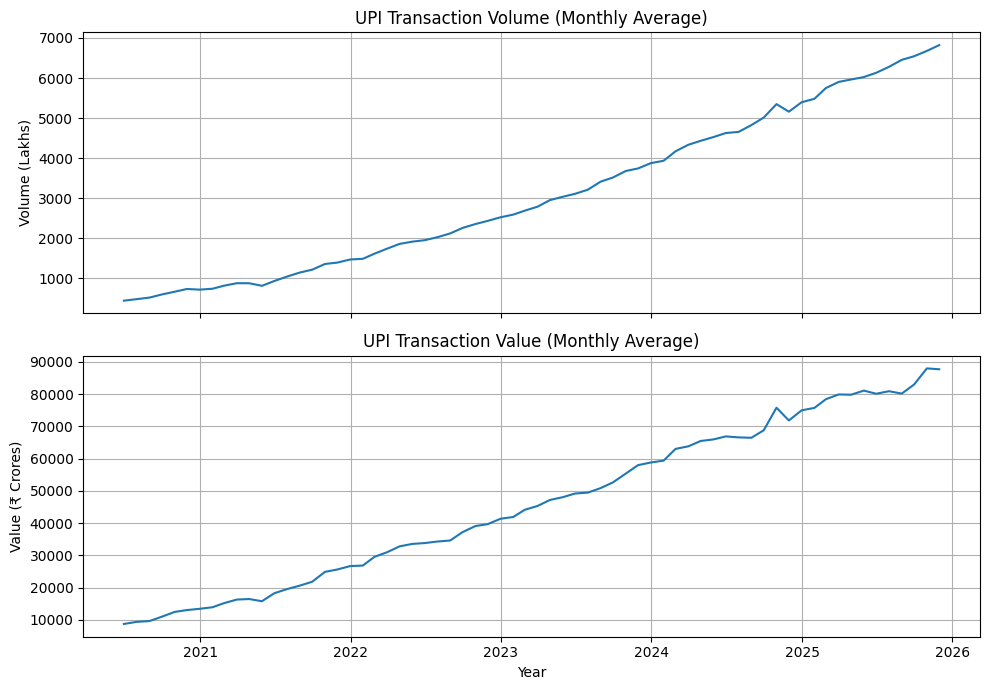

In [12]:
vol = psddp["upi_vol"]
val = psddp["upi_val"]

psddp["avg_txn_value_rs"] = (val / vol) * 100

print("\nDaily Volume (Lakhs)")
print(f"Min : {vol.min():,.0f}")
print(f"Avg : {vol.mean():,.0f}")
print(f"Max : {vol.max():,.0f}")

print("\nDaily Value (₹ Crores)")
print(f"Min : {val.min():,.0f}")
print(f"Avg : {val.mean():,.0f}")
print(f"Max : {val.max():,.0f}")

print("\nAverage Transaction Size (₹)")
print(f"Min : ₹{psddp['avg_txn_value_rs'].min():,.0f}")
print(f"Avg : ₹{psddp['avg_txn_value_rs'].mean():,.0f}")
print(f"Max : ₹{psddp['avg_txn_value_rs'].max():,.0f}")

import matplotlib.pyplot as plt

monthly_trend = (
    psddp.set_index("date")
    .resample("M")[["upi_vol", "upi_val"]]
    .mean()
)

fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

# Volume
axes[0].plot(monthly_trend.index, monthly_trend["upi_vol"])
axes[0].set_title("UPI Transaction Volume (Monthly Average)")
axes[0].set_ylabel("Volume (Lakhs)")
axes[0].grid(True)

# Value
axes[1].plot(monthly_trend.index, monthly_trend["upi_val"])
axes[1].set_title("UPI Transaction Value (Monthly Average)")
axes[1].set_ylabel("Value (₹ Crores)")
axes[1].set_xlabel("Year")
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Year-over-Year Growth Analysis

YEAR-OVER-YEAR GROWTH

Year   Avg Vol (L)  YoY %   Avg Val (Cr)  YoY %
2020          597     nan%        11,089     nan%
2021        1,061    77.8%        19,610    76.8%
2022        2,028    91.2%        34,505    76.0%
2023        3,222    58.8%        50,103    45.2%
2024        4,705    46.0%        67,439    34.6%
2025        6,187    31.5%        81,371    20.7%


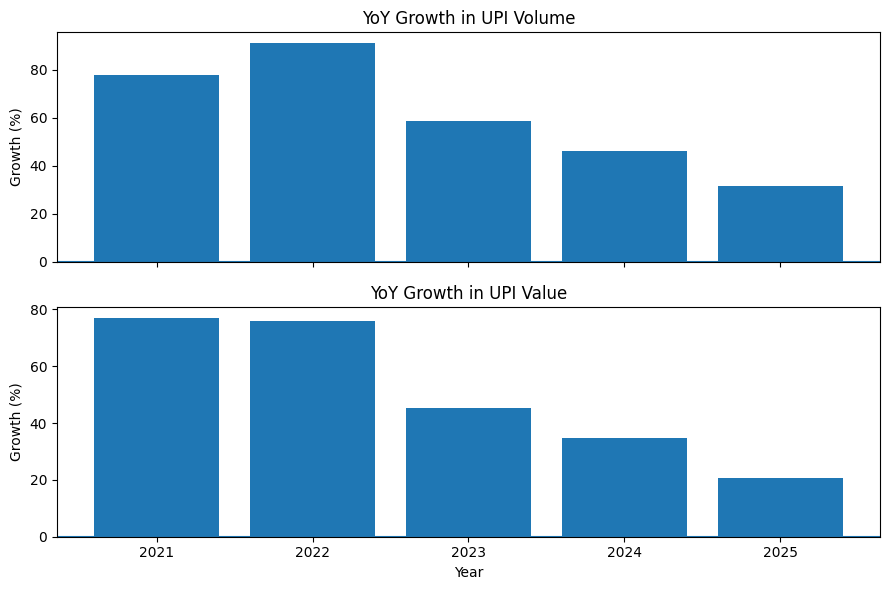

In [13]:
print("YEAR-OVER-YEAR GROWTH")

yearly = psddp.groupby("year")[["upi_vol", "upi_val"]].mean()

yearly["vol_yoy_%"] = yearly["upi_vol"].pct_change() * 100
yearly["val_yoy_%"] = yearly["upi_val"].pct_change() * 100

print("\nYear   Avg Vol (L)  YoY %   Avg Val (Cr)  YoY %")

for year, row in yearly.iterrows():
    print(
        f"{year:<6} "
        f"{row['upi_vol']:>10,.0f}  "
        f"{row['vol_yoy_%']:>6.1f}%   "
        f"{row['upi_val']:>11,.0f}  "
        f"{row['val_yoy_%']:>6.1f}%"
    )
yearly = psddp.groupby("year")[["upi_vol", "upi_val"]].mean()
yearly["vol_yoy"] = yearly["upi_vol"].pct_change() * 100
yearly["val_yoy"] = yearly["upi_val"].pct_change() * 100

fig, axes = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

# Volume YoY
axes[0].bar(yearly.index, yearly["vol_yoy"])
axes[0].axhline(0)
axes[0].set_title("YoY Growth in UPI Volume")
axes[0].set_ylabel("Growth (%)")

# Value YoY
axes[1].bar(yearly.index, yearly["val_yoy"])
axes[1].axhline(0)
axes[1].set_title("YoY Growth in UPI Value")
axes[1].set_ylabel("Growth (%)")
axes[1].set_xlabel("Year")

plt.tight_layout()
plt.show()


### Overlaid Yearwise Line Chart for UPI Transactions

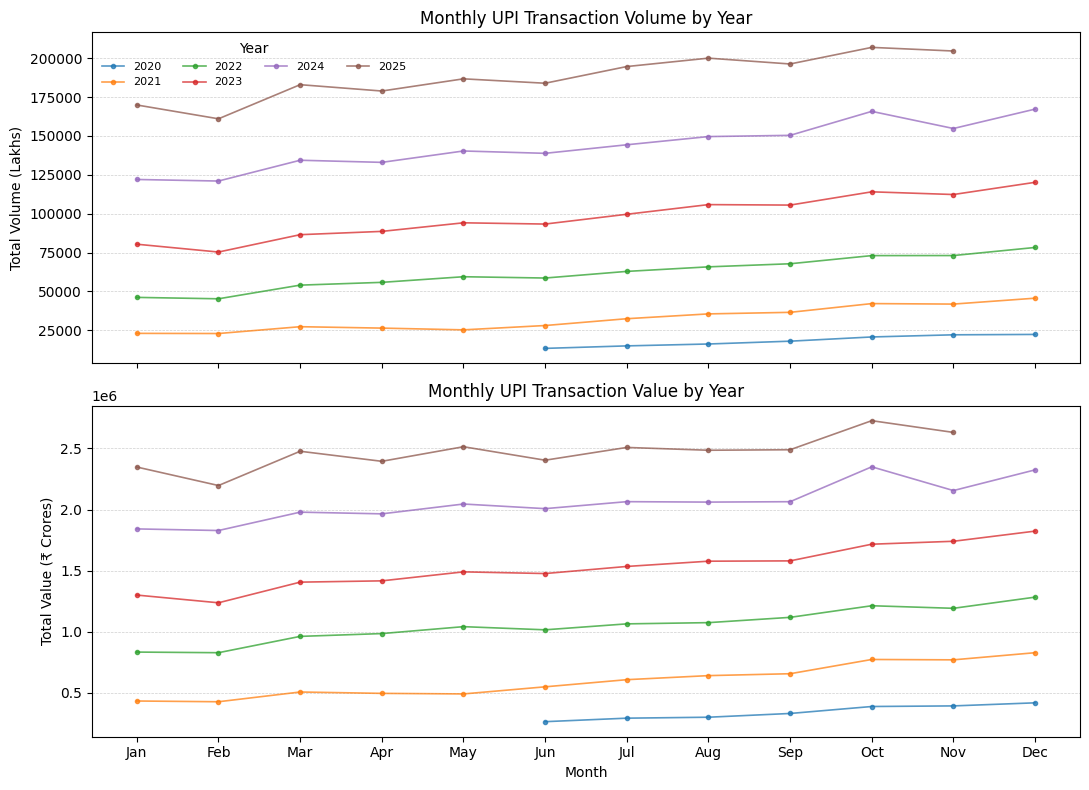

In [14]:
import matplotlib.pyplot as plt
import calendar

# Prepare data
monthly_year = (
    psddp
    .assign(month=psddp["date"].dt.month)
    .groupby(["year", "month"], as_index=False)
    .agg({
        "upi_vol": "sum",
        "upi_val": "sum"
    })
)

month_labels = [calendar.month_abbr[i] for i in range(1, 13)]

years = sorted(monthly_year["year"].unique())

# Create figure 
fig, (ax1, ax2) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(11, 8),
    sharex=True
)

# Volume
for y in years:
    d = monthly_year[monthly_year["year"] == y]
    ax1.plot(
        d["month"],
        d["upi_vol"],
        linewidth=1.2,
        marker="o",
        markersize=3,
        alpha=0.75,
        label=str(y)
    )

ax1.set_title("Monthly UPI Transaction Volume by Year")
ax1.set_ylabel("Total Volume (Lakhs)")
ax1.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.6)

# Value
for y in years:
    d = monthly_year[monthly_year["year"] == y]
    ax2.plot(
        d["month"],
        d["upi_val"],
        linewidth=1.2,
        marker="o",
        markersize=3,
        alpha=0.75
    )

ax2.set_title("Monthly UPI Transaction Value by Year")
ax2.set_ylabel("Total Value (₹ Crores)")
ax2.set_xlabel("Month")
ax2.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.6)

# X-axis
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(month_labels)

# Legend 
ax1.legend(
    title="Year",
    ncol=4,
    frameon=False,
    fontsize=8,
    loc="upper left"
)

plt.tight_layout()
plt.show()


## Monthly Seasonal Patterns

* Deviation % tells you how much a month is above or below the overall average.

MONTHLY SEASONAL PATTERNS (UPI)

Month        Avg Vol (L)  Dev %    Avg Val (Cr)  Dev %
January           2,849    -8.0%         43,557    -5.2%
February          3,019    -2.5%         46,185    +0.6%
March             3,131    +1.1%         47,264    +2.9%
April             3,219    +4.0%         48,348    +5.3%
May               3,265    +5.4%         48,888    +6.4%
June              2,868    -7.4%         42,834    -6.7%
July              2,952    -4.7%         43,365    -5.6%
August            3,081    -0.5%         43,728    -4.8%
September         3,193    +3.1%         45,739    -0.4%
October           3,349    +8.2%         49,261    +7.3%
November          3,383    +9.3%         49,314    +7.4%
December          2,799    -9.6%         43,049    -6.3%


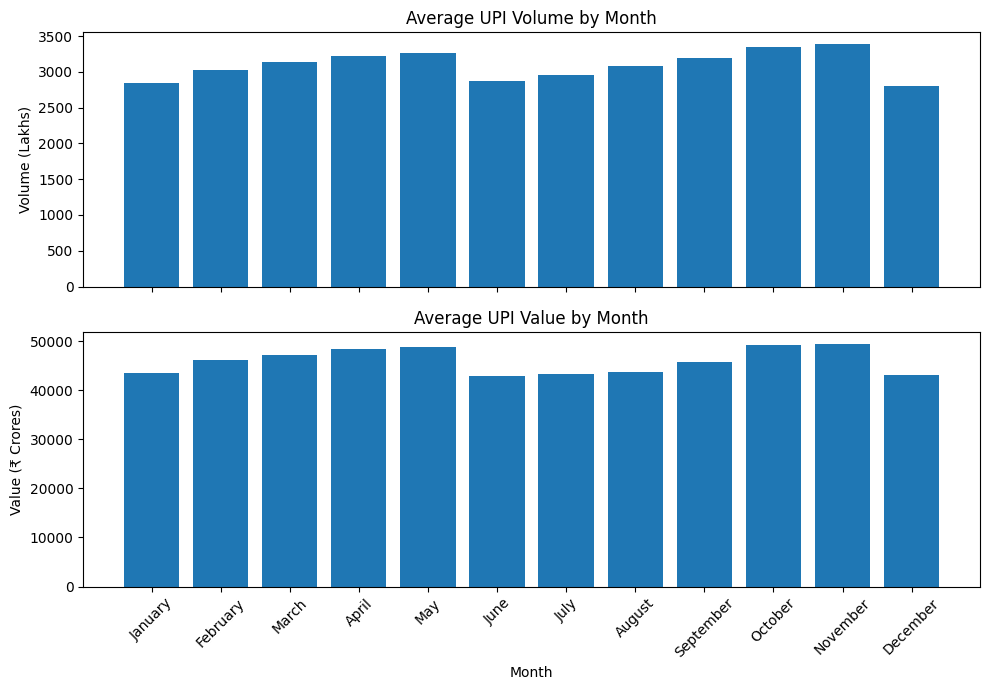

In [15]:
print("MONTHLY SEASONAL PATTERNS (UPI)")

month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

# Monthly averages
monthly = psddp.groupby("month_name")[["upi_vol", "upi_val"]].mean()
monthly = monthly.reindex(month_order)

# Overall daily averages
overall_vol = psddp["upi_vol"].mean()
overall_val = psddp["upi_val"].mean()

print("\nMonth        Avg Vol (L)  Dev %    Avg Val (Cr)  Dev %")

for month, row in monthly.dropna().iterrows():
    vol_dev = (row["upi_vol"] / overall_vol - 1) * 100
    val_dev = (row["upi_val"] / overall_val - 1) * 100

    print(
        f"{month:<12} "
        f"{row['upi_vol']:>10,.0f}  "
        f"{vol_dev:>+6.1f}%   "
        f"{row['upi_val']:>12,.0f}  "
        f"{val_dev:>+6.1f}%"
    )

month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

monthly = (
    psddp.groupby("month_name")[["upi_vol", "upi_val"]]
    .mean()
    .reindex(month_order)
)

fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

# Volume
axes[0].bar(monthly.index, monthly["upi_vol"])
axes[0].set_title("Average UPI Volume by Month")
axes[0].set_ylabel("Volume (Lakhs)")

# Value
axes[1].bar(monthly.index, monthly["upi_val"])
axes[1].set_title("Average UPI Value by Month")
axes[1].set_ylabel("Value (₹ Crores)")
axes[1].set_xlabel("Month")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Weekly Pattersn (Day of Week Analysis)

For each day of the week, deviation shows how that day compares to an average day. 

* +% means busier than average day
* -% quieter than average day

WEEKLY USAGE PATTERNS (UPI)

Day         Avg Vol (L)  Dev %    Avg Val (Cr)  Dev %
Monday          3,080    -0.5%         48,894    +6.5%
Tuesday         3,077    -0.6%         47,974    +4.4%
Wednesday       3,113    +0.5%         48,179    +4.9%
Thursday        3,097    +0.0%         47,638    +3.7%
Friday          3,112    +0.5%         46,823    +1.9%
Saturday        3,130    +1.1%         45,380    -1.2%
Sunday          3,064    -1.0%         36,624   -20.3%


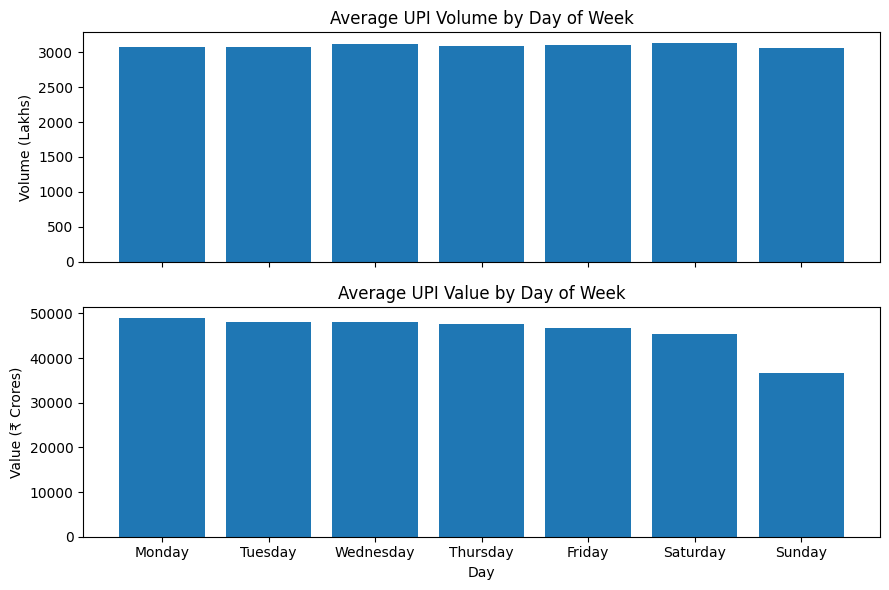

In [16]:
print("WEEKLY USAGE PATTERNS (UPI)")

day_order = [
    "Monday","Tuesday","Wednesday",
    "Thursday","Friday","Saturday","Sunday"
]

# Weekly (day-wise) averages
weekly = psddp.groupby("day_name")[["upi_vol", "upi_val"]].mean()
weekly = weekly.reindex(day_order)

# Overall daily averages
overall_vol = psddp["upi_vol"].mean()
overall_val = psddp["upi_val"].mean()

print("\nDay         Avg Vol (L)  Dev %    Avg Val (Cr)  Dev %")

for day, row in weekly.dropna().iterrows():
    vol_dev = (row["upi_vol"] / overall_vol - 1) * 100
    val_dev = (row["upi_val"] / overall_val - 1) * 100

    print(
        f"{day:<10} "
        f"{row['upi_vol']:>10,.0f}  "
        f"{vol_dev:>+6.1f}%   "
        f"{row['upi_val']:>12,.0f}  "
        f"{val_dev:>+6.1f}%"
    )

day_order = [
    "Monday","Tuesday","Wednesday",
    "Thursday","Friday","Saturday","Sunday"
]

weekly = (
    psddp.groupby("day_name")[["upi_vol", "upi_val"]]
    .mean()
    .reindex(day_order)
)

fig, axes = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

# Volume
axes[0].bar(weekly.index, weekly["upi_vol"])
axes[0].set_title("Average UPI Volume by Day of Week")
axes[0].set_ylabel("Volume (Lakhs)")

# Value
axes[1].bar(weekly.index, weekly["upi_val"])
axes[1].set_title("Average UPI Value by Day of Week")
axes[1].set_ylabel("Value (₹ Crores)")
axes[1].set_xlabel("Day")

plt.tight_layout()
plt.show()


# 1.3 Trend & Anomaly Detection Analysis

### What we'll do
1. Calculate trend-adjusted baselines for each month
2. Identify statistically significant deviations (anomalies)
3. Classify anomalies by severity and business impact
4. Analyze multi-system correlation

### The Baseline Concept

Before we can find anomalies, we need to define what "normal" looks like. UPI volume isn't random—it follows patterns:

- **Growth Trend**: Overall upward growth from 2020 to 2025
- **Seasonal Pattern**: October-November is higher (Diwali), December-June is lower
- **Weekly Pattern**: Weekdays slightly different from weekends

**Our Strategy**: 
1. Calculate what we expect the volume to be on any given day (based on historical patterns)
2. Compare actual volume to expected
3. Flag days where actual is much different from expected (>2 standard deviations)

### What's "2 Standard Deviations"?

If we look at normal distribution:
- **±1 std dev**: Captures ~68% of normal variation (expected)
- **±2 std dev**: Captures ~95% of normal variation (mostly expected)
- **Beyond ±2 std dev**: Only 5% of days fall here (unusual!)

This is our threshold for flagging anomalies.

In [17]:
# Monthly baseline (mean & std)
baseline = (
    psddp.groupby('month')[['upi_vol', 'upi_val']]
    .agg(['mean', 'std'])
    .round(0)
)

baseline.columns = ['vol_mean', 'vol_std', 'val_mean', 'val_std']
baseline = baseline.reset_index()

psddp['vol_mean'] = psddp['month'].map(
    baseline.set_index('month')['vol_mean']
)

psddp['vol_std'] = psddp['month'].map(
    baseline.set_index('month')['vol_std']
)

psddp['val_mean'] = psddp['month'].map(
    baseline.set_index('month')['val_mean']
)

psddp['val_std'] = psddp['month'].map(
    baseline.set_index('month')['val_std']
)

psddp['vol_z'] = (psddp['upi_vol'] - psddp['vol_mean']) / psddp['vol_std']
psddp['val_z'] = (psddp['upi_val'] - psddp['val_mean']) / psddp['val_std']

threshold = 2.5

psddp['vol_anomaly'] = psddp['vol_z'].abs() > threshold
psddp['val_anomaly'] = psddp['val_z'].abs() > threshold

psddp['any_anomaly'] = psddp['vol_anomaly'] | psddp['val_anomaly']

vol_cnt = psddp['vol_anomaly'].sum()
val_cnt = psddp['val_anomaly'].sum()
any_cnt = psddp['any_anomaly'].sum()

print(f"Volume anomalies : {vol_cnt}")
print(f"Value anomalies  : {val_cnt}")
print(f"Any anomaly      : {any_cnt} ({any_cnt/len(psddp)*100:.2f}%)")

top_vol = (
    psddp[psddp['vol_anomaly']]
    .assign(
        vol_dev=lambda x: x['upi_vol'] - x['vol_mean'],
        vol_dev_pct=lambda x: (x['upi_vol'] - x['vol_mean']) / x['vol_mean'] * 100
    )
    .sort_values('vol_z', key=abs, ascending=False)
    .head(10)
)

top_vol[['date', 'day_name', 'upi_vol', 'vol_mean', 'vol_dev', 'vol_dev_pct', 'vol_z']]

top_val = (
    psddp[psddp['val_anomaly']]
    .assign(
        val_dev=lambda x: x['upi_val'] - x['val_mean'],
        val_dev_pct=lambda x: (x['upi_val'] - x['val_mean']) / x['val_mean'] * 100
    )
    .sort_values('val_z', key=abs, ascending=False)
    .head(10)
)

top_val[['date', 'day_name', 'upi_val', 'val_mean', 'val_dev', 'val_dev_pct', 'val_z']]



Volume anomalies : 0
Value anomalies  : 1
Any anomaly      : 1 (0.05%)


,date,day_name,upi_val,val_mean,val_dev,val_dev_pct,val_z
1856,2025-07-01,Tuesday,110062.3,43365.0,66697.3,153.804451,2.528232


**What This Shows:**
- Each anomaly is a day where actual volume deviated significantly from the monthly baseline
- Z-Score > 2.5 means less than 1% chance of occurring randomly (statistically significant)
- Positive Z-score = higher than expected, Negative = lower than expected
- The table shows days that warrant closer investigation

## UPI Trend Visualization

**What These Charts Show:**

**Top Chart (Time Series):**
- Blue line = Actual daily volume
- Red dashed line = Expected volume (seasonal baseline)
- Red dots = Days flagged as anomalies
- Shows how volume tracks the seasonal pattern most of the time, with occasional deviations

**Bottom Chart (Z-Scores):**
- Blue bars = Normal days (within 2.5σ)
- Red bars = Anomalous days (beyond 2.5σ)
- The further from the zero line, the more unusual the day
- Helps visualize whether anomalies cluster together or are isolated

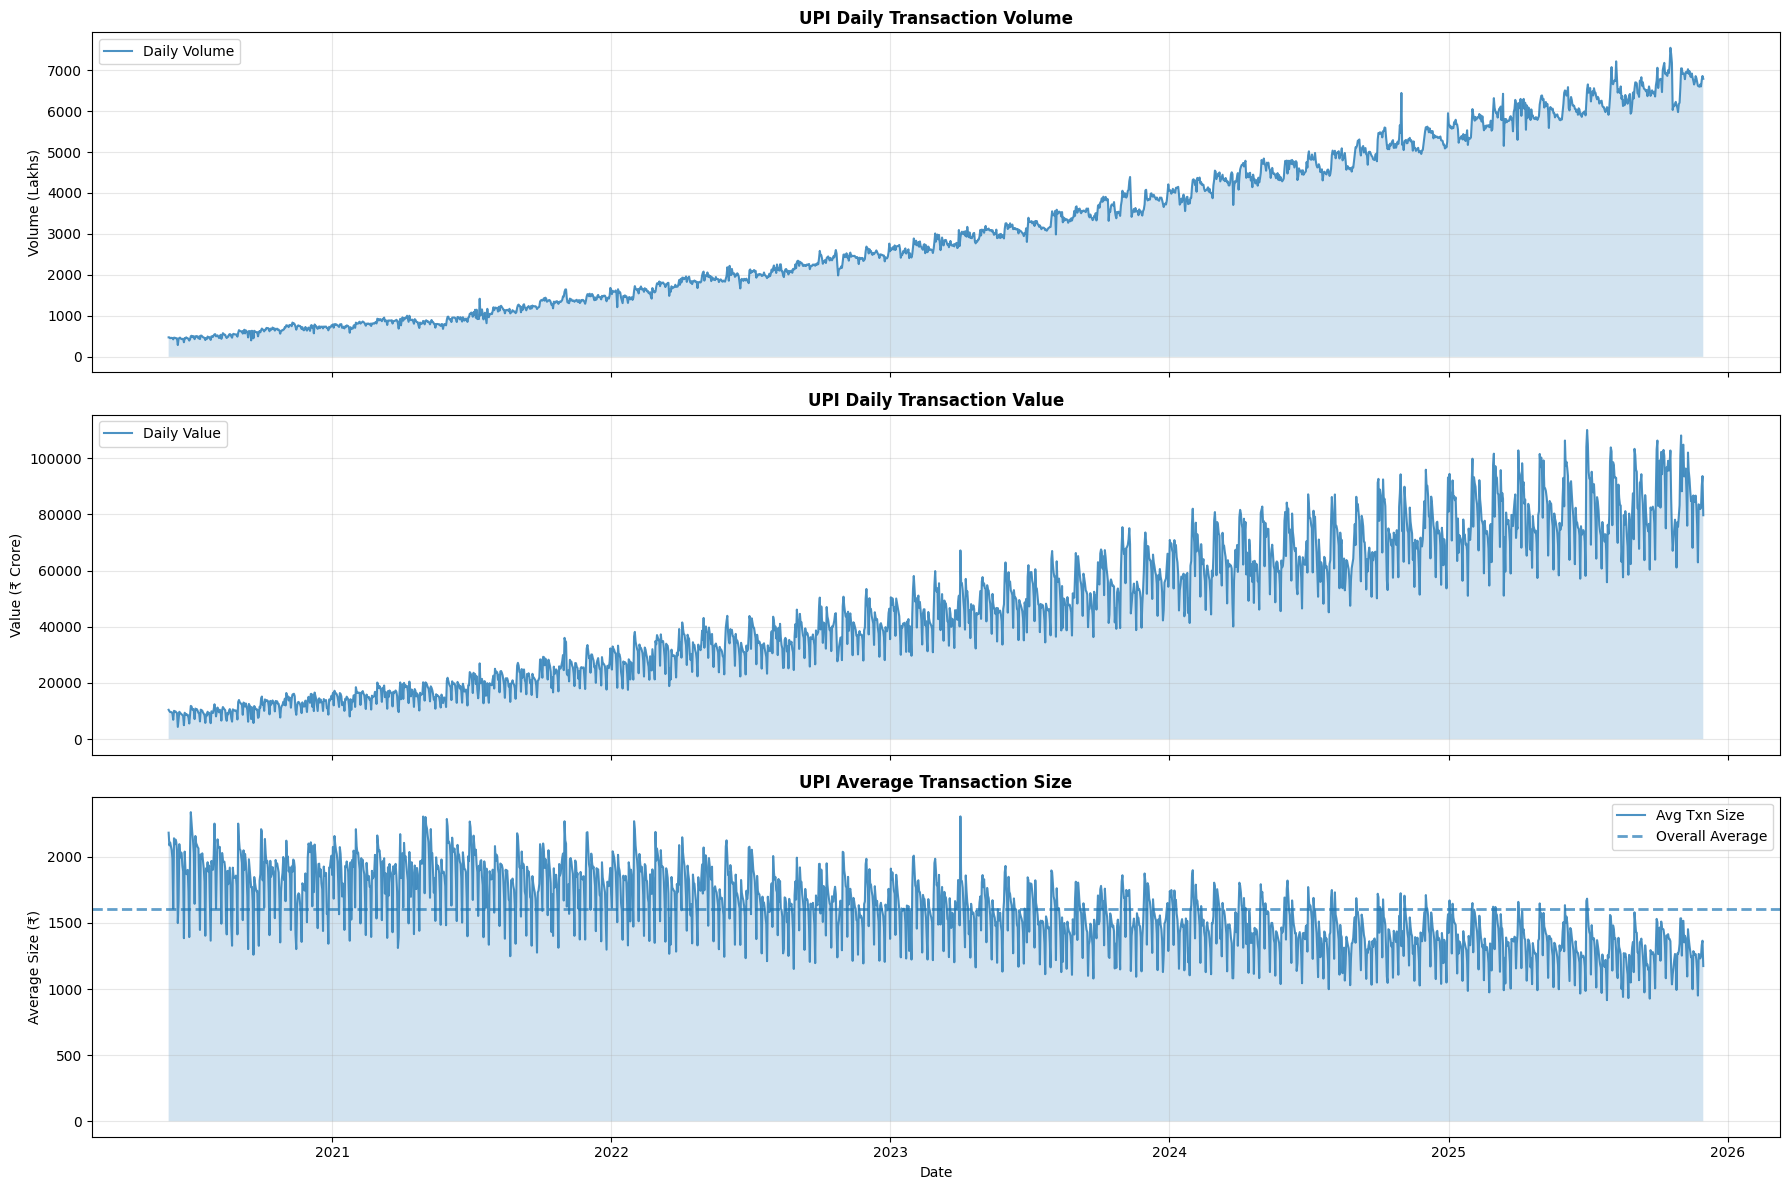

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(18, 12), sharex=True)

# Pre-filter anomalies (2σ volume-based)
anom = psddp[psddp['is_anomaly_2sigma']] if 'is_anomaly_2sigma' in psddp else None


# --- 1. UPI Volume ---
axes[0].plot(psddp['date'], psddp['upi_vol'], linewidth=1.5, alpha=0.8, label='Daily Volume')
axes[0].fill_between(psddp['date'], psddp['upi_vol'], alpha=0.2)

if anom is not None and len(anom) > 0:
    axes[0].scatter(anom['date'], anom['upi_vol'],
                    marker='^', s=70, alpha=0.7, label='Anomalies (>2σ)')

axes[0].set_title('UPI Daily Transaction Volume', fontweight='bold')
axes[0].set_ylabel('Volume (Lakhs)')
axes[0].legend()
axes[0].grid(alpha=0.3)


# --- 2. UPI Value ---
axes[1].plot(psddp['date'], psddp['upi_val'], linewidth=1.5, alpha=0.8, label='Daily Value')
axes[1].fill_between(psddp['date'], psddp['upi_val'], alpha=0.2)

if anom is not None and len(anom) > 0:
    axes[1].scatter(anom['date'], anom['upi_val'],
                    marker='^', s=70, alpha=0.7)

axes[1].set_title('UPI Daily Transaction Value', fontweight='bold')
axes[1].set_ylabel('Value (₹ Crore)')
axes[1].legend()
axes[1].grid(alpha=0.3)


# --- 3. Average Transaction Size ---
axes[2].plot(psddp['date'], psddp['avg_txn_value_rs'],
             linewidth=1.5, alpha=0.8, label='Avg Txn Size')
axes[2].fill_between(psddp['date'], psddp['avg_txn_value_rs'], alpha=0.2)

axes[2].axhline(psddp['avg_txn_value_rs'].mean(),
                linestyle='--', linewidth=2, alpha=0.7, label='Overall Average')

axes[2].set_title('UPI Average Transaction Size', fontweight='bold')
axes[2].set_ylabel('Average Size (₹)')
axes[2].set_xlabel('Date')
axes[2].legend()
axes[2].grid(alpha=0.3)


plt.tight_layout()
plt.show()


**Key Insight from Chart:**
  - Volume (Chart 1) shows consistent upward trend with seasonal fluctuations
  - Value trend (Chart 2) shows similar pattern but growing slower than volume
  - Average txn size (Chart 3) declining from ₹1,800+ (2020) to ₹1,300+ (2025)
  
  Reflects shift toward smaller P2P and daily transactions

# 1.4 Classifying Anomailies - Is This Real or Noise?

### The Challenge

Just because something is statistically unusual doesn't mean it's important. For example:
- A sudden spike on a specific day might be real (system issue) OR just random variation
- A data reporting delay might look like a drop
- A one-day anomaly probably doesn't matter; a 5-day pattern probably does

### How We Classify

For each anomaly, we look at:

1. **Duration**: Is it a single-day blip or a sustained pattern?
   - 1 day: Probably noise
   - 3+ days: Probably something real

2. **Magnitude**: How far from normal?
   - 2-3σ: Mild anomaly
   - 3σ: Strong anomaly

3. **Context**: What day is it?
   - Weekday: More likely to indicate a real event
   - Holiday: Might be expected (even if baseline didn't account for it)

4. **Other Systems**: Is UPI the only one affected?
   - Just UPI: Payment system issue or market shift
   - All systems: Infrastructure or reporting issue

### Risk Categories

- **HIGH RISK**: Multi-day, large magnitude, multiple systems affected
- **MEDIUM RISK**: Strong single anomaly or moderate multi-day pattern
- **LOW RISK**: Weak or isolated anomalies
- **DATA QUALITY**: Likely a reporting delay or data artifact, not a real event


### The Anomaly Detection Challenge

Now that we know "normal," we need to identify deviations that are:
1. **Real** (not random noise or measurement error)
2. **Significant** (large enough to matter)
3. **Reliable** (confirmed by multiple methods)

### Detection Method 1: Z-Score Analysis

**Concept**: How many standard deviations away from the rolling average is today's volume?

**Formula**:
```
Z = (Today's Volume - 30-Day Average) / 30-Day Standard Deviation

Z > 2.5  → Flagged as anomaly (less than 1.2% of observations)
Z < -2.5 → Flagged as anomaly
-2.5 to +2.5 → Normal, no action
```

**Why 2.5σ?**
- 2.0σ would flag ~5% of normal data (too many false positives)
- 3.0σ would miss real anomalies (too high bar)
- 2.5σ is a practical balance (only 1.2% flagged in normal distribution)

**Advantages**:
- Accounts for natural volatility (rolling 30-day window adapts to market changes)
- Statistically rigorous (based on standard normal distribution)
- Sensitive enough to catch real issues quickly

### Detection Method 2: IQR Method (Distribution-Free)

**Concept**: Uses quartiles to find values that are statistical outliers, without assuming normal distribution.

**Formula**:
```
Q1 = 25th percentile (lower quartile)
Q3 = 75th percentile (upper quartile)
IQR = Q3 - Q1

Lower Bound = Q1 - 1.5 × IQR
Upper Bound = Q3 + 1.5 × IQR

Anomaly if: Value < Lower Bound OR Value > Upper Bound
```

**Why IQR Matters**:
- Doesn't assume data is normally distributed
- Robust to extreme outliers (they don't affect quartiles much)
- Validates Z-score findings with independent method

### Why Use Both Methods?

**Combined approach provides confidence**:
- If both Z-score AND IQR flag an anomaly: Very high confidence (likely real)
- If only one flags: Investigate context (might be data artifact)
- If neither flags: Almost certainly not an anomaly (within normal variation)

## STL Decomposition for Robust Anomaly Detection

### Why STL Over Simple Z-Scores?

Simple seasonal Z-scores assume:
- Linear growth trend
- Fixed seasonal pattern each month
- Constant volatility

**Real UPI behavior is more complex**:
- Growth rates are **changing** (was 100% in 2021, now 30% in 2025)
- Seasonality **evolves** (Diwali effect may shift as market matures)
- Volatility **increases** with volume (busier days = more variation)

**STL Decomposition solves this** by:
1. **Trend Component**: Extracts non-linear, evolving growth path (not just a line)
2. **Seasonal Component**: Updates seasonality each cycle, captures changing patterns
3. **Residual Component**: What's left after removing trend + seasonality = true anomalies

STL DECOMPOSITION ANALYSIS

Volume anomalies detected (residual Z > 2.5σ): 42 days (2.09%)
Value anomalies detected (residual Z > 2.5σ): 51 days (2.54%)
Either volume or value anomalous: 77 days (3.83%)

Top 10 Anomalies (by residual Z-score magnitude):
Date         Vol (L)    Z-Vol    Val (Cr)   Z-Val    Type           
2024-10-31      6,441    +7.62    85,323    +1.70  Volume         
2025-10-18      7,544    +4.97   102,754    +2.86  Volume+Value   
2025-08-08      7,213    +4.95    93,003    +1.37  Volume         
2025-03-14      5,150    -4.14    51,067    -4.59  Volume+Value   
2025-10-19      7,390    +4.55    85,667    +2.53  Volume+Value   
2024-03-25      3,707    -3.44    40,086    -4.21  Volume+Value   
2025-10-28      5,975    -4.09    75,625    -2.04  Volume         
2025-07-01      6,535    +2.13   110,062    +4.07  Value          
2025-03-01      6,314    +3.28   101,628    +3.98  Volume+Value   
2025-08-02      7,072    +3.96   102,420    +3.26  Volume+Value   


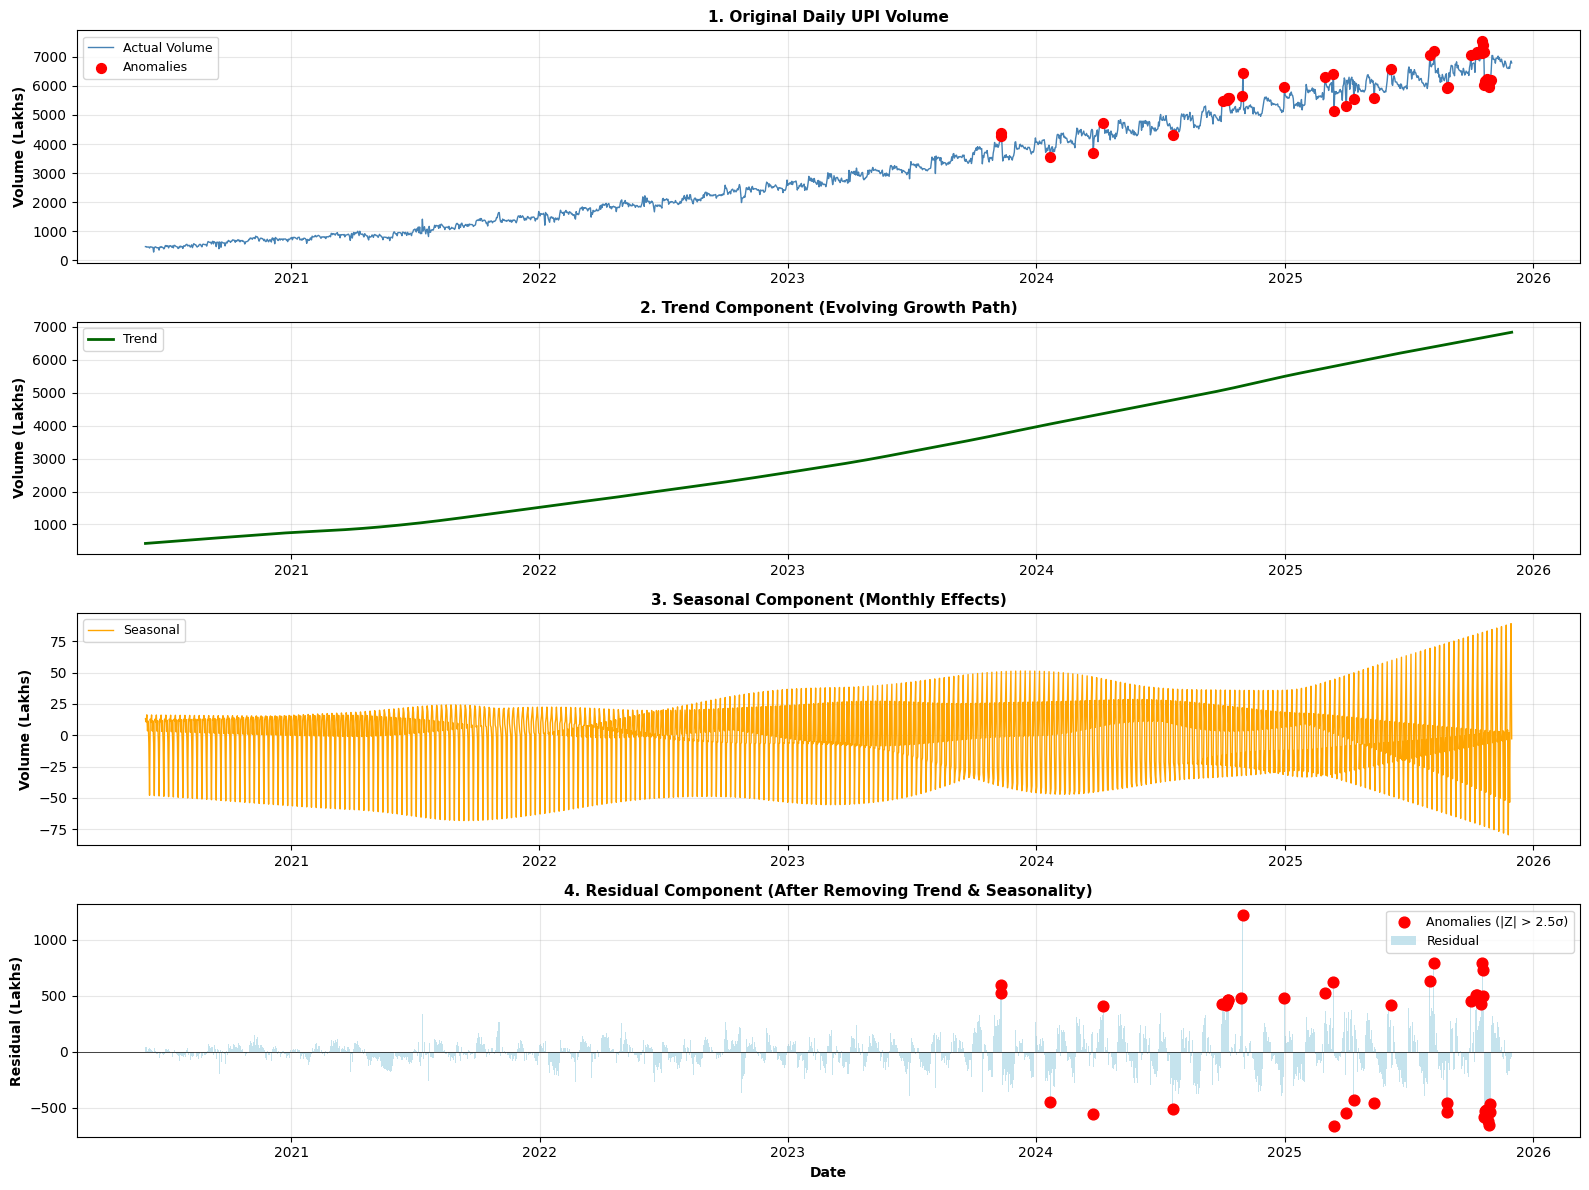

In [19]:
# STL Decomposition for Volume and Value Anomalies

print("STL DECOMPOSITION ANALYSIS")

# Prepare data for STL
daily_upi = psddp[['date', 'upi_vol', 'upi_val']].set_index('date')

# Apply STL decomposition to volume (91-day seasonal period, 365-day trend window)
stl_vol = STL(daily_upi['upi_vol'], seasonal=91, trend=365)
result_vol = stl_vol.fit()

# Apply STL decomposition to value
stl_val = STL(daily_upi['upi_val'], seasonal=91, trend=365)
result_val = stl_val.fit()

# Extract components
psddp['upi_vol_trend'] = result_vol.trend.values
psddp['upi_vol_seasonal'] = result_vol.seasonal.values
psddp['upi_vol_residual'] = result_vol.resid.values

psddp['upi_val_trend'] = result_val.trend.values
psddp['upi_val_seasonal'] = result_val.seasonal.values
psddp['upi_val_residual'] = result_val.resid.values

# Calculate Z-scores of residuals (anomalies)
vol_residual_std = psddp['upi_vol_residual'].std()
val_residual_std = psddp['upi_val_residual'].std()

psddp['vol_residual_zscore'] = psddp['upi_vol_residual'] / vol_residual_std
psddp['val_residual_zscore'] = psddp['upi_val_residual'] / val_residual_std

# Flag anomalies (|Z| > 2.5)
psddp['vol_anomaly'] = abs(psddp['vol_residual_zscore']) > 2.5
psddp['val_anomaly'] = abs(psddp['val_residual_zscore']) > 2.5
psddp['any_anomaly'] = psddp['vol_anomaly'] | psddp['val_anomaly']

# Summary
vol_anomaly_count = psddp['vol_anomaly'].sum()
val_anomaly_count = psddp['val_anomaly'].sum()
total_anomaly_count = psddp['any_anomaly'].sum()

print(f"\nVolume anomalies detected (residual Z > 2.5σ): {vol_anomaly_count} days ({vol_anomaly_count/len(psddp)*100:.2f}%)")
print(f"Value anomalies detected (residual Z > 2.5σ): {val_anomaly_count} days ({val_anomaly_count/len(psddp)*100:.2f}%)")
print(f"Either volume or value anomalous: {total_anomaly_count} days ({total_anomaly_count/len(psddp)*100:.2f}%)")

# Show top anomalies
if total_anomaly_count > 0:
    anomalies_df = psddp[psddp['any_anomaly']].copy()
    anomalies_df['max_z_score'] = anomalies_df[['vol_residual_zscore', 'val_residual_zscore']].abs().max(axis=1)
    anomalies_df = anomalies_df.sort_values('max_z_score', ascending=False)
    
    print(f"\nTop 10 Anomalies (by residual Z-score magnitude):")

    print(f"{'Date':<12} {'Vol (L)':<10} {'Z-Vol':<8} {'Val (Cr)':<10} {'Z-Val':<8} {'Type':<15}")
    
    for idx, row in anomalies_df.head(10).iterrows():
        anomaly_type = []
        if row['vol_anomaly']:
            anomaly_type.append('Volume')
        if row['val_anomaly']:
            anomaly_type.append('Value')
        anomaly_label = '+'.join(anomaly_type)
        
        print(f"{row['date'].strftime('%Y-%m-%d'):<12} {row['upi_vol']:>8,.0f}  "
              f"{row['vol_residual_zscore']:>+7.2f}  {row['upi_val']:>8,.0f}  "
              f"{row['val_residual_zscore']:>+7.2f}  {anomaly_label:<15}")

# Visualization: STL Decomposition
fig, axes = plt.subplots(4, 1, figsize=(16, 12))

# Original series
axes[0].plot(psddp['date'], psddp['upi_vol'], color='steelblue', linewidth=1, label='Actual Volume')
axes[0].scatter(psddp[psddp['vol_anomaly']]['date'], psddp[psddp['vol_anomaly']]['upi_vol'], 
               color='red', s=50, zorder=5, label='Anomalies')
axes[0].set_ylabel("Volume (Lakhs)", fontweight='bold')
axes[0].set_title("1. Original Daily UPI Volume", fontweight='bold', fontsize=11)
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# Trend
axes[1].plot(psddp['date'], psddp['upi_vol_trend'], color='darkgreen', linewidth=2, label='Trend')
axes[1].set_ylabel("Volume (Lakhs)", fontweight='bold')
axes[1].set_title("2. Trend Component (Evolving Growth Path)", fontweight='bold', fontsize=11)
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

# Seasonal
axes[2].plot(psddp['date'], psddp['upi_vol_seasonal'], color='orange', linewidth=1, label='Seasonal')
axes[2].set_ylabel("Volume (Lakhs)", fontweight='bold')
axes[2].set_title("3. Seasonal Component (Monthly Effects)", fontweight='bold', fontsize=11)
axes[2].legend(fontsize=9)
axes[2].grid(True, alpha=0.3)

# Residual with anomalies
axes[3].bar(psddp['date'], psddp['upi_vol_residual'], width=1, color='lightblue', label='Residual', alpha=0.7)
axes[3].scatter(psddp[psddp['vol_anomaly']]['date'], psddp[psddp['vol_anomaly']]['upi_vol_residual'], 
               color='red', s=60, zorder=5, label='Anomalies (|Z| > 2.5σ)')
axes[3].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[3].set_ylabel("Residual (Lakhs)", fontweight='bold')
axes[3].set_xlabel("Date", fontweight='bold')
axes[3].set_title("4. Residual Component (After Removing Trend & Seasonality)", fontweight='bold', fontsize=11)
axes[3].legend(fontsize=9)
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Average Transaction Size as a Secondary Indicator
verage Transaction Size as Explanatory Indicator

### Why Track This?

Average Transaction Size = Total Value ÷ Total Volume

Reveals **what type of transactions** drive volume changes:

| Volume Change | Size Change | Interpretation |
|---|---|---|
| ↑↑ | → | More users, same behavior (penetration) |
| ↑↑ | ↓ | Shift to micro-payments (retail) |
| ↑ | ↑↑ | Consolidation, larger txns (B2B) |
| ↓ | → | Fewer users, same behavior |
| → | ↑↑ | Rate changes, new use cases |

### Using For Interpretation (Not Flagging)

Transaction size anomalies are **secondary indicators only**:
- Primary detection: Volume/value anomalies via STL residuals
- Check: Did size change at the same time?
  - **Size normal**: Structural change (more/fewer users)
  - **Size changed too**: Behavioral change (user composition)


AVERAGE TRANSACTION SIZE ANALYSIS

Average transaction size anomalies: 3 days (0.15%)
  Size range: ₹916 to ₹2338
  Mean size: ₹1606
  Current trend: Decreasing (-328 ₹ over last 6 months)

Anomaly combinations (for interpretation):
  Volume anomaly but size normal: 42 days → Structural change (user count)
  Size anomaly but volume normal: 3 days → Behavioral change (user type)
  Both volume & size anomalous: 0 days → Major event or policy change

Top 10 Average Transaction Size Anomalies:
Date         Avg Size     Z-Score    Vol Anom?    Interpretation                     
2023-04-03   ₹     2,307      +3.21  NO           Larger txns, fewer users           
2020-10-25   ₹     1,353      -2.55  NO           Smaller txns, more users           
2021-12-26   ₹     1,298      -2.50  NO           Smaller txns, more users           


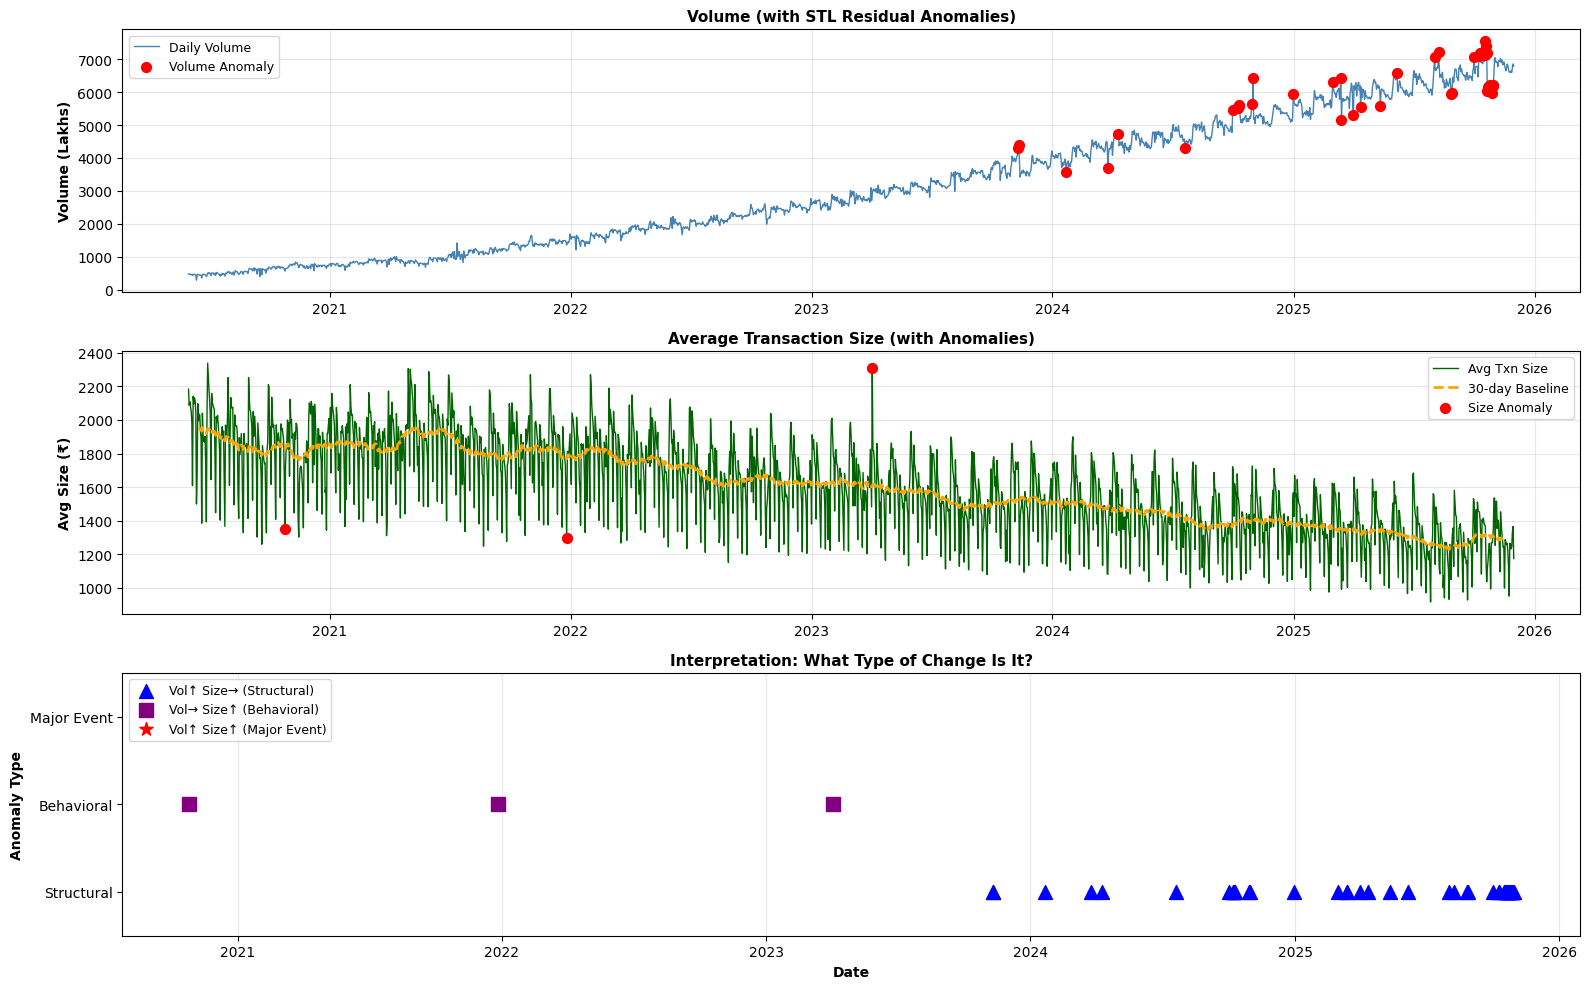

In [20]:
# Average Transaction Size as Secondary Indicator
print("AVERAGE TRANSACTION SIZE ANALYSIS")

# Calculate average transaction size (₹ per transaction)
# upi_val in crores, upi_vol in lakhs
# ₹ = (Value_Crore × 1e7) / (Volume_Lakh × 1e5) = (Value/Volume) × 100
psddp['avg_txn_size_rs'] = (psddp['upi_val'] / psddp['upi_vol']) * 100

# Calculate rolling baseline and detect size anomalies
psddp['avg_size_rolling_mean'] = psddp['avg_txn_size_rs'].rolling(window=30, center=True).mean()
psddp['avg_size_rolling_std'] = psddp['avg_txn_size_rs'].rolling(window=30, center=True).std()
psddp['size_zscore'] = (psddp['avg_txn_size_rs'] - psddp['avg_size_rolling_mean']) / psddp['avg_size_rolling_std']
psddp['size_anomaly'] = abs(psddp['size_zscore']) > 2.5

size_anomaly_count = psddp['size_anomaly'].sum()

print(f"\nAverage transaction size anomalies: {size_anomaly_count} days ({size_anomaly_count/len(psddp)*100:.2f}%)")
print(f"  Size range: ₹{psddp['avg_txn_size_rs'].min():.0f} to ₹{psddp['avg_txn_size_rs'].max():.0f}")
print(f"  Mean size: ₹{psddp['avg_txn_size_rs'].mean():.0f}")
print(f"  Current trend: ", end="")

# Check if size is increasing or decreasing recently
recent_avg_size = psddp[psddp['date'] >= psddp['date'].max() - pd.Timedelta(days=180)]['avg_txn_size_rs']
if len(recent_avg_size) > 1:
    recent_trend = recent_avg_size.iloc[-1] - recent_avg_size.iloc[0]
    direction = "Increasing" if recent_trend > 0 else "Decreasing"
    print(f"{direction} ({recent_trend:+.0f} ₹ over last 6 months)")
else:
    print("Insufficient data")

# Combine volume and size anomalies for interpretation
psddp['vol_but_not_size'] = psddp['vol_anomaly'] & ~psddp['size_anomaly']
psddp['size_but_not_vol'] = psddp['size_anomaly'] & ~psddp['vol_anomaly']
psddp['both_vol_and_size'] = psddp['vol_anomaly'] & psddp['size_anomaly']

combined_vol_only = psddp['vol_but_not_size'].sum()
combined_size_only = psddp['size_but_not_vol'].sum()
combined_both = psddp['both_vol_and_size'].sum()

print(f"\nAnomaly combinations (for interpretation):")
print(f"  Volume anomaly but size normal: {combined_vol_only} days → Structural change (user count)")
print(f"  Size anomaly but volume normal: {combined_size_only} days → Behavioral change (user type)")
print(f"  Both volume & size anomalous: {combined_both} days → Major event or policy change")

# Show size anomalies
if size_anomaly_count > 0:
    size_anomalies = psddp[psddp['size_anomaly']].copy()
    size_anomalies = size_anomalies.sort_values('size_zscore', key=abs, ascending=False)
    
    print(f"\nTop 10 Average Transaction Size Anomalies:")
    print(f"{'Date':<12} {'Avg Size':<12} {'Z-Score':<10} {'Vol Anom?':<12} {'Interpretation':<35}")
    
    for idx, row in size_anomalies.head(10).iterrows():
        vol_status = "YES" if row['vol_anomaly'] else "NO"
        interpretation = ""
        if row['vol_anomaly']:
            if row['size_zscore'] > 0:
                interpretation = "Users + larger txns"
            else:
                interpretation = "Users + smaller txns"
        else:
            if row['size_zscore'] > 0:
                interpretation = "Larger txns, fewer users"
            else:
                interpretation = "Smaller txns, more users"
        
        print(f"{row['date'].strftime('%Y-%m-%d'):<12} ₹{row['avg_txn_size_rs']:>10,.0f}  "
              f"{row['size_zscore']:>+9.2f}  {vol_status:<12} {interpretation:<35}")

# Visualization: Volume, Size, and Correlation
fig, axes = plt.subplots(3, 1, figsize=(16, 10))

# Volume with anomalies
axes[0].plot(psddp['date'], psddp['upi_vol'], color='steelblue', linewidth=1, label='Daily Volume')
axes[0].scatter(psddp[psddp['vol_anomaly']]['date'], psddp[psddp['vol_anomaly']]['upi_vol'], 
               color='red', s=50, zorder=5, label='Volume Anomaly')
axes[0].set_ylabel("Volume (Lakhs)", fontweight='bold')
axes[0].set_title("Volume (with STL Residual Anomalies)", fontweight='bold', fontsize=11)
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# Average transaction size
axes[1].plot(psddp['date'], psddp['avg_txn_size_rs'], color='darkgreen', linewidth=1, label='Avg Txn Size')
axes[1].plot(psddp['date'], psddp['avg_size_rolling_mean'], color='orange', linewidth=2, linestyle='--', label='30-day Baseline')
axes[1].scatter(psddp[psddp['size_anomaly']]['date'], psddp[psddp['size_anomaly']]['avg_txn_size_rs'], 
               color='red', s=50, zorder=5, label='Size Anomaly')
axes[1].set_ylabel("Avg Size (₹)", fontweight='bold')
axes[1].set_title("Average Transaction Size (with Anomalies)", fontweight='bold', fontsize=11)
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

# Interpretation zones
axes[2].scatter(psddp[psddp['vol_but_not_size']]['date'], [0]*psddp['vol_but_not_size'].sum(), 
               color='blue', s=100, marker='^', label='Vol↑ Size→ (Structural)', zorder=5)
axes[2].scatter(psddp[psddp['size_but_not_vol']]['date'], [1]*psddp['size_but_not_vol'].sum(), 
               color='purple', s=100, marker='s', label='Vol→ Size↑ (Behavioral)', zorder=5)
axes[2].scatter(psddp[psddp['both_vol_and_size']]['date'], [2]*psddp['both_vol_and_size'].sum(), 
               color='red', s=100, marker='*', label='Vol↑ Size↑ (Major Event)', zorder=5)
axes[2].set_ylim(-0.5, 2.5)
axes[2].set_yticks([0, 1, 2])
axes[2].set_yticklabels(['Structural', 'Behavioral', 'Major Event'], fontsize=10)
axes[2].set_ylabel("Anomaly Type", fontweight='bold')
axes[2].set_xlabel("Date", fontweight='bold')
axes[2].set_title("Interpretation: What Type of Change Is It?", fontweight='bold', fontsize=11)
axes[2].legend(fontsize=9, loc='upper left')
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## Statistical Anomaly Detection (Z-Score and IQR Methods)

To identify statistically significant deviations in daily UPI transaction volume, two complementary anomaly detection methods are applied: a **rolling Z-score method** and an **Interquartile Range (IQR) method**. Using both approaches improves robustness and reduces false positives.

### Z-Score Method (Rolling Window)

The Z-score method measures how far the current day’s volume deviates from recent behavior, expressed in units of standard deviation. A 30-day rolling window is used to compute a local baseline mean and volatility, allowing the method to adapt to changing transaction levels.

Anomalies are flagged when the absolute Z-score exceeds **2.5**, corresponding to extreme deviations unlikely to occur under normal variation.

### IQR Method (Distribution-Free)

The IQR method detects anomalies based on the empirical distribution of the data without assuming normality. Values lying below  
`Q1 − 1.5 × IQR` or above `Q3 + 1.5 × IQR` are classified as anomalous.

This method is robust to skewness and extreme values and serves as an independent validation of Z-score–based anomalies.

### Combined Interpretation

Days flagged by **both methods** are considered high-confidence anomalies, while days flagged by only one method warrant contextual investigation. The combined approach ensures that detected anomalies represent genuine deviations rather than noise or distributional artifacts.

Visualizations are used to compare anomalies detected by each method, and summary statistics quantify the frequency and magnitude of detected deviations.


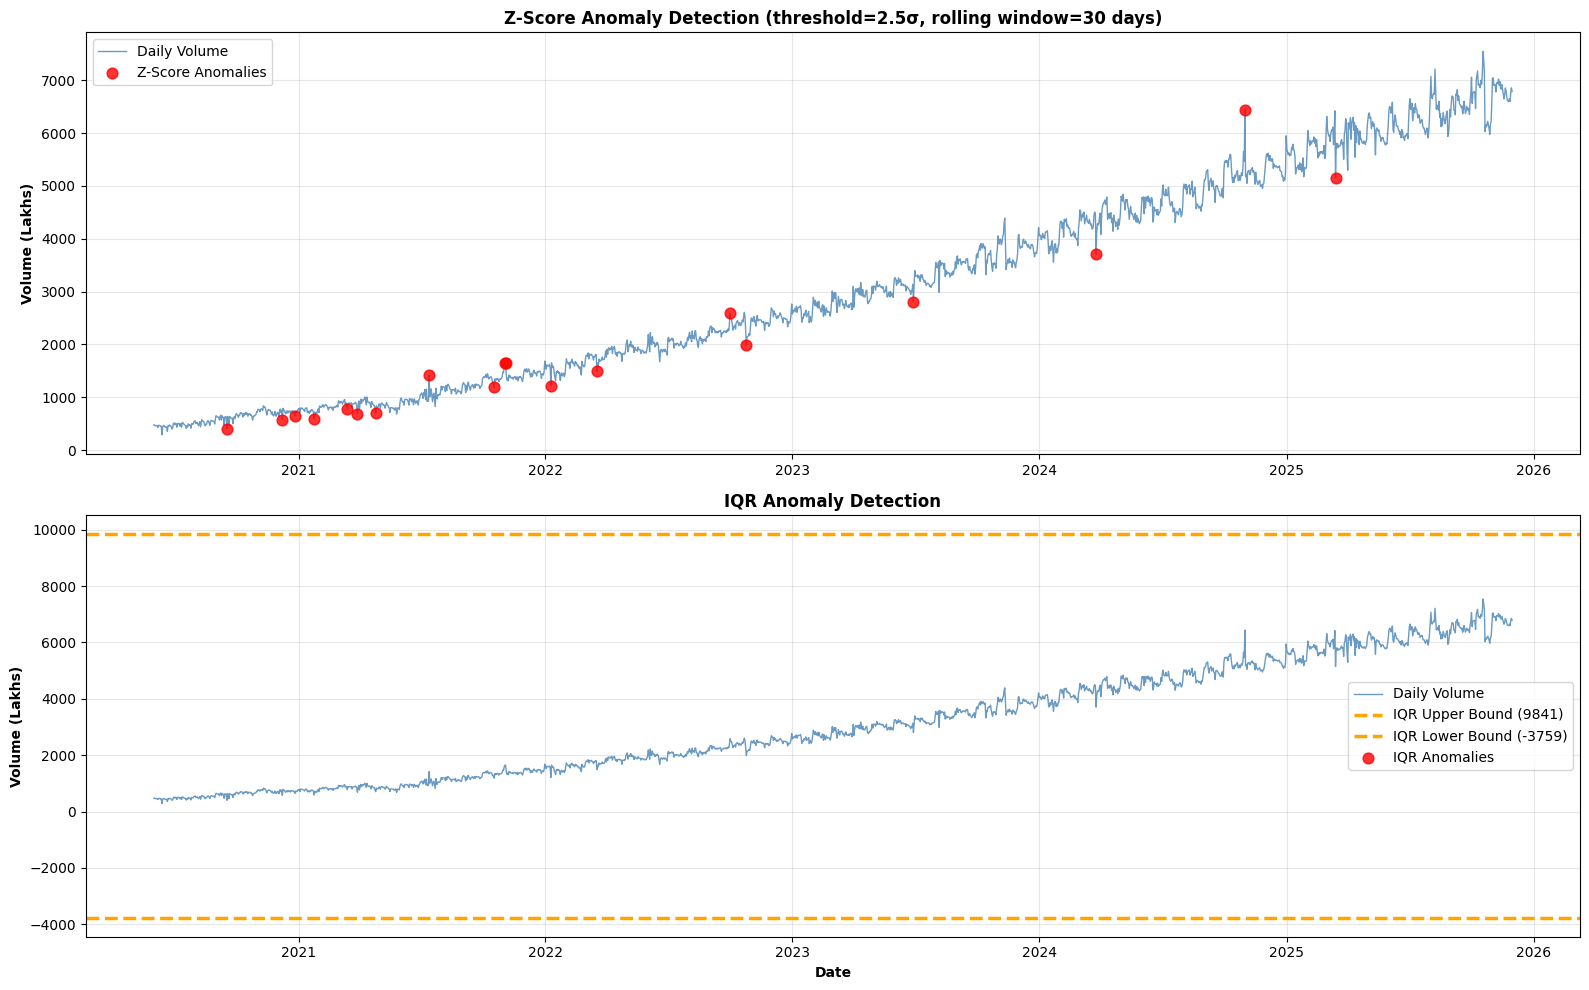

ANOMALY DETECTION SUMMARY
Z-Score Anomalies Detected: 19 (0.95%)
IQR Anomalies Detected: 0 (0.00%)
Combined Anomalies: 19 (0.95%)

TOP 10 MOST SIGNIFICANT ANOMALIES (by Z-Score):
Date                  Volume    Z-Score       Deviation
2024-10-31            6,441       4.70σ          108.0%
2021-07-13            1,419       3.52σ          -54.2%
2022-03-18            1,489       3.28σ          -51.9%
2020-09-17              403       3.13σ          -87.0%
2024-03-25            3,707       3.12σ           19.7%
2025-03-14            5,150       3.07σ           66.3%
2021-10-17            1,185       2.96σ          -61.7%
2021-03-29              690       2.95σ          -77.7%
2020-12-08              575       2.87σ          -81.4%
2021-01-24              590       2.83σ          -81.0%


In [21]:
# Anomaly Detection Functions

def detect_anomalies_zscore(series, threshold=2.5, window=30):
    """
    Z-Score Method: Detect anomalies using rolling standard deviation
    
    How it works:
      1. Calculate 30-day rolling average (baseline expectation)
      2. Calculate 30-day rolling std dev (normal variation)
      3. Compute Z = (today - avg) / std_dev
      4. Flag if |Z| > threshold (default: 2.5σ = top 1.2% of observations)
    
    Args:
      series: Daily volume time series
      threshold: Std deviations from mean to flag as anomaly (default: 2.5σ)
      window: Rolling window size in days (default: 30)
    
    Returns:
      z_scores: Absolute Z-score for each day
      anomalies: Boolean mask (True = anomalous day)
    """
    # Calculate rolling baseline (30-day window, centered)
    baseline = series.rolling(window=window, center=True).mean()
    volatility = series.rolling(window=window, center=True).std()
    
    # Calculate how many standard deviations from baseline
    z_scores = np.abs((series - baseline) / volatility)
    
    # Flag anomalies beyond threshold
    anomalies = z_scores > threshold
    
    return z_scores, anomalies


def detect_anomalies_iqr(series):
    """
    IQR Method: Detect anomalies using quartile-based bounds
    
    How it works:
      1. Find Q1 (25th percentile) and Q3 (75th percentile)
      2. Calculate IQR = Q3 - Q1
      3. Set bounds: Lower = Q1 - 1.5×IQR, Upper = Q3 + 1.5×IQR
      4. Flag values outside these bounds as anomalies
    
    Advantages:
      - Distribution-free (no normality assumption)
      - Robust to extreme outliers
      - Good for real-world skewed data
    
    Returns:
      lower_bound: Lower anomaly threshold
      upper_bound: Upper anomaly threshold
      anomalies: Boolean mask (True = anomalous day)
    """
    # Find quartiles
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate anomaly bounds (1.5 × IQR is standard statistical threshold)
    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr
    
    # Flag values outside normal range
    anomalies = (series < lower_threshold) | (series > upper_threshold)
    
    return lower_threshold, upper_threshold, anomalies

# Apply anomaly detection to daily UPI volume
daily_series = psddp.set_index("date")["upi_vol"]

z_scores, z_anomalies = detect_anomalies_zscore(daily_series, threshold=2.5, window=30)
lower_bound, upper_bound, iqr_anomalies = detect_anomalies_iqr(daily_series)
combined_anomalies = z_anomalies | iqr_anomalies

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: Z-Score Method
axes[0].plot(daily_series.index, daily_series.values, label='Daily Volume', color='steelblue', linewidth=1, alpha=0.8)
axes[0].scatter(daily_series[z_anomalies].index, daily_series[z_anomalies].values, 
               color='red', s=60, label='Z-Score Anomalies', zorder=5, alpha=0.8)
axes[0].set_ylabel("Volume (Lakhs)", fontweight='bold')
axes[0].set_title("Z-Score Anomaly Detection (threshold=2.5σ, rolling window=30 days)", fontweight='bold', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot 2: IQR Method
axes[1].plot(daily_series.index, daily_series.values, label='Daily Volume', color='steelblue', linewidth=1, alpha=0.8)
axes[1].axhline(upper_bound, color='orange', linestyle='--', linewidth=2.5, label=f'IQR Upper Bound ({upper_bound:.0f})')
axes[1].axhline(lower_bound, color='orange', linestyle='--', linewidth=2.5, label=f'IQR Lower Bound ({lower_bound:.0f})')
axes[1].scatter(daily_series[iqr_anomalies].index, daily_series[iqr_anomalies].values, 
               color='red', s=60, label='IQR Anomalies', zorder=5, alpha=0.8)
axes[1].set_ylabel("Volume (Lakhs)", fontweight='bold')
axes[1].set_xlabel("Date", fontweight='bold')
axes[1].set_title("IQR Anomaly Detection", fontweight='bold', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print anomaly summary
print("ANOMALY DETECTION SUMMARY")
print(f"Z-Score Anomalies Detected: {z_anomalies.sum()} ({z_anomalies.sum()/len(z_anomalies)*100:.2f}%)")
print(f"IQR Anomalies Detected: {iqr_anomalies.sum()} ({iqr_anomalies.sum()/len(iqr_anomalies)*100:.2f}%)")
print(f"Combined Anomalies: {combined_anomalies.sum()} ({combined_anomalies.sum()/len(combined_anomalies)*100:.2f}%)")

# Show top anomalies
print("\nTOP 10 MOST SIGNIFICANT ANOMALIES (by Z-Score):")
anomaly_details = pd.DataFrame({
    "date": daily_series.index,
    "volume": daily_series.values,
    "z_score": z_scores.values
}).dropna().sort_values("z_score", ascending=False).head(10)

print(f"{'Date':<15} {'Volume':>12} {'Z-Score':>10} {'Deviation':>15}")
for idx, row in anomaly_details.iterrows():
    pct_dev = (row['volume'] - daily_series.mean()) / daily_series.mean() * 100
    print(f"{row['date'].strftime('%Y-%m-%d'):<15} {row['volume']:>11,.0f} {row['z_score']:>10.2f}σ {pct_dev:>14.1f}%")



## Multi-System Anomaly Correlation Analysis

This stage examines whether transaction anomalies occur **in isolation or simultaneously across multiple payment systems**, helping distinguish **system-specific issues** from **economy-wide or infrastructure-level events**.

Daily volumes for major payment rails (UPI, IMPS, NEFT, AEPS, BBPS) are independently analyzed using a **rolling Z-score method (30-day window, 2.5σ threshold)** to flag abnormal activity. Anomaly counts and percentages are summarized for each system, followed by time-series visualizations with anomaly markers.

Finally, anomaly dates are cross-checked across systems to identify **correlated anomalies**, where two or more payment systems show abnormal behavior on the same day. Such overlaps often indicate **policy changes, nationwide disruptions, festivals, or macroeconomic shocks**, whereas isolated anomali


MULTI-SYSTEM ANOMALY CORRELATION ANALYSIS

 Anomaly Detection by Payment System:
System          Anomalies   Percentage
UPI                    19        0.95%
IMPS                   17        0.85%
NEFT                   18        0.90%
AEPS                    8        0.40%
BBPS                    6        0.30%


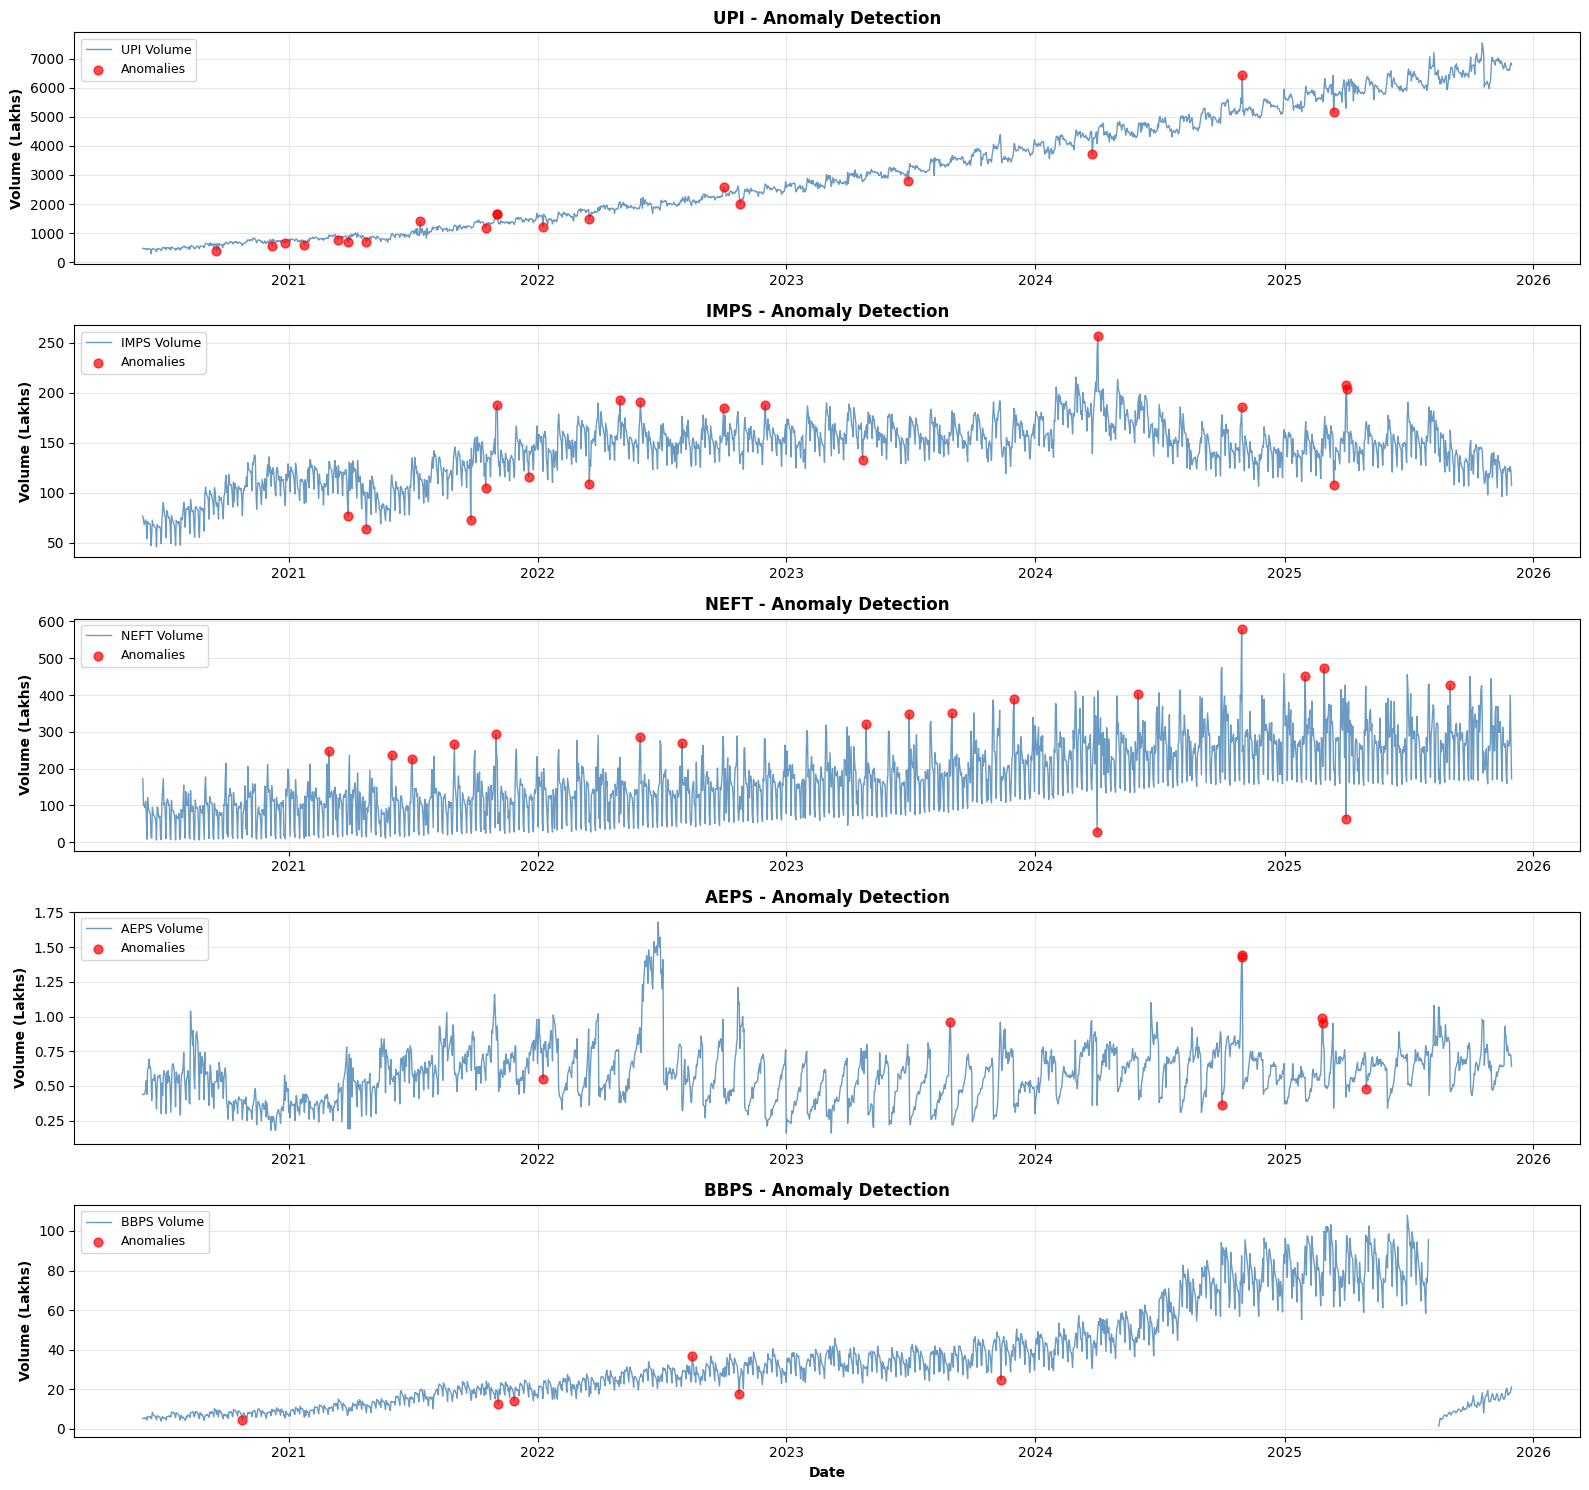



 CORRELATED ANOMALIES (Potential System-wide Events):
--------------------------------------------------------------------------------
Found 12 dates with correlated anomalies:

  • 2025-04-01 → IMPS, NEFT (2 systems)
  • 2025-03-14 → UPI, IMPS (2 systems)
  • 2024-10-31 → UPI, AEPS (2 systems)
  • 2024-10-30 → IMPS, NEFT, AEPS (3 systems)
  • 2022-10-01 → UPI, IMPS (2 systems)
  • 2022-06-01 → IMPS, NEFT (2 systems)
  • 2022-03-18 → UPI, IMPS (2 systems)
  • 2022-01-09 → UPI, AEPS (2 systems)
  • 2021-11-03 → UPI, IMPS (2 systems)
  • 2021-10-17 → UPI, IMPS (2 systems)


In [22]:
# Multi-System Anomaly Correlation
payment_systems = ['upi_vol', 'imps_vol', 'neft_vol', 'aeps_vol', 'bbps_vol']
available_systems = [ps for ps in payment_systems if ps in psddp.columns]

if len(available_systems) > 0:
    print("MULTI-SYSTEM ANOMALY CORRELATION ANALYSIS")
    
    # Calculate anomalies for each system
    system_anomalies = {}
    
    for system in available_systems:
        series = psddp.set_index("date")[system]
        z_scores, anomalies = detect_anomalies_zscore(series, threshold=2.5, window=30)
        system_anomalies[system] = {
            'series': series,
            'z_scores': z_scores,
            'anomalies': anomalies,
            'count': anomalies.sum(),
            'pct': (anomalies.sum() / len(anomalies)) * 100
        }
    
    # Summary table
    print("\n Anomaly Detection by Payment System:")
    print(f"{'System':<12} {'Anomalies':>12} {'Percentage':>12}")
    for s in available_systems:
        system_name = s.replace('_vol', '').upper()
        print(f"{system_name:<12} {system_anomalies[s]['count']:>12} {system_anomalies[s]['pct']:>11.2f}%")
    
    # Visualize multiple systems
    fig, axes = plt.subplots(len(available_systems), 1, figsize=(16, 3*len(available_systems)))
    if len(available_systems) == 1:
        axes = [axes]
    
    for idx, system in enumerate(available_systems):
        series = system_anomalies[system]['series']
        anomalies = system_anomalies[system]['anomalies']
        
        axes[idx].plot(series.index, series.values, label=f'{system.replace("_vol", "").upper()} Volume', 
                      color='steelblue', linewidth=1, alpha=0.8)
        axes[idx].scatter(series[anomalies].index, series[anomalies].values, 
                         color='red', s=40, label='Anomalies', zorder=5, alpha=0.7)
        axes[idx].set_ylabel('Volume (Lakhs)', fontweight='bold')
        axes[idx].set_title(f'{system.replace("_vol", "").upper()} - Anomaly Detection', fontweight='bold')
        axes[idx].legend(loc='upper left', fontsize=9)
        axes[idx].grid(True, alpha=0.3)
    
    axes[-1].set_xlabel('Date', fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Identify correlated anomalies
    print("\n\n CORRELATED ANOMALIES (Potential System-wide Events):")
    print("-" * 80)
    
    anomaly_dates = set()
    for system in available_systems:
        anomaly_dates.update(system_anomalies[system]['series'][system_anomalies[system]['anomalies']].index)
    
    correlated_dates = []
    for date in anomaly_dates:
        systems_with_anomaly = [s for s in available_systems 
                               if system_anomalies[s]['anomalies'].get(date, False)]
        if len(systems_with_anomaly) > 1:
            correlated_dates.append((date, systems_with_anomaly))
    
    if len(correlated_dates) > 0:
        print(f"Found {len(correlated_dates)} dates with correlated anomalies:\n")
        for date, systems in sorted(correlated_dates, reverse=True)[:10]:
            system_names = ', '.join([s.replace('_vol', '').upper() for s in systems])
            print(f"  • {date.strftime('%Y-%m-%d')} → {system_names} ({len(systems)} systems)")
    else:
        print("No correlated anomalies detected - anomalies appear system-specific")
else:
    print("Note: Multiple payment system columns not found in data")


# 2. Dataset Description
## NPCI Entity-wise Retail Payment Data - Monthly Level

- **Frequency**: Monthly
- **Coverage**: April 2024 → October 2025 (19 months)
- **Granularity**: Bank-level aggregated transaction statistics per payment system per role
- **Publisher**: Reserve Bank of India (RBI)
- **Source**: https://www.rbi.org.in/Scripts/EntityWiseRetailStatistics.aspx

**What it contains:**
- Bank-specific monthly UPI transaction volumes and values
- Role-wise breakdown: Remitter (sending bank), Beneficiary (receiving bank)
- 692+ participating banks and financial institutions

This dataset provides **monthly, bank-level aggregated transaction statistics** across multiple retail payment systems in India.  
Each row captures the activity of a specific **bank**, for a given **month**, **payment system**, and **operational role**.

All data is fully aggregated and does not contain any individual transaction-level or customer-level information.

### Column Descriptions

#### `Month`
- Calendar month for which the data is reported  
- Represents aggregated activity over the entire month  

#### `Sheet`
- Identifies the **payment system or instrument** to which the transactions belong  
- Examples include:
  - UPI
  - IMPS
  - NETC (FASTag)
  - NFS (ATM network)
  - AePS
  - CTS
  - BBPS
- Some payment systems may appear under multiple reporting formats (e.g., `UPI` and `UPI-Remitter`)

#### `Entity`
- Name of the **bank or financial institution** reporting the transactions  
- Represents the participating entity within the payment ecosystem  

#### `Role`
- Describes the **functional role** played by the bank within the payment system  
- The interpretation of this field depends on the payment system:
  - **UPI / IMPS**: `Remitter` (sending bank), `Beneficiary` (receiving bank)
  - **NETC**: `Issuer`, `Acquirer`
  - **NFS / AePS**: Issuer and Acquirer roles for payment and cash withdrawal transactions
  - **CTS**: `Presenting`, `Drawee`
  - **BBPS**: `Customer OU`, `Biller OU`

This field allows separation of sending-side and receiving-side activity where applicable.

#### `Volume_Lakh`
- Total number of transactions processed during the month  
- Reported in **lakh transactions**  
- Aggregated across all customers and channels for the given bank, system, and role  

#### `Value_Crore`
- Total monetary value of transactions during the month  
- Reported in **₹ crore**  
- Represents aggregate settlement value rather than individual transaction amounts  

### Dataset Interpretation

- Each row corresponds to **monthly activity at the bank–system–role level**
- The dataset supports:
  - Bank-level participation analysis
  - Role-wise comparison within payment systems
  - Identification of structural changes in payment system usage over time
- The data is suitable for **macro-level analysis** and **system-wide trend assessment**

### Data Source & Coverage

Entity-wise retail payment statistics are published by the **Reserve Bank of India (RBI)** at:

🔗 https://www.rbi.org.in/Scripts/EntityWiseRetailStatistics.aspx

**Source characteristics**:
- One Excel file per month
- Multiple payment systems reported within each file
- Column layouts vary across payment instruments
- Transaction volume reported in **lakhs**
- Transaction value reported in **₹ crore**

**Data coverage used in this project**:
- April 2024 – October 2025


# 2.1 Exploratory Data Analysis

In [23]:
entity_df = pd.read_csv("../data/processed/npci_entity_clean.csv")

In [24]:
entity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223250 entries, 0 to 223249
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Month        223250 non-null  object 
 1   Sheet        223250 non-null  object 
 2   Entity       223250 non-null  object 
 3   Role         223250 non-null  object 
 4   Volume_Lakh  223250 non-null  float64
 5   Value_Crore  223250 non-null  float64
dtypes: float64(2), object(4)
memory usage: 10.2+ MB


In [25]:
entity_df.shape

(223250, 6)

In [26]:
entity_df.head()

,Month,Sheet,Entity,Role,Volume_Lakh,Value_Crore
0,August 2025,UPI,Yes Bank,Remitter,1782.75231,25900.453123
1,August 2025,UPI,Yes Bank,Beneficiary,80877.76646,247763.862678
2,August 2025,UPI,State Bank of India,Remitter,50282.91989,645452.945541
3,August 2025,UPI,State Bank of India,Beneficiary,20507.78499,471722.817698
4,August 2025,UPI,Axis Bank,Remitter,8843.33913,134418.481534


In [27]:
entity_df["Sheet"] = entity_df["Sheet"].replace({
    "UPI-Remitter": "UPI"
})

entity_df[["Sheet", "Role"]].drop_duplicates().reset_index(drop=True)

,Sheet,Role
0,UPI,Remitter
1,UPI,Beneficiary
2,IMPS,Remitter
3,IMPS,Beneficiary
4,NETC,Issuer
5,NETC,Acquirer
6,NFS,Issuer Payment Transactions
7,NFS,Issuer Cash Withdrawal
8,NFS,Acquirer Payment Transactions
9,NFS,Acquirer Cash Withdrawal


In [28]:
# Filter rows where sheet is UPI or UPI-Remitter
filtered_df = entity_df[entity_df['Sheet'].isin(['UPI', 'UPI-Remitter'])]

# Get unique entities
unique_entities = filtered_df['Entity'].dropna().unique()

# Count of unique entities
unique_entity_count = len(unique_entities)

# Results
print("Unique Entity Count:", unique_entity_count)
print("Unique Entity List:")
print(unique_entities)

Unique Entity Count: 1179
Unique Entity List:
['Yes Bank' 'State Bank of India' 'Axis Bank' ...
 'The Yadagiri Lakshmi Narasimha Swamy Co-Op Urban Bank Ltd'
 'GIPL (Slice)' 'LUC']


In [29]:
entity_df.columns = entity_df.columns.str.lower().str.strip()

# Parse month
entity_df['month_dt'] = pd.to_datetime(
    entity_df['month'], format='%B %Y', errors='coerce'
)

print(f"Months: {entity_df['month'].nunique()}")
print(f"Entities: {entity_df['entity'].nunique()}")
print(f"Payment systems: {entity_df['sheet'].nunique()}")

# Date range
print(
    f"Period: {entity_df['month_dt'].min():%B %Y} "
    f"to {entity_df['month_dt'].max():%B %Y}"
)

Months: 19
Entities: 5924
Payment systems: 7
Period: April 2024 to October 2025


# 2.2 Bank/Entity Data Analysis

## UPI Remitter – Latest Month Snapshot

**Purpose:**  
Analyze bank-wise UPI Remitter activity for the most recent month.

**Steps:**
- Filter records containing **UPI** with **Role = Remitter**
- Identify the **latest available month**
- Compute system totals (Volume, Value, Active Banks)
- Calculate **bank-level market share (%)**
- Rank banks by transaction volume

**Output:**  
Top 15 banks by UPI remitter transaction volume, along with their market share, for a point-in-time system snapshot.


In [30]:
upi_remitter = entity_df[
    entity_df['sheet'].str.contains('UPI', case=False, na=False) &
    (entity_df['role'] == 'Remitter')
].copy()

if upi_remitter.empty:
    print("No UPI Remitter data found")

latest_month = upi_remitter['month_dt'].max()
latest_data = upi_remitter[upi_remitter['month_dt'] == latest_month].copy()

total_vol = latest_data['volume_lakh'].sum()
total_val = latest_data['value_crore'].sum()

latest_data['share_vol'] = (latest_data['volume_lakh'] / total_vol * 100)
latest_data['share_val'] = (latest_data['value_crore'] / total_val * 100)

latest_data = latest_data.sort_values('volume_lakh', ascending=False)

print(f"\nAs of {latest_month.strftime('%B %Y')}")
print(f"Total Volume : {total_vol:,.0f} Lakhs")
print(f"Total Value  : ₹{total_val:,.0f} Crores")
print(f"Active Banks: {len(latest_data)}")

print("\nTop 15 Banks by Transaction Volume")
print(f"{'Rank':<6}{'Bank':<35}{'Vol(L)':>12}{'Share%':>10}")

for i, row in enumerate(latest_data.head(15).itertuples(), 1):
    print(f"{i:<6}{row.entity[:33]:<35}"
          f"{row.volume_lakh:>12,.0f}{row.share_vol:>9.2f}%")



As of October 2025
Total Volume : 207,009 Lakhs
Total Value  : ₹2,727,791 Crores
Active Banks: 689

Top 15 Banks by Transaction Volume
Rank  Bank                                     Vol(L)    Share%
1     State Bank of India                      51,384    24.82%
2     HDFC Bank                                16,254     7.85%
3     Bank Of Baroda                           13,188     6.37%
4     Union Bank Of India                      11,883     5.74%
5     Punjab National Bank                     10,415     5.03%
6     Kotak Mahindra Bank                       9,583     4.63%
7     Canara Bank                               9,382     4.53%
8     Axis Bank                                 9,340     4.51%
9     ICICI Bank                                7,718     3.73%
10    Indian Bank                               6,357     3.07%
11    INDIA POST PAYMENTS BANK LIMITED          6,106     2.95%
12    Bank Of India                             5,995     2.90%
13    Airtel Payments Bank      

## Market Concentration Metrics (UPI Remitter)

- **HHI** computed from volume shares to assess market concentration  
- **Top 3 / Top 5 share** used to measure dominance of leading banks  
- **Concentration status** classified as competitive, moderate, or high  

Additionally:
- **Gini coefficient** measures inequality in volume distribution across banks  
- Interpretation provided from *very equal* to *highly unequal*

These metrics together summarize competitive structure and dominance in UPI remitter activity.

**Market Concentration (HHI - Herfindahl Index)**
- Ranges from 0 to 10,000
- Higher = more concentrated (risky), Lower = more competitive (healthy)
- **Below 1500**: Healthy competition
- **1500-2500**: Moderate concentration
- **Above 2500**: Highly concentrated (potential monopoly)

In [31]:
# HHI
hhi = ((latest_data['share_vol'] / 100) ** 2).sum() * 10000

top3 = latest_data.head(3)['share_vol'].sum()
top5 = latest_data.head(5)['share_vol'].sum()

print("\nMarket Concentration Metrics")
print(f"HHI Score        : {hhi:,.0f}")
print(f"Top 3 Banks     : {top3:.1f}% of volume")
print(f"Top 5 Banks     : {top5:.1f}% of volume")
print(f"Remaining Banks : {100 - top5:.1f}% of volume")

if hhi < 1500:
    print("Status: Competitive market")
elif hhi < 2500:
    print("Status: Moderately concentrated")
else:
    print("Status: Highly concentrated")

shares = np.sort(latest_data['share_vol'].values)
n = len(shares)
cum_shares = np.cumsum(shares)

gini = (2 * np.sum(np.arange(1, n + 1) * shares)) / (n * cum_shares[-1]) - (n + 1) / n

print(f"\nGini Coefficient: {gini:.3f}")

if gini < 0.3:
    print("Distribution: Very equal")
elif gini < 0.5:
    print("Distribution: Moderately unequal")
else:
    print("Distribution: Highly unequal")


Market Concentration Metrics
HHI Score        : 902
Top 3 Banks     : 39.0% of volume
Top 5 Banks     : 49.8% of volume
Remaining Banks : 50.2% of volume
Status: Competitive market

Gini Coefficient: 0.970
Distribution: Highly unequal


## Entity-Level Market Share Dynamics

This section extends the earlier **latest-month snapshot** by analyzing:
- **Monthly market share trends** of top entities
- **Evolution of market concentration (HHI)** over time
- **Sudden market share gains/losses** at the entity level (>500 bps)

Focus here is on **structural shifts and competitive dynamics**, not point-in-time concentration metrics already covered earlier.


ENTITY-LEVEL MARKET SHARE & CONCENTRATION

Latest Month: October 2025
   Total UPI Volume: 207,009 Lakhs
   Active Banks/Apps: 689

   Top 10 Banks:
   Rank   Entity                                   Volume          Market Share
   1      State Bank of India                             51,384        24.82%
   2      HDFC Bank                                       16,254         7.85%
   3      Bank Of Baroda                                  13,188         6.37%
   4      Union Bank Of India                             11,883         5.74%
   5      Punjab National Bank                            10,415         5.03%
   6      Kotak Mahindra Bank                              9,583         4.63%
   7      Canara Bank                                      9,382         4.53%
   8      Axis Bank                                        9,340         4.51%
   9      ICICI Bank                                       7,718         3.73%
   10     Indian Bank                                      6

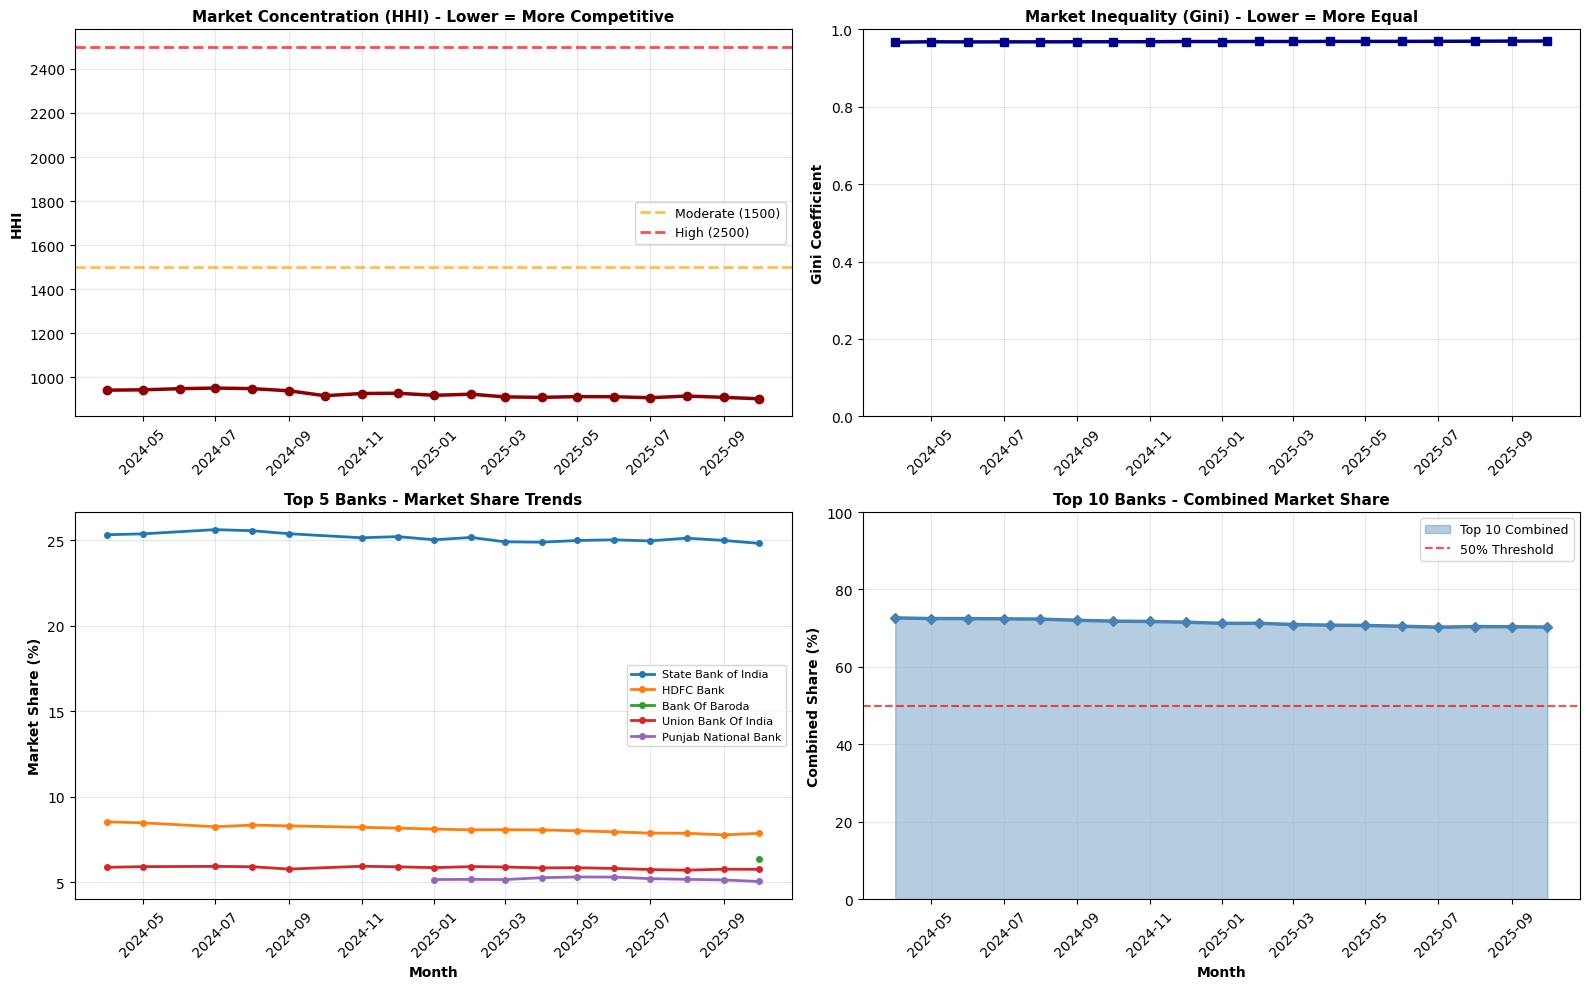


Concentration Metrics Summary:
   Latest HHI: 902 Competitive
   Latest Gini: 0.970 Unequal
   HHI trend: -39 (Stable - competitive)
   Top 10 combined share: 70.3%


In [32]:
#Deep Entity-Level Analysis with Concentration Metrics
print("ENTITY-LEVEL MARKET SHARE & CONCENTRATION")

try:
    # Filter for UPI data only
    upi_entity = entity_df[
        (entity_df['sheet'].str.upper().str.contains('UPI', na=False)) &
        (entity_df['role'].str.upper() == 'REMITTER')
    ].copy()
    
    if len(upi_entity) > 0:
        # Ensure month is datetime
        upi_entity['month_dt'] = pd.to_datetime(upi_entity['month'], errors='coerce')
        
        # Get volume column (handling various column names)
        vol_cols = [c for c in upi_entity.columns if 'volume' in c.lower()]
        vol_col = vol_cols[0] if vol_cols else None
        
        if not vol_col:
            numeric_cols = upi_entity.select_dtypes(include=[np.number]).columns.tolist()
            vol_col = numeric_cols[0] if numeric_cols else None
        
        if vol_col:
            # Aggregate by bank-month
            bank_monthly = upi_entity.groupby(['month_dt', 'entity'])[vol_col].sum().reset_index()
            bank_monthly = bank_monthly.rename(columns={vol_col: 'volume'})
            
            # Calculate market share
            monthly_totals = bank_monthly.groupby('month_dt')['volume'].sum()
            bank_monthly['market_share_%'] = bank_monthly.apply(
                lambda x: (x['volume'] / monthly_totals[x['month_dt']]) * 100, axis=1
            )
            
            # Latest month analysis
            latest_month = bank_monthly['month_dt'].max()
            latest_data = bank_monthly[bank_monthly['month_dt'] == latest_month].sort_values('volume', ascending=False)
            
            print(f"\nLatest Month: {latest_month.strftime('%B %Y')}")
            print(f"   Total UPI Volume: {latest_data['volume'].sum():,.0f} Lakhs")
            print(f"   Active Banks/Apps: {len(latest_data)}")
            
            print(f"\n   Top 10 Banks:")
            print(f"   {'Rank':<6} {'Entity':<40} {'Volume':<15} {'Market Share':<12}")
            
            for rank, (idx, row) in enumerate(latest_data.head(10).iterrows(), 1):
                entity_name = row['entity'][:38]
                print(f"   {rank:<6} {entity_name:<40} {row['volume']:>13,.0f}   {row['market_share_%']:>10.2f}%")
            
            # Market share changes (MoM)
            bank_monthly_sorted = bank_monthly.sort_values(['entity', 'month_dt'])
            bank_monthly_sorted['market_share_change_bps'] = (
                bank_monthly_sorted.groupby('entity')['market_share_%'].diff() * 100
            )
            
            # Detect market share anomalies (>500 bps = 5%)
            ms_anomalies = bank_monthly_sorted[
                (bank_monthly_sorted['market_share_change_bps'].abs() > 500) &
                (bank_monthly_sorted['market_share_change_bps'].notna())
            ].sort_values('market_share_change_bps', key=abs, ascending=False)
            
            if len(ms_anomalies) > 0:
                print(f"\nMARKET SHARE ANOMALIES (Change > 500 basis points):")
                print(f"   {'Date':<15} {'Entity':<35} {'Change (bps)':<15} {'New Share':<12}")
                print("   " + "-" * 80)
                
                for idx, row in ms_anomalies.head(10).iterrows():
                    entity_name = row['entity'][:33]
                    direction = "" if row['market_share_change_bps'] > 0 else "📉"
                    print(f"   {row['month_dt'].strftime('%b %Y'):<15} {entity_name:<35} "
                          f"{direction} {row['market_share_change_bps']:>+8.0f} bps  {row['market_share_%']:>10.2f}%")
            else:
                print(f"\nNo major market share anomalies (>500 bps) detected")
            
            # Concentration metrics over time
            hhi_monthly = []
            gini_monthly = []
            months_list = []
            top10_growth = []
            
            for month in sorted(bank_monthly['month_dt'].unique()):
                month_data = bank_monthly[bank_monthly['month_dt'] == month]
                
                # HHI
                shares = month_data['market_share_%'].values / 100
                hhi = (shares ** 2).sum() * 10000
                hhi_monthly.append(hhi)
                
                # Gini
                sorted_shares = np.sort(month_data['market_share_%'].values)
                n = len(sorted_shares)
                cum_shares = np.cumsum(sorted_shares)
                gini = (2 * np.sum(np.arange(1, n+1) * sorted_shares)) / (n * cum_shares[-1]) - (n+1)/n
                gini_monthly.append(gini)
                
                months_list.append(month)
                
                # Top 10 combined share
                top10_share = month_data.nlargest(10, 'volume')['market_share_%'].sum()
                top10_growth.append(top10_share)
            
            # Visualization: Market concentration and bank dynamics
            fig, axes = plt.subplots(2, 2, figsize=(16, 10))
            
            # Plot 1: HHI over time
            axes[0, 0].plot(months_list, hhi_monthly, marker='o', color='darkred', linewidth=2.5, markersize=6)
            axes[0, 0].axhline(y=1500, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Moderate (1500)')
            axes[0, 0].axhline(y=2500, color='red', linestyle='--', linewidth=2, alpha=0.7, label='High (2500)')
            axes[0, 0].set_ylabel("HHI", fontweight='bold')
            axes[0, 0].set_title("Market Concentration (HHI) - Lower = More Competitive", fontweight='bold', fontsize=11)
            axes[0, 0].legend(fontsize=9)
            axes[0, 0].grid(True, alpha=0.3)
            axes[0, 0].tick_params(axis='x', rotation=45)
            
            # Plot 2: Gini over time
            axes[0, 1].plot(months_list, gini_monthly, marker='s', color='darkblue', linewidth=2.5, markersize=6)
            axes[0, 1].set_ylabel("Gini Coefficient", fontweight='bold')
            axes[0, 1].set_title("Market Inequality (Gini) - Lower = More Equal", fontweight='bold', fontsize=11)
            axes[0, 1].set_ylim([0, 1])
            axes[0, 1].grid(True, alpha=0.3)
            axes[0, 1].tick_params(axis='x', rotation=45)
            
            # Plot 3: Top banks market share trends
            top_banks = latest_data.head(5)['entity'].tolist()
            for bank in top_banks:
                bank_data = bank_monthly[bank_monthly['entity'] == bank].sort_values('month_dt')
                axes[1, 0].plot(bank_data['month_dt'], bank_data['market_share_%'], 
                               marker='o', label=bank[:25], linewidth=2, markersize=4)
            
            axes[1, 0].set_ylabel("Market Share (%)", fontweight='bold')
            axes[1, 0].set_xlabel("Month", fontweight='bold')
            axes[1, 0].set_title("Top 5 Banks - Market Share Trends", fontweight='bold', fontsize=11)
            axes[1, 0].legend(fontsize=8)
            axes[1, 0].grid(True, alpha=0.3)
            axes[1, 0].tick_params(axis='x', rotation=45)
            
            # Plot 4: Top 10 combined share
            axes[1, 1].fill_between(months_list, top10_growth, alpha=0.4, color='steelblue', label='Top 10 Combined')
            axes[1, 1].plot(months_list, top10_growth, marker='D', color='steelblue', linewidth=2.5, markersize=5)
            axes[1, 1].axhline(y=50, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='50% Threshold')
            axes[1, 1].set_ylabel("Combined Share (%)", fontweight='bold')
            axes[1, 1].set_xlabel("Month", fontweight='bold')
            axes[1, 1].set_title("Top 10 Banks - Combined Market Share", fontweight='bold', fontsize=11)
            axes[1, 1].set_ylim([0, 100])
            axes[1, 1].legend(fontsize=9)
            axes[1, 1].grid(True, alpha=0.3)
            axes[1, 1].tick_params(axis='x', rotation=45)
            
            plt.tight_layout()
            plt.show()
            
            # Summary statistics
            print(f"\nConcentration Metrics Summary:")
            print(f"   Latest HHI: {hhi_monthly[-1]:,.0f}", end="")
            if hhi_monthly[-1] < 1500:
                print(" Competitive")
            elif hhi_monthly[-1] < 2500:
                print(" Moderate")
            else:
                print(" High")
            
            print(f"   Latest Gini: {gini_monthly[-1]:.3f}", end="")
            if gini_monthly[-1] < 0.3:
                print(" Equal")
            elif gini_monthly[-1] < 0.6:
                print(" Moderate")
            else:
                print(" Unequal")
            
            hhi_change = hhi_monthly[-1] - hhi_monthly[0] if len(hhi_monthly) > 1 else 0
            print(f"   HHI trend: {hhi_change:+.0f} (", end="")
            if hhi_change > 100:
                print("Consolidating - concern)")
            elif hhi_change < -100:
                print("Fragmenting - new entrants)")
            else:
                print("Stable - competitive)")
            
            print(f"   Top 10 combined share: {top10_growth[-1]:.1f}%")
            
        else:
            print("No volume data found in entity dataset")
    else:
        print("No UPI Remitter data found in entity dataset")

except Exception as e:
    print(f"Note: Entity analysis - {e}")

## Top Banks Analysis – UPI (All Roles Combined)

This section focuses on **bank-level competitive dynamics in UPI**, aggregating volumes across all roles
(Remitter, Beneficiary).

**Key coverage:**
- Identification of **top UPI banks by total transaction volume**
- **Monthly market share trends** for leading banks
- **Absolute volume growth trends** to separate scale vs share effects
- **Latest-month market share distribution** (top banks)
- **Ranking shifts** from the first to the latest month to capture relative gains/losses

This complements earlier **role-specific and concentration analysis** by showing how overall UPI leadership
and competitive positioning evolve over time.


UPI BANK-LEVEL COMPETITIVE DYNAMICS

 TOP 10 UPI BANKS (by total volume - across all roles):
Rank   Bank                                              Volume    Market Share
1      State Bank of India                           1,077,886          25.43%
2      Yes Bank                                        776,150          18.31%
3      Axis Bank                                       432,258          10.20%
4      YES BANK LIMITED                                421,479           9.94%
5      HDFC Bank                                       381,821           9.01%
6      ICICI Bank                                      256,115           6.04%
7      Union Bank Of India                             246,670           5.82%
8      Bank of Baroda                                  240,780           5.68%
9      Canara Bank                                     205,525           4.85%
10     Kotak Mahindra Bank                             199,740           4.71%


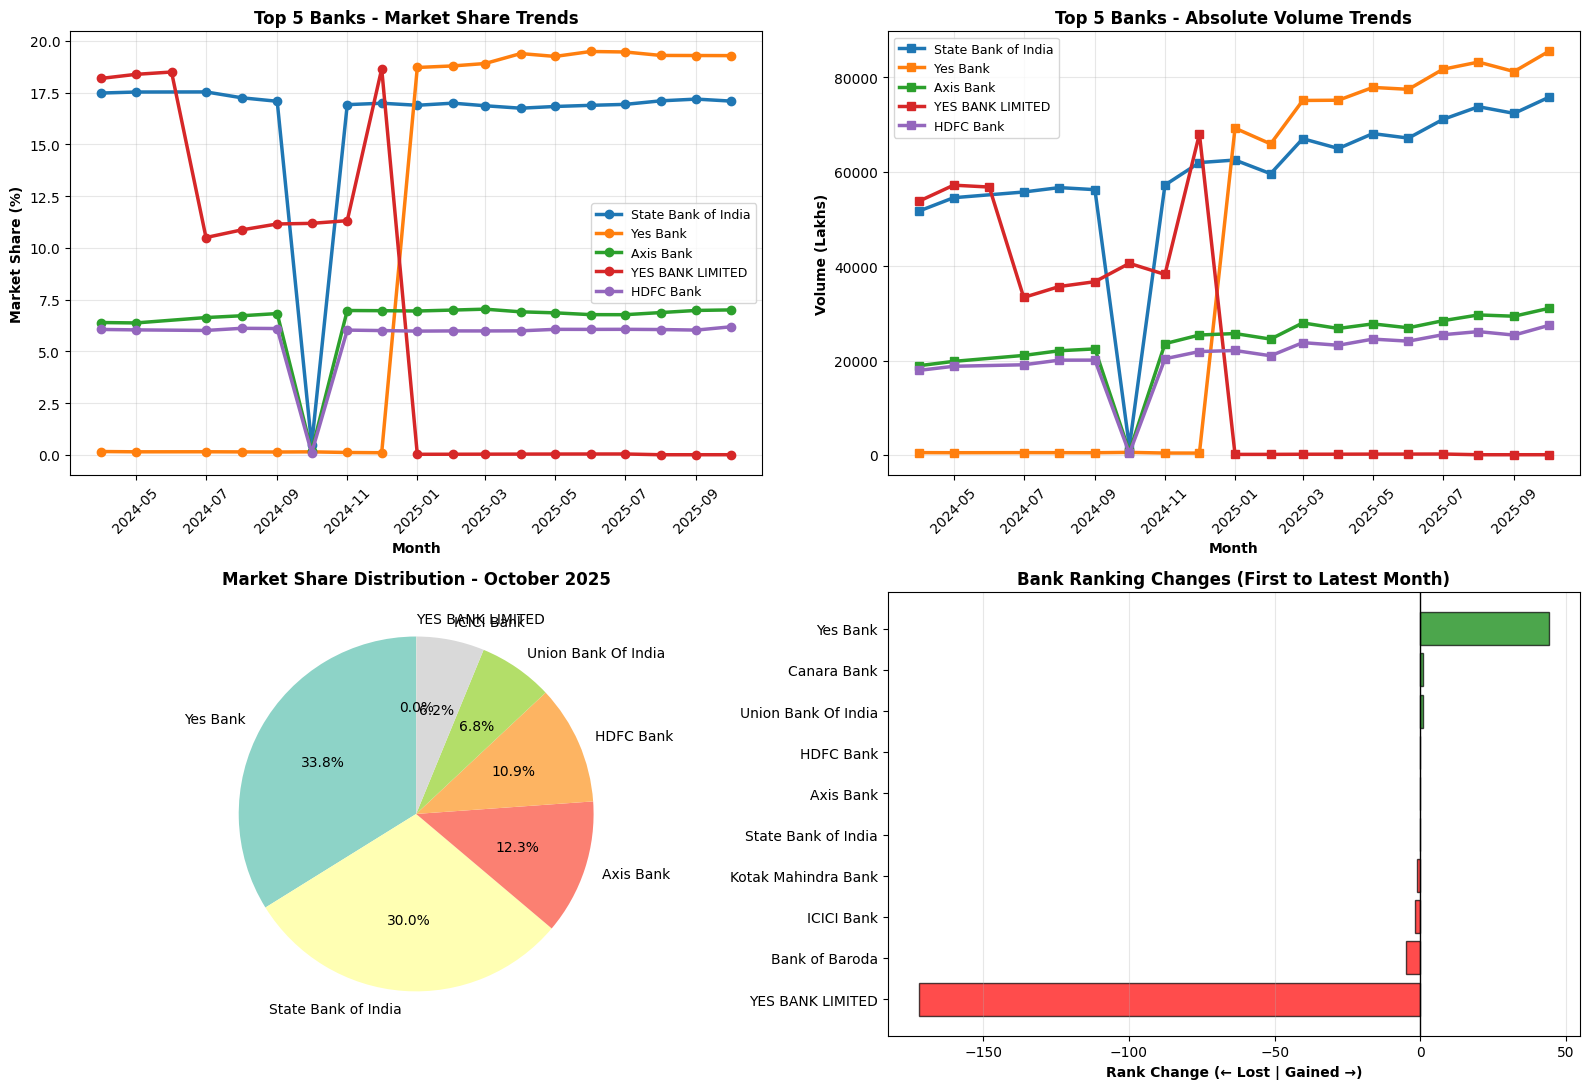

In [33]:
# Top Banks Analysis (UPI Only)
try:
    # Filter for UPI data and prepare
    upi_df = entity_df[entity_df['Sheet'].str.upper() == 'UPI'].copy() if 'Sheet' in entity_df.columns else entity_df.copy()
    
    # Rename columns to standardized names
    if 'Month' in upi_df.columns:
        upi_df = upi_df.rename(columns={'Month': 'month'})
    if 'Entity' in upi_df.columns:
        upi_df = upi_df.rename(columns={'Entity': 'entity'})
    if 'Volume_Lakh' in upi_df.columns:
        upi_df = upi_df.rename(columns={'Volume_Lakh': 'volume'})
    if 'Value_Crore' in upi_df.columns:
        upi_df = upi_df.rename(columns={'Value_Crore': 'value'})
    
    if 'entity' in upi_df.columns and 'month' in upi_df.columns:
        upi_df['month_dt'] = pd.to_datetime(upi_df['month'], errors='coerce')
        
        # Get volume column
        vol_col = 'volume' if 'volume' in upi_df.columns else None
        if not vol_col:
            numeric_cols = upi_df.select_dtypes(include=[np.number]).columns.tolist()
            vol_col = numeric_cols[0] if numeric_cols else None
        
        if vol_col:
            print("UPI BANK-LEVEL COMPETITIVE DYNAMICS")            
            # Aggregate by bank (sum across all roles: Remitter, Beneficiary, Drawee)
            bank_monthly = upi_df.groupby(['month_dt', 'entity'])[vol_col].sum().reset_index()
            bank_monthly = bank_monthly.sort_values(['month_dt', vol_col], ascending=[True, False])
            
            # Calculate market share
            monthly_total = bank_monthly.groupby('month_dt')[vol_col].sum()
            bank_monthly['market_share_%'] = bank_monthly.apply(
                lambda x: (x[vol_col] / monthly_total[x['month_dt']]) * 100, axis=1
            )
            
            # Get top 10 banks
            top_banks = upi_df.groupby('entity')[vol_col].sum().sort_values(ascending=False).head(10).index.tolist()
            
            print(f"\n TOP 10 UPI BANKS (by total volume - across all roles):")
            top_banks_vol = upi_df.groupby('entity')[vol_col].sum().sort_values(ascending=False).head(10)
            top_banks_share = (top_banks_vol / top_banks_vol.sum() * 100)
            
            print(f"{'Rank':<6} {'Bank':<40} {'Volume':>15} {'Market Share':>15}")
            for rank, (bank, vol) in enumerate(top_banks_vol.items(), 1):
                print(f"{rank:<6} {bank:<40} {vol:>14,.0f} {top_banks_share[bank]:>14.2f}%")
            
            # Visualization: Top banks analysis
            fig, axes = plt.subplots(2, 2, figsize=(16, 11))
            
            # Plot 1: Top 5 banks market share over time
            for bank in top_banks[:5]:
                bank_data = bank_monthly[bank_monthly['entity'] == bank].sort_values('month_dt')
                axes[0, 0].plot(bank_data['month_dt'], bank_data['market_share_%'], 
                               marker='o', label=bank, linewidth=2.5)
            
            axes[0, 0].set_xlabel("Month", fontweight='bold')
            axes[0, 0].set_ylabel("Market Share (%)", fontweight='bold')
            axes[0, 0].set_title("Top 5 Banks - Market Share Trends", fontweight='bold', fontsize=12)
            axes[0, 0].legend(fontsize=9)
            axes[0, 0].grid(True, alpha=0.3)
            axes[0, 0].tick_params(axis='x', rotation=45)
            
            # Plot 2: Top banks volume trend
            for bank in top_banks[:5]:
                bank_data = bank_monthly[bank_monthly['entity'] == bank].sort_values('month_dt')
                axes[0, 1].plot(bank_data['month_dt'], bank_data[vol_col], 
                               marker='s', label=bank, linewidth=2.5)
            
            axes[0, 1].set_xlabel("Month", fontweight='bold')
            axes[0, 1].set_ylabel("Volume (Lakhs)", fontweight='bold')
            axes[0, 1].set_title("Top 5 Banks - Absolute Volume Trends", fontweight='bold', fontsize=12)
            axes[0, 1].legend(fontsize=9)
            axes[0, 1].grid(True, alpha=0.3)
            axes[0, 1].tick_params(axis='x', rotation=45)
            
            # Plot 3: Market share pie (latest month)
            latest_month = bank_monthly['month_dt'].max()
            latest_data = bank_monthly[bank_monthly['month_dt'] == latest_month].sort_values(vol_col, ascending=False)
            
            colors_pie = plt.cm.Set3(np.linspace(0, 1, len(top_banks[:8])))
            axes[1, 0].pie(latest_data[latest_data['entity'].isin(top_banks[:8])]['market_share_%'], 
                          labels=latest_data[latest_data['entity'].isin(top_banks[:8])]['entity'],
                          autopct='%1.1f%%', colors=colors_pie, startangle=90)
            axes[1, 0].set_title(f'Market Share Distribution - {latest_month.strftime("%B %Y")}', fontweight='bold', fontsize=12)
            
            # Plot 4: Bank ranking changes
            first_month = bank_monthly['month_dt'].min()
            first_data = bank_monthly[bank_monthly['month_dt'] == first_month].sort_values(vol_col, ascending=False)
            
            rank_changes = []
            for bank in top_banks[:10]:
                first_rank = list(first_data['entity']).index(bank) + 1 if bank in first_data['entity'].values else 11
                latest_rank = list(latest_data['entity']).index(bank) + 1 if bank in latest_data['entity'].values else 11
                rank_change = first_rank - latest_rank
                rank_changes.append({'Bank': bank[:20], 'Change': rank_change, 'Current_Rank': latest_rank})
            
            rank_df = pd.DataFrame(rank_changes).sort_values('Change', ascending=True)
            colors_bar = ['red' if x < 0 else 'green' for x in rank_df['Change']]
            axes[1, 1].barh(rank_df['Bank'], rank_df['Change'], color=colors_bar, alpha=0.7, edgecolor='black')
            axes[1, 1].set_xlabel('Rank Change (← Lost | Gained →)', fontweight='bold')
            axes[1, 1].set_title('Bank Ranking Changes (First to Latest Month)', fontweight='bold', fontsize=12)
            axes[1, 1].axvline(x=0, color='black', linestyle='-', linewidth=1)
            axes[1, 1].grid(True, alpha=0.3, axis='x')
            
            plt.tight_layout()
            plt.show()
            
except Exception as e:
    print(f"Bank analysis note: {e}")
    import traceback
    traceback.print_exc()


## Banking Sector Concentration & Competition (System-Level)

This section provides a **system-wide view of competition across banks**, extending beyond entity- or role-specific analysis.

**What is covered:**
- Monthly **HHI trend** to track consolidation vs fragmentation
- **Top-3 and Top-5 concentration ratios** over time
- **Gini coefficient** to measure inequality in market share distribution
- Count of **active banks** with meaningful participation (>0.5% share)
- Detection of **significant concentration shifts** (HHI change > 100)

Focus here is on **structural competition in the banking sector**, complementing earlier
bank-level and UPI-specific analyses without repeating snapshot metrics.


BANKING SECTOR CONCENTRATION & COMPETITIVE DYNAMICS

 Banking Sector Concentration Summary (Last 10 Months):
Month               HHI  Top-3%  Top-5%   Gini  Active   Total Status              
Jan 2025            832   42.6%   52.7%  0.993      24    4112  Competitive        
Feb 2025            838   42.8%   52.9%  0.993      23    4120  Competitive        
Mar 2025            837   42.8%   52.9%  0.993      24    4134  Competitive        
Apr 2025            848   43.0%   53.2%  0.993      23    4101  Competitive        
May 2025            846   42.9%   53.1%  0.993      24    4120  Competitive        
Jun 2025            855   43.2%   53.3%  0.993      23    4126  Competitive        
Jul 2025            855   43.2%   53.3%  0.993      23    4144  Competitive        
Aug 2025            854   43.3%   53.5%  0.993      23    4144  Competitive        
Sep 2025            860   43.5%   53.7%  0.993      23    4162  Competitive        
Oct 2025            860   43.4%   53.9%  0.993     

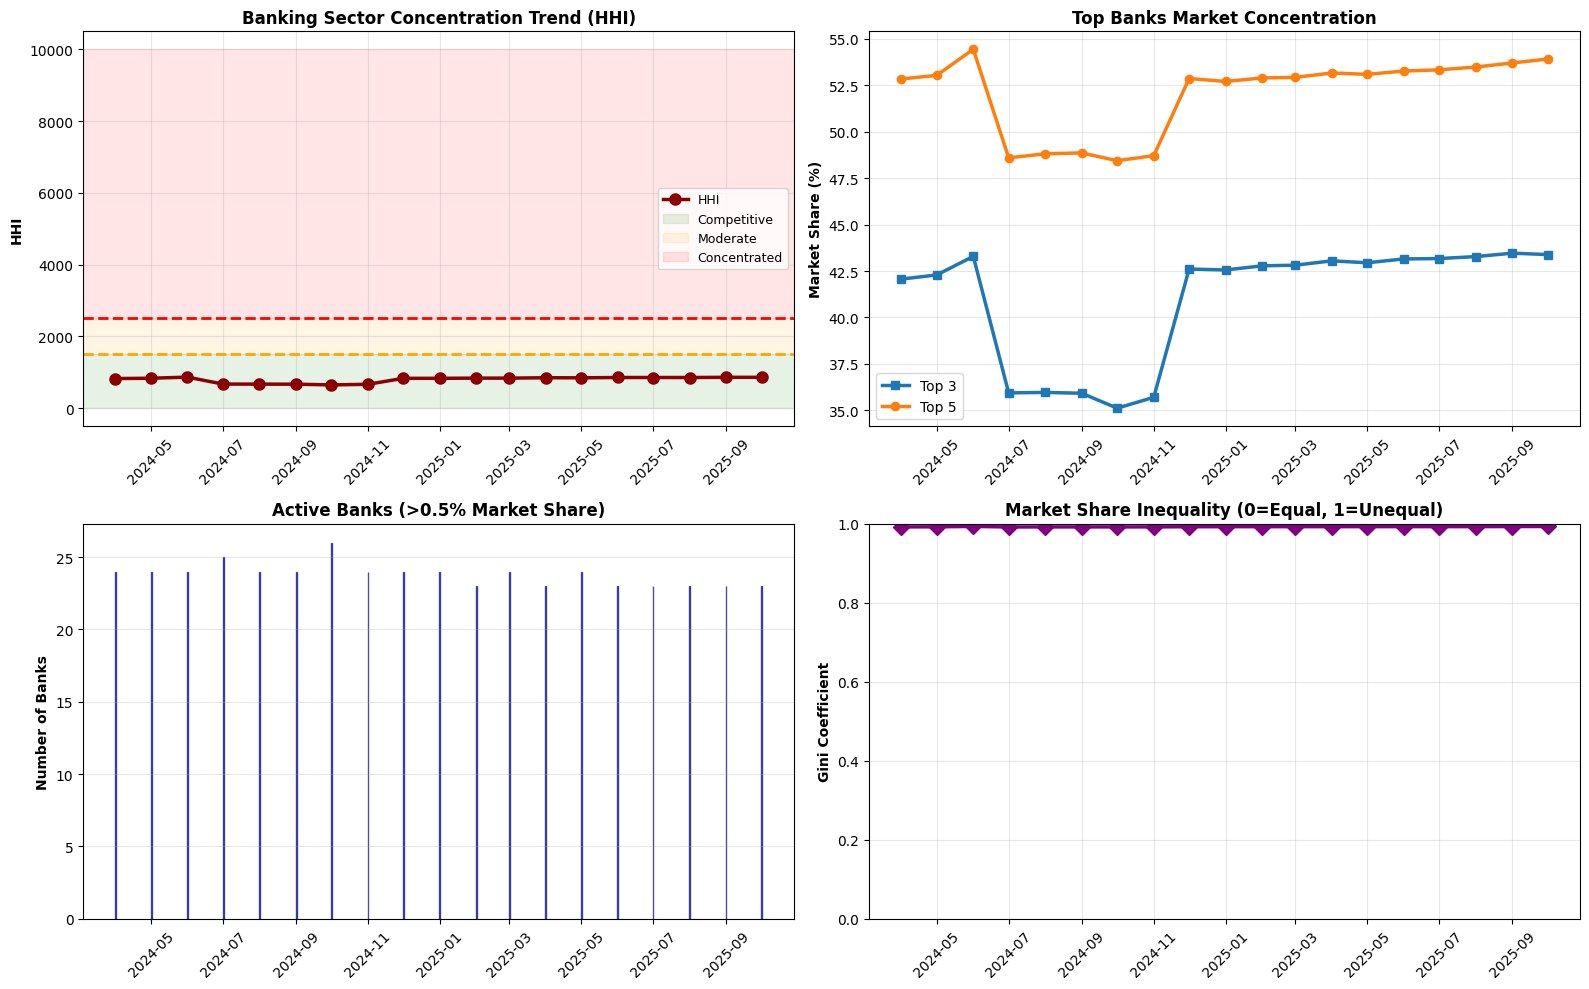


 SIGNIFICANT CONCENTRATION CHANGES (HHI > 100):
  • Jul 2024        →  FRAGMENTING         | HHI Change:    -193
  • Dec 2024        →  CONSOLIDATING       | HHI Change:    +166


In [34]:
# Banking Sector Concentration Metrics
try:
    if 'entity' in entity_df.columns and 'month' in entity_df.columns:
        entity_df['month_dt'] = pd.to_datetime(entity_df['month'], errors='coerce')
        
        vol_cols = [c for c in entity_df.columns if 'vol' in c.lower() and 'entity' not in c.lower() and c != 'volume']
        if len(vol_cols) == 0:
            numeric_cols = entity_df.select_dtypes(include=[np.number]).columns.tolist()
            vol_cols = numeric_cols
        
        if vol_cols:
            vol_col = vol_cols[0]
            
            print("BANKING SECTOR CONCENTRATION & COMPETITIVE DYNAMICS")

            # Monthly aggregation
            bank_monthly = entity_df.groupby(['month_dt', 'entity'])[vol_col].sum().reset_index()
            
            # Calculate concentration metrics for each month
            concentration_metrics = []
            
            for month in sorted(bank_monthly['month_dt'].unique()):
                month_data = bank_monthly[bank_monthly['month_dt'] == month]
                
                total_vol = month_data[vol_col].sum()
                market_shares = (month_data[vol_col] / total_vol * 100).values
                
                # HHI (Herfindahl-Hirschman Index)
                hhi = (market_shares ** 2).sum()
                
                # Top-3 and Top-5 concentration
                top3 = np.sum(np.sort(market_shares)[-3:])
                top5 = np.sum(np.sort(market_shares)[-5:])
                
                # Gini coefficient
                sorted_shares = np.sort(market_shares)
                n = len(sorted_shares)
                gini = (2 * np.sum(np.arange(1, n+1) * sorted_shares)) / (n * np.sum(sorted_shares)) - (n + 1) / n
                
                # Number of active banks with meaningful share (>0.5%)
                active_banks = len(month_data[month_data[vol_col] > total_vol * 0.005])
                
                concentration_metrics.append({
                    'Month': month,
                    'HHI': hhi,
                    'Top3_%': top3,
                    'Top5_%': top5,
                    'Gini': gini,
                    'Active_Banks': active_banks,
                    'Total_Banks': len(month_data)
                })
            
            conc_df = pd.DataFrame(concentration_metrics)
            
            print(f"\n Banking Sector Concentration Summary (Last 10 Months):")
            print(f"{'Month':<15} {'HHI':>7} {'Top-3%':>7} {'Top-5%':>7} {'Gini':>6} {'Active':>7} {'Total':>7} {'Status':<20}")
            
            for idx, row in conc_df.tail(10).iterrows():
                hhi_interp = " Competitive" if row['HHI'] < 1500 else " Moderate" if row['HHI'] < 2500 else " Concentrated"
                print(f"{row['Month'].strftime('%b %Y'):<15} {row['HHI']:>7.0f} {row['Top3_%']:>6.1f}% "
                      f"{row['Top5_%']:>6.1f}% {row['Gini']:>6.3f} {row['Active_Banks']:>7} {row['Total_Banks']:>7} {hhi_interp:<20}")
            
            # Visualization
            fig, axes = plt.subplots(2, 2, figsize=(16, 10))
            
            # Plot 1: HHI Trend with background shading
            axes[0, 0].plot(conc_df['Month'], conc_df['HHI'], marker='o', linewidth=2.5, markersize=8, color='darkred', label='HHI')
            
            # Add color zones as background
            min_month = conc_df['Month'].min()
            max_month = conc_df['Month'].max()
            axes[0, 0].axhspan(0, 1500, alpha=0.1, color='green', label='Competitive')
            axes[0, 0].axhspan(1500, 2500, alpha=0.1, color='orange', label='Moderate')
            axes[0, 0].axhspan(2500, 10000, alpha=0.1, color='red', label='Concentrated')
            
            axes[0, 0].axhline(y=1500, color='orange', linestyle='--', linewidth=2)
            axes[0, 0].axhline(y=2500, color='red', linestyle='--', linewidth=2)
            axes[0, 0].set_ylabel('HHI', fontweight='bold')
            axes[0, 0].set_title('Banking Sector Concentration Trend (HHI)', fontweight='bold', fontsize=12)
            axes[0, 0].legend(fontsize=9, loc='best')
            axes[0, 0].grid(True, alpha=0.3)
            axes[0, 0].tick_params(axis='x', rotation=45)
            
            # Plot 2: Top-3 & Top-5 Share
            axes[0, 1].plot(conc_df['Month'], conc_df['Top3_%'], marker='s', label='Top 3', linewidth=2.5)
            axes[0, 1].plot(conc_df['Month'], conc_df['Top5_%'], marker='o', label='Top 5', linewidth=2.5)
            axes[0, 1].set_ylabel('Market Share (%)', fontweight='bold')
            axes[0, 1].set_title('Top Banks Market Concentration', fontweight='bold', fontsize=12)
            axes[0, 1].legend(fontsize=10)
            axes[0, 1].grid(True, alpha=0.3)
            axes[0, 1].tick_params(axis='x', rotation=45)
            
            # Plot 3: Active Banks Count
            axes[1, 0].bar(conc_df['Month'], conc_df['Active_Banks'], color='steelblue', alpha=0.7, edgecolor='navy')
            axes[1, 0].set_ylabel('Number of Banks', fontweight='bold')
            axes[1, 0].set_title('Active Banks (>0.5% Market Share)', fontweight='bold', fontsize=12)
            axes[1, 0].grid(True, alpha=0.3, axis='y')
            axes[1, 0].tick_params(axis='x', rotation=45)
            
            # Plot 4: Gini Coefficient
            axes[1, 1].plot(conc_df['Month'], conc_df['Gini'], marker='D', linewidth=2.5, markersize=8, color='purple')
            axes[1, 1].set_ylabel('Gini Coefficient', fontweight='bold')
            axes[1, 1].set_title('Market Share Inequality (0=Equal, 1=Unequal)', fontweight='bold', fontsize=12)
            axes[1, 1].set_ylim([0, 1])
            axes[1, 1].grid(True, alpha=0.3)
            axes[1, 1].tick_params(axis='x', rotation=45)
            
            plt.tight_layout()
            plt.show()
            
            # Concentration changes
            conc_df['hhi_change'] = conc_df['HHI'].diff()
            significant_changes = conc_df[conc_df['hhi_change'].abs() > 100]
            
            if len(significant_changes) > 0:
                print(f"\n SIGNIFICANT CONCENTRATION CHANGES (HHI > 100):")
                for idx, row in significant_changes.tail(5).iterrows():
                    direction = " CONSOLIDATING" if row['hhi_change'] > 0 else " FRAGMENTING"
                    print(f"  • {row['Month'].strftime('%b %Y'):<15} → {direction:20} | HHI Change: {row['hhi_change']:+7.0f}")
            
except Exception as e:
    print(f"Concentration analysis note: {e}")


## Bank-Wise Market Visualizations (UPI – Remitter)

This section provides a **visual view of bank-level competition** in UPI remitter activity, complementing earlier summary metrics.

**Charts included:**
- **Top 10 banks by transaction volume**, with market share labels
- **Average transaction size** comparison across leading banks
- **Market share trends over time** for the top 5 banks

These visuals help distinguish:
- **Scale vs share** (large volume ≠ growing dominance)
- **Behavioral differences** in transaction sizes across banks
- **Shifts in competitive position** over time


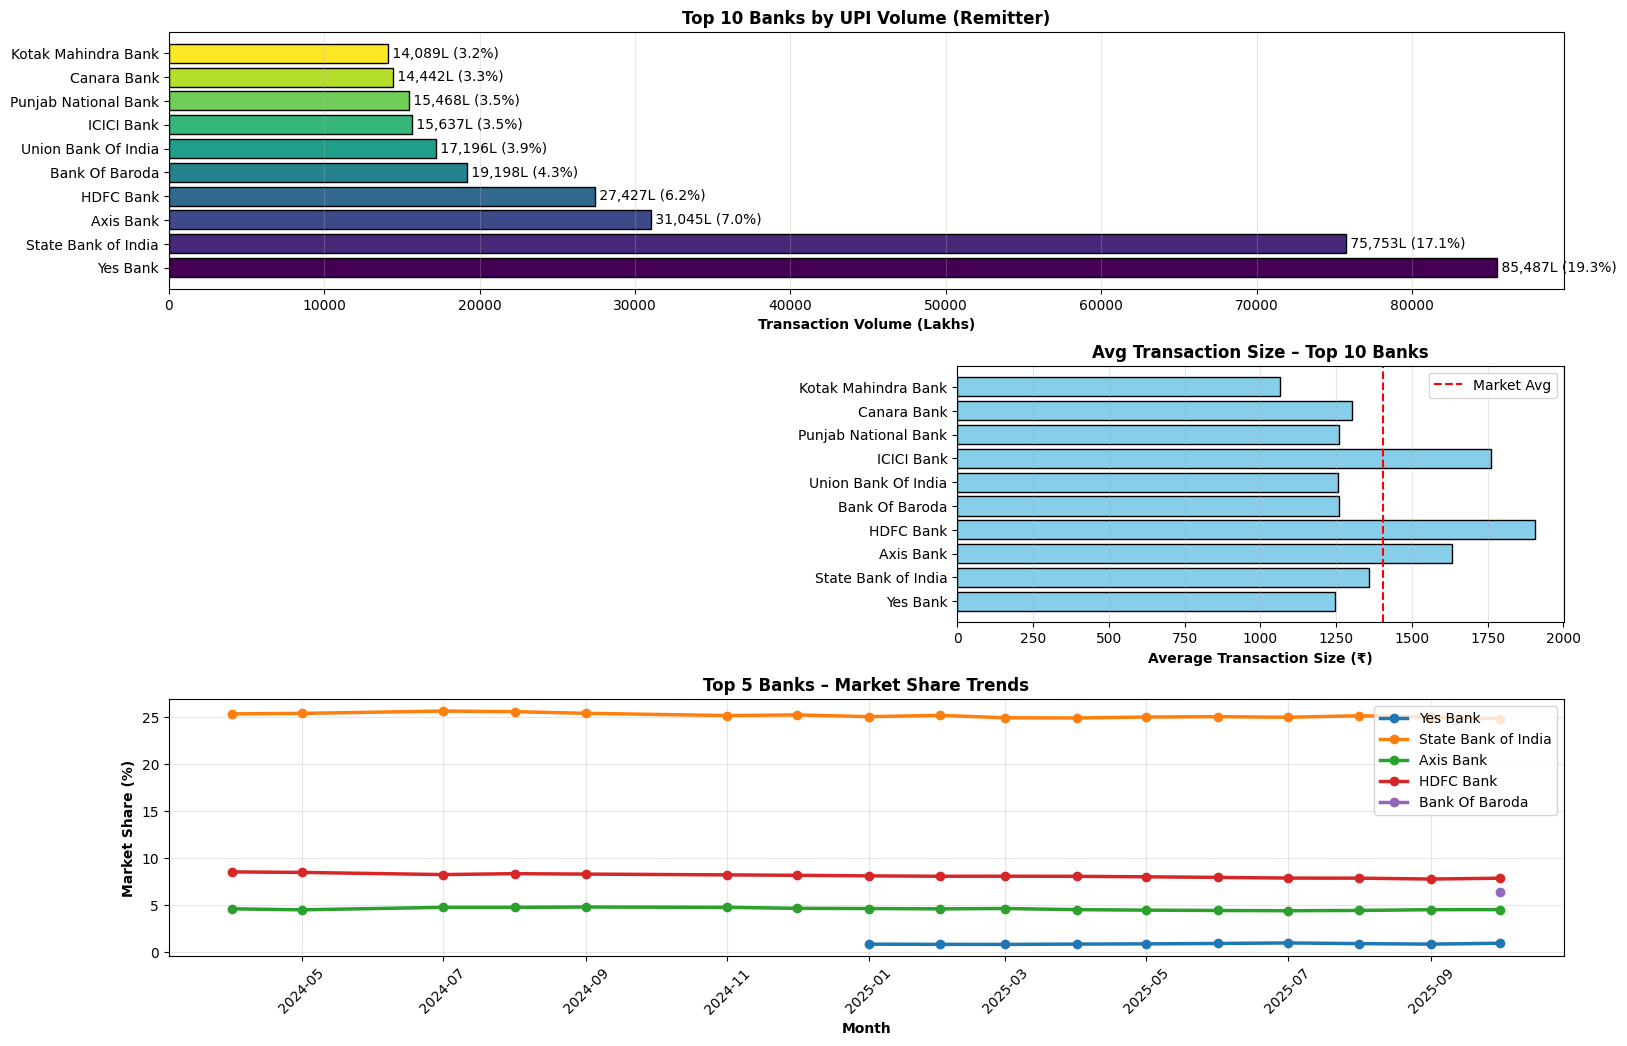

In [35]:
# Bank-wise Market Visualizations (UPI – Remitter)

if upi_remitter.empty:
    print("Cannot create visualizations – no UPI remitter data")

else:
    fig = plt.figure(figsize=(18, 12))
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

    top_10 = latest_data.head(10).copy()
    top_5_banks = top_10.head(5)['entity'].tolist()

    monthly_totals = (
        upi_remitter
        .groupby('month_dt')['volume_lakh']
        .sum()
    )

    ax1 = fig.add_subplot(gs[0, :])
    bars = ax1.barh(
        top_10['entity'],
        top_10['volume_lakh'],
        color=plt.cm.viridis(np.linspace(0, 1, len(top_10))),
        edgecolor='black'
    )

    ax1.set_xlabel('Transaction Volume (Lakhs)', fontweight='bold')
    ax1.set_title('Top 10 Banks by UPI Volume (Remitter)', fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)

    for bar, val in zip(bars, top_10['volume_lakh']):
        pct = (val / total_vol * 100) if total_vol else 0
        ax1.text(
            val,
            bar.get_y() + bar.get_height() / 2,
            f' {val:,.0f}L ({pct:.1f}%)',
            va='center',
            fontsize=10
        )

    ax3 = fig.add_subplot(gs[1, 1])

    value_cols = [
        c for c in upi_remitter.columns
        if any(k in c.lower() for k in ('value', 'val', 'amount'))
    ]

    if value_cols:
        val_col = value_cols[0]
        avg_df = (
            upi_remitter[upi_remitter['month_dt'] == latest_month]
            .groupby('entity')
            .agg(
                volume=('volume_lakh', 'sum'),
                value=(val_col, 'sum')
            )
        )
        avg_df['avg_txn_size'] = (avg_df['value'] / avg_df['volume']) * 100
        top_10 = top_10.merge(
            avg_df['avg_txn_size'],
            on='entity',
            how='left'
        )
    else:
        top_10['avg_txn_size'] = np.nan

    ax3.barh(
        top_10['entity'],
        top_10['avg_txn_size'].fillna(0),
        color='skyblue',
        edgecolor='black'
    )

    ax3.set_xlabel('Average Transaction Size (₹)', fontweight='bold')
    ax3.set_title('Avg Transaction Size – Top 10 Banks', fontweight='bold')
    ax3.grid(axis='x', alpha=0.3)

    mean_size = top_10['avg_txn_size'].mean()
    if not np.isnan(mean_size):
        ax3.axvline(
            mean_size,
            color='red',
            linestyle='--',
            label='Market Avg'
        )
        ax3.legend()

    ax4 = fig.add_subplot(gs[2, :])

    for bank in top_5_banks:
        bank_df = (
            upi_remitter[upi_remitter['entity'] == bank]
            .sort_values('month_dt')
            .copy()
        )

        bank_df['share_%'] = (
            bank_df['volume_lakh'] /
            bank_df['month_dt'].map(monthly_totals) * 100
        )

        ax4.plot(
            bank_df['month_dt'],
            bank_df['share_%'],
            marker='o',
            linewidth=2.5,
            label=bank[:20]
        )

    ax4.set_xlabel('Month', fontweight='bold')
    ax4.set_ylabel('Market Share (%)', fontweight='bold')
    ax4.set_title('Top 5 Banks – Market Share Trends', fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


## Bank-wise Growth, Market Share and Competitive Position (UPI – Remitter)

The table below shows bank-level changes between the first and latest available months:
- Volume growth (%)
- Change in market share (percentage points)
- Rank movement among top banks


In [36]:
first_month = upi_remitter['month_dt'].min()
last_month = upi_remitter['month_dt'].max()

first_data = upi_remitter[upi_remitter['month_dt'] == first_month]
last_data = upi_remitter[upi_remitter['month_dt'] == last_month]

first_total = first_data['volume_lakh'].sum()
last_total = last_data['volume_lakh'].sum()

months = upi_remitter['month_dt'].nunique()

banks = last_data.nlargest(15, 'volume_lakh')['entity']

rows = []

for bank in banks:
    f_vol = first_data.loc[first_data['entity'] == bank, 'volume_lakh'].sum()
    l_vol = last_data.loc[last_data['entity'] == bank, 'volume_lakh'].sum()

    growth = ((l_vol / f_vol) - 1) * 100 if f_vol > 0 else np.nan
    cagr = ((l_vol / f_vol) ** (12 / months) - 1) * 100 if f_vol > 0 else np.nan

    rows.append({
        'Bank': bank,
        'First Vol (Lakh)': f_vol,
        'Latest Vol (Lakh)': l_vol,
        'Growth %': growth,
        'CAGR %': cagr,
        'Share Change (pp)': (l_vol / last_total - f_vol / first_total) * 100
    })

growth_df = (
    pd.DataFrame(rows)
    .sort_values('Latest Vol (Lakh)', ascending=False)
    .reset_index(drop=True)
)

growth_df.head(15)


,Bank,First Vol (Lakh),Latest Vol (Lakh),Growth %,CAGR %,Share Change (pp)
0,State Bank of India,33698.57068,51383.54884,52.479906,30.530869,-0.507798
1,HDFC Bank,11336.35917,16253.63339,43.376133,25.553115,-0.669372
2,Bank Of Baroda,0.00000,13187.72611,NaN,NaN,6.370599
3,Union Bank Of India,7797.25408,11882.66678,52.395531,30.485246,-0.120674
4,Punjab National Bank,0.00000,10414.55615,NaN,NaN,5.030963
5,Kotak Mahindra Bank,6656.07444,9582.76999,43.970295,25.881476,-0.373913
6,Canara Bank,5996.80176,9382.21574,56.453658,32.669145,0.024750
7,Axis Bank,6111.39791,9340.48225,52.837082,30.723899,-0.081547
8,ICICI Bank,5900.20987,7718.14626,30.811385,18.487045,-0.706509
9,Indian Bank,3827.24371,6356.65624,66.089665,37.772885,0.193949


In [37]:
first_rank = (
    first_data.nlargest(15, 'volume_lakh')
    .reset_index(drop=True)
    .assign(Old_Rank=lambda x: x.index + 1)
    .set_index('entity')
)

last_rank = (
    last_data.nlargest(15, 'volume_lakh')
    .reset_index(drop=True)
    .assign(New_Rank=lambda x: x.index + 1)
    .set_index('entity')
)

rank_df = (
    first_rank[['Old_Rank']]
    .join(last_rank[['New_Rank']], how='inner')
    .assign(Rank_Change=lambda x: x.Old_Rank - x.New_Rank)
    .reset_index()
    .rename(columns={'entity': 'Bank'})
)

rank_df.sort_values('Rank_Change', key=abs, ascending=False)


,Bank,Old_Rank,New_Rank,Rank_Change
7,Bank Of India,10,12,-2
9,INDIA POST PAYMENTS BANK LIMITED,13,11,2
4,Axis Bank,7,8,-1
5,Canara Bank,8,7,1
8,Indian Bank,11,10,1
10,Indian Overseas Bank,15,14,1
0,State Bank of India,1,1,0
1,HDFC Bank,2,2,0
2,Union Bank Of India,4,4,0
3,Kotak Mahindra Bank,6,6,0


In [38]:
growth_df.head()

,Bank,First Vol (Lakh),Latest Vol (Lakh),Growth %,CAGR %,Share Change (pp)
0,State Bank of India,33698.57068,51383.54884,52.479906,30.530869,-0.507798
1,HDFC Bank,11336.35917,16253.63339,43.376133,25.553115,-0.669372
2,Bank Of Baroda,0.00000,13187.72611,NaN,NaN,6.370599
3,Union Bank Of India,7797.25408,11882.66678,52.395531,30.485246,-0.120674
4,Punjab National Bank,0.00000,10414.55615,NaN,NaN,5.030963


In [39]:
growth_df.columns

Index(['Bank', 'First Vol (Lakh)', 'Latest Vol (Lakh)', 'Growth %', 'CAGR %',
       'Share Change (pp)'],
      dtype='object')

## Bank Growth and Competitive Dynamics (UPI – Remitter)

This section examines **bank-wise growth and competitive shifts** over the analysis period using volume growth and market share changes.

**What is shown:**
- **Volume growth comparison (Top banks):** highlights banks with faster expansion versus contraction.
- **Market share change:** identifies banks gaining or losing share over time.

Together, these views help distinguish **scale-driven growth** from **competitive reallocation of volumes** within the UPI ecosystem.


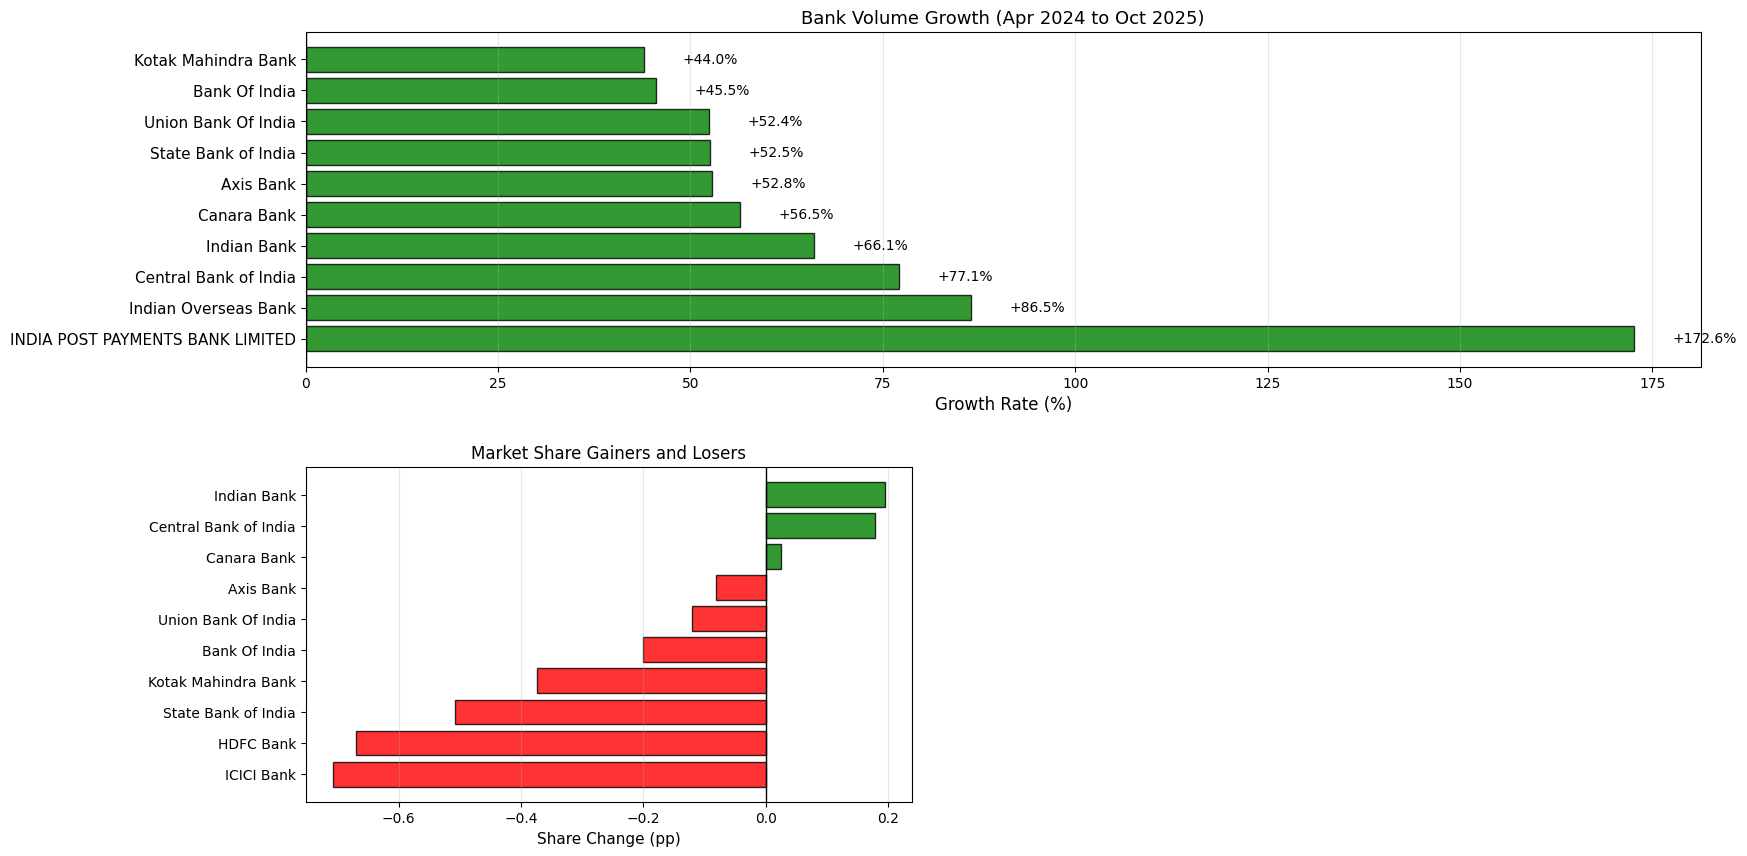

In [40]:
if len(growth_df) > 0:

    df = growth_df.replace([np.inf, -np.inf], np.nan)

    fig = plt.figure(figsize=(18, 10))
    gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

    ax1 = fig.add_subplot(gs[0, :])

    top_growth = (
        df[['Bank', 'Growth %']]
        .dropna()
        .sort_values('Growth %', ascending=False)
        .head(10)
    )

    colors = ['green' if x > 0 else 'red' for x in top_growth['Growth %']]

    bars = ax1.barh(
        range(len(top_growth)),
        top_growth['Growth %'].values,
        color=colors,
        edgecolor='black',
        linewidth=1,
        alpha=0.8
    )

    ax1.set_yticks(range(len(top_growth)))
    ax1.set_yticklabels(top_growth['Bank'], fontsize=11)
    ax1.set_xlabel('Growth Rate (%)', fontsize=12)
    ax1.set_title(
        f'Bank Volume Growth ({first_month:%b %Y} to {last_month:%b %Y})',
        fontsize=13
    )
    ax1.axvline(0, color='black', linewidth=1)
    ax1.grid(axis='x', alpha=0.3)

    for i, val in enumerate(top_growth['Growth %']):
        if np.isfinite(val):
            ax1.text(
                val + (5 if val > 0 else -5),
                i,
                f'{val:+.1f}%',
                va='center',
                ha='left' if val > 0 else 'right',
                fontsize=10
            )

    ax2 = fig.add_subplot(gs[1, 0])

    share_changes = (
        df[['Bank', 'Share Change (pp)']]
        .dropna()
        .sort_values('Share Change (pp)')
        .head(10)
    )

    colors = ['green' if x > 0 else 'red' for x in share_changes['Share Change (pp)']]

    ax2.barh(
        range(len(share_changes)),
        share_changes['Share Change (pp)'].values,
        color=colors,
        edgecolor='black',
        linewidth=1,
        alpha=0.8
    )

    ax2.set_yticks(range(len(share_changes)))
    ax2.set_yticklabels(share_changes['Bank'], fontsize=10)
    ax2.set_xlabel('Share Change (pp)', fontsize=11)
    ax2.set_title('Market Share Gainers and Losers', fontsize=12)
    ax2.axvline(0, color='black', linewidth=1)
    ax2.grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()


## UPI Entity Analysis: Market Share & Concentration

This section analyses competitive dynamics in UPI remitter activity at the bank level.

### Market Share Shifts
- Top 10 banks selected based on cumulative transaction volume  
- Monthly market share (%) computed for each bank  
- First vs last month comparison highlights share gains and losses  

### Market Concentration
- Gini Coefficient tracks inequality in market share distribution  
- HHI measures overall market concentration  
- Top 3 share indicates dominance of leading banks  

Lower Gini and HHI values imply a more competitive and evenly distributed market.

### Growth Comparison
- Growth rates calculated for top banks over the analysis period  
- Compared against overall system growth  
- Identifies banks outperforming or lagging the system average  

This analysis helps assess whether UPI growth is broad-based or concentrated among a few large players.


In [41]:
upi_remitter = entity_df[
    entity_df['sheet'].str.contains('UPI', case=False, na=False) &
    (entity_df['role'] == 'Remitter')
].copy()

if not upi_remitter.empty and 'month_dt' in upi_remitter.columns:

    months = sorted(upi_remitter['month_dt'].unique())
    first_month, last_month = months[0], months[-1]

    top_banks = (
        upi_remitter.groupby('entity')['volume_lakh']
        .sum()
        .nlargest(10)
        .index
    )

    # Monthly market share (top banks)
    records = []
    for m in months:
        mdf = upi_remitter[upi_remitter['month_dt'] == m]
        total = mdf['volume_lakh'].sum()

        for b in top_banks:
            vol = mdf.loc[mdf['entity'] == b, 'volume_lakh'].sum()
            share = (vol / total * 100) if total > 0 else 0
            records.append([m, b, share])

    share_df = pd.DataFrame(records, columns=['month', 'bank', 'share'])

    # First vs last month comparison
    first_last = (
        share_df[share_df['month'].isin([first_month, last_month])]
        .pivot(index='bank', columns='month', values='share')
        .fillna(0)
    )

    first_last['change_bps'] = (first_last[last_month] - first_last[first_month]) * 100
    first_last = first_last.sort_values('change_bps', ascending=False)

    print("\nMarket share change (Top banks)")
    print(first_last[[first_month, last_month, 'change_bps']].round(2))

    # Gini + HHI over time
    gini_rows = []
    for m in months:
        mdf = upi_remitter[upi_remitter['month_dt'] == m]
        total = mdf['volume_lakh'].sum()

        shares = (mdf['volume_lakh'] / total).values if total > 0 else np.array([])
        shares = np.sort(shares)

        if len(shares) > 0:
            n = len(shares)
            gini = (2 * np.sum((np.arange(1, n + 1)) * shares)) / (n * shares.sum()) - (n + 1) / n
            hhi = (shares ** 2).sum() * 10000
        else:
            gini, hhi = 0, 0

        top3 = (
            mdf.nlargest(3, 'volume_lakh')['volume_lakh'].sum() / total * 100
            if total > 0 else 0
        )

        gini_rows.append([m, gini, hhi, top3])

    gini_df = pd.DataFrame(
        gini_rows,
        columns=['month', 'gini', 'hhi', 'top3_share']
    )

    print("\nConcentration over time")
    print(gini_df.round(3))

    # Growth vs system
    system_growth = (
        upi_remitter.loc[upi_remitter['month_dt'] == last_month, 'volume_lakh'].sum() /
        upi_remitter.loc[upi_remitter['month_dt'] == first_month, 'volume_lakh'].sum() - 1
    ) * 100

    growth_rows = []
    for b in top_banks:
        v0 = upi_remitter.loc[
            (upi_remitter['month_dt'] == first_month) & (upi_remitter['entity'] == b),
            'volume_lakh'
        ].sum()

        v1 = upi_remitter.loc[
            (upi_remitter['month_dt'] == last_month) & (upi_remitter['entity'] == b),
            'volume_lakh'
        ].sum()

        growth = ((v1 / v0) - 1) * 100 if v0 > 0 else 0
        growth_rows.append([b, growth, growth - system_growth])

    growth_df = pd.DataFrame(
        growth_rows,
        columns=['bank', 'growth_pct', 'vs_system']
    ).sort_values('growth_pct', ascending=False)

    print(f"\nSystem growth: {system_growth:.1f}%")
    print(growth_df.round(2))

else:
    print("Insufficient UPI Remitter data")



Market share change (Top banks)
month                 2024-04-01 00:00:00  2025-10-01 00:00:00  change_bps
bank                                                                      
Punjab National Bank                 0.00                 5.03      503.10
Indian Bank                          2.88                 3.07       19.39
Canara Bank                          4.51                 4.53        2.47
Axis Bank                            4.59                 4.51       -8.15
Union Bank Of India                  5.86                 5.74      -12.07
Kotak Mahindra Bank                  5.00                 4.63      -37.39
State Bank of India                 25.33                24.82      -50.78
HDFC Bank                            8.52                 7.85      -66.94
ICICI Bank                           4.43                 3.73      -70.65
Bank of Baroda                       6.12                 0.00     -612.33

Concentration over time
        month   gini      hhi  top3_share


## UPI Entity-Level Analysis: Market Share, Concentration & Growth

This section examines competitive dynamics among UPI remitter banks using monthly transaction volumes.

### Market Share Movement
- Top 10 banks identified by cumulative transaction volume  
- Market share calculated for each month  
- First vs last month comparison highlights relative gains and losses  

### Market Concentration
- **Gini coefficient** used to measure inequality in market shares  
- **HHI** used to assess overall concentration  
- **Top 3 share** indicates dominance of leading banks  

Lower Gini and HHI values suggest a more competitive and evenly distributed market.

### Growth vs System
- Bank-level growth computed between the first and last month  
- Compared against overall system growth  
- Highlights banks outperforming or lagging the market  

Together, these metrics help assess whether UPI growth is broad-based or driven by a few dominant players.


In [42]:
upi_remitter = entity_df[
    entity_df['sheet'].str.contains('UPI', case=False, na=False) &
    (entity_df['role'] == 'Remitter')
].copy()

if upi_remitter.empty or 'month_dt' not in upi_remitter.columns:
    print("Insufficient data for analysis")
else:
    months = sorted(upi_remitter['month_dt'].unique())
    first_month, last_month = months[0], months[-1]

    top_banks = (
        upi_remitter.groupby('entity')['volume_lakh']
        .sum()
        .nlargest(10)
        .index.tolist()
    )

    # Market share: first vs last month
    first_data = upi_remitter[upi_remitter['month_dt'] == first_month]
    last_data = upi_remitter[upi_remitter['month_dt'] == last_month]

    first_total = first_data['volume_lakh'].sum()
    last_total = last_data['volume_lakh'].sum()

    share_rows = []
    for bank in top_banks:
        f_share = first_data.loc[first_data['entity'] == bank, 'volume_lakh'].sum() / first_total * 100
        l_share = last_data.loc[last_data['entity'] == bank, 'volume_lakh'].sum() / last_total * 100

        share_rows.append({
            'Bank': bank,
            'First Share %': f_share,
            'Last Share %': l_share,
            'Change (bps)': (l_share - f_share) * 100
        })

    share_df = pd.DataFrame(share_rows).sort_values('Change (bps)', ascending=False)
    display(share_df.round(2))

    # Market concentration: Gini & HHI
    gini_rows = []

    for m in months:
        mdata = upi_remitter[upi_remitter['month_dt'] == m]
        total = mdata['volume_lakh'].sum()

        shares = mdata['volume_lakh'] / total
        shares = shares.values

        if len(shares) > 0:
            sorted_shares = np.sort(shares)
            n = len(sorted_shares)
            gini = (
                (2 * np.sum((np.arange(1, n + 1)) * sorted_shares)) /
                (n * sorted_shares.sum())
            ) - (n + 1) / n
        else:
            gini = np.nan

        hhi = (shares ** 2).sum() * 10000
        top3 = mdata.nlargest(3, 'volume_lakh')['volume_lakh'].sum() / total * 100

        gini_rows.append({
            'Month': m,
            'Gini': gini,
            'HHI': hhi,
            'Top 3 Share %': top3
        })

    gini_df = pd.DataFrame(gini_rows)
    display(gini_df.round(3))

    # Growth vs system average
    system_growth = (
        last_total / first_total - 1
    ) * 100

    growth_rows = []
    for bank in top_banks:
        f_vol = first_data.loc[first_data['entity'] == bank, 'volume_lakh'].sum()
        l_vol = last_data.loc[last_data['entity'] == bank, 'volume_lakh'].sum()

        growth = ((l_vol / f_vol) - 1) * 100 if f_vol > 0 else np.nan

        growth_rows.append({
            'Bank': bank,
            'Growth %': growth,
            'Vs System %': growth - system_growth
        })

    growth_df = pd.DataFrame(growth_rows).sort_values('Growth %', ascending=False)
    display(growth_df.round(2))


,Bank,First Share %,Last Share %,Change (bps)
8,Punjab National Bank,0.00,5.03,503.10
9,Indian Bank,2.88,3.07,19.39
6,Canara Bank,4.51,4.53,2.47
5,Axis Bank,4.59,4.51,-8.15
2,Union Bank Of India,5.86,5.74,-12.07
4,Kotak Mahindra Bank,5.00,4.63,-37.39
0,State Bank of India,25.33,24.82,-50.78
1,HDFC Bank,8.52,7.85,-66.94
7,ICICI Bank,4.43,3.73,-70.65
3,Bank of Baroda,6.12,0.00,-612.33


,Month,Gini,HHI,Top 3 Share %
0,2024-04-01,0.967,941.439,39.974
1,2024-05-01,0.968,942.925,40.002
2,2024-06-01,0.967,948.082,40.086
3,2024-07-01,0.968,951.006,39.997
4,2024-08-01,0.968,948.344,40.016
5,2024-09-01,0.968,938.479,39.855
6,2024-10-01,0.968,916.219,39.432
7,2024-11-01,0.968,926.214,39.545
8,2024-12-01,0.969,927.462,39.580
9,2025-01-01,0.968,918.054,39.389


,Bank,Growth %,Vs System %
9,Indian Bank,66.09,10.49
6,Canara Bank,56.45,0.85
5,Axis Bank,52.84,-2.76
0,State Bank of India,52.48,-3.12
2,Union Bank Of India,52.40,-3.20
4,Kotak Mahindra Bank,43.97,-11.63
1,HDFC Bank,43.38,-12.22
7,ICICI Bank,30.81,-24.79
3,Bank of Baroda,-100.00,-155.60
8,Punjab National Bank,NaN,NaN


# 2.3 Entity-Level Anomaly Detection

## Entity-Level Market Share & Concentration

This analysis tracks how transaction volumes are distributed across entities over time.

- Monthly market share (%) is calculated for each entity
- Focus is on the top 5 entities by activity
- Market concentration is measured using HHI

**HHI Interpretation**
- < 1500: Competitive  
- 1500–2500: Moderately concentrated  
- > 2500: Highly concentrated  

Month-on-month market share changes above **±500 bps** are flagged to capture sharp gains or losses.

Outputs include market share trends, HHI trends, and key market share shifts.


ENTITY-LEVEL MARKET SHARE ANALYSIS


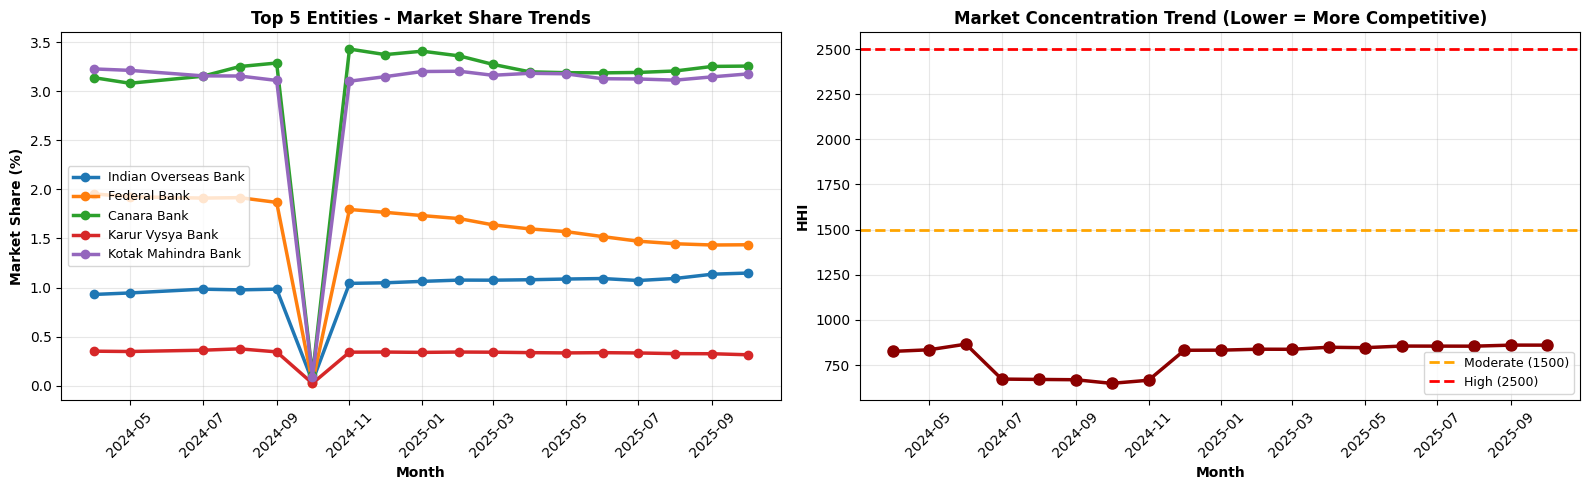


MARKET SHARE ANOMALIES (> 500 bps change):
GAIN       | Yes Bank                  | Jan 2025        |   +1861 bps | MS: 18.72%
GAIN       | STATE BANK OF INDIA       | Jun 2024        |   +1760 bps | MS: 17.67%
GAIN       | State Bank of India       | Nov 2024        |   +1644 bps | MS: 16.92%
GAIN       | STATE BANK OF INDIA       | Oct 2024        |   +1627 bps | MS: 16.34%
GAIN       | PAYTM PAYMENTS BANK       | Jul 2024        |    +787 bps | MS:  7.91%
GAIN       | YES BANK LIMITED          | Dec 2024        |    +734 bps | MS: 18.65%
GAIN       | Axis Bank                 | Nov 2024        |    +679 bps | MS:  6.98%
GAIN       | AXIS BANK                 | Oct 2024        |    +670 bps | MS:  7.14%
GAIN       | AXIS BANK                 | Jun 2024        |    +638 bps | MS:  7.13%
GAIN       | HDFC BANK                 | Jun 2024        |    +604 bps | MS:  6.24%

Current Market Concentration:
  HHI: 860 → Competitive


In [43]:
# Entity-level Analysis - Market Share & Concentration
try:
    if 'entity' in entity_df.columns and 'month' in entity_df.columns:
        entity_df['month_dt'] = pd.to_datetime(entity_df['month'], errors='coerce')
        
        # Get volume column
        vol_cols = [c for c in entity_df.columns if 'vol' in c.lower() and 'entity' not in c.lower() and c != 'volume']
        if len(vol_cols) == 0:
            numeric_cols = entity_df.select_dtypes(include=[np.number]).columns.tolist()
            vol_cols = numeric_cols
        
        vol_col = vol_cols[0] if vol_cols else None
        
        if vol_col:
            # Calculate monthly market shares
            monthly_entity_vol = entity_df.groupby(['month_dt', 'entity'])[vol_col].sum().reset_index()
            monthly_total = monthly_entity_vol.groupby('month_dt')[vol_col].sum()
            monthly_entity_vol['market_share_%'] = (
                monthly_entity_vol.apply(
                    lambda x: (x[vol_col] / monthly_total[x['month_dt']]) * 100, axis=1
                )
            )
            
            # Get top 5 entities
            top_entities = entity_df['entity'].value_counts().head(5).index.tolist()
            
            print("ENTITY-LEVEL MARKET SHARE ANALYSIS")
            
            # Plot 1: Market share trends
            fig, axes = plt.subplots(1, 2, figsize=(16, 5))
            
            for entity in top_entities:
                entity_data = monthly_entity_vol[monthly_entity_vol['entity'] == entity]
                axes[0].plot(entity_data['month_dt'], entity_data['market_share_%'], 
                           marker='o', label=entity, linewidth=2.5)
            
            axes[0].set_xlabel("Month", fontweight='bold')
            axes[0].set_ylabel("Market Share (%)", fontweight='bold')
            axes[0].set_title("Top 5 Entities - Market Share Trends", fontweight='bold', fontsize=12)
            axes[0].legend(fontsize=9)
            axes[0].grid(True, alpha=0.3)
            axes[0].tick_params(axis='x', rotation=45)
            
            # Plot 2: Market concentration (HHI)
            hhi_list = []
            months_list = []
            
            for month in sorted(monthly_entity_vol['month_dt'].unique()):
                month_data = monthly_entity_vol[monthly_entity_vol['month_dt'] == month]
                market_shares = month_data['market_share_%'].values
                hhi = (market_shares ** 2).sum()
                hhi_list.append(hhi)
                months_list.append(month)
            
            axes[1].plot(months_list, hhi_list, marker='o', color='darkred', linewidth=2.5, markersize=8)
            axes[1].axhline(y=1500, color='orange', linestyle='--', linewidth=2, label='Moderate (1500)')
            axes[1].axhline(y=2500, color='red', linestyle='--', linewidth=2, label='High (2500)')
            axes[1].set_xlabel("Month", fontweight='bold')
            axes[1].set_ylabel("HHI", fontweight='bold')
            axes[1].set_title("Market Concentration Trend (Lower = More Competitive)", fontweight='bold', fontsize=12)
            axes[1].legend(fontsize=9)
            axes[1].grid(True, alpha=0.3)
            axes[1].tick_params(axis='x', rotation=45)
            
            plt.tight_layout()
            plt.show()
            
            # Market share anomalies
            monthly_entity_vol = monthly_entity_vol.sort_values(['entity', 'month_dt'])
            monthly_entity_vol['ms_change_bps'] = (
                monthly_entity_vol.groupby('entity')['market_share_%'].diff() * 100
            )
            
            ms_anomalies = monthly_entity_vol[
                (monthly_entity_vol['ms_change_bps'].abs() > 500) &
                (monthly_entity_vol['ms_change_bps'].notna())
            ].sort_values('ms_change_bps', ascending=False)
            
            if len(ms_anomalies) > 0:
                print(f"\nMARKET SHARE ANOMALIES (> 500 bps change):")
                for idx, row in ms_anomalies.head(10).iterrows():
                    direction = "GAIN" if row['ms_change_bps'] > 0 else "LOSS"
                    print(f"{direction:10} | {row['entity']:25} | {row['month_dt'].strftime('%b %Y'):15} | "
                          f"{row['ms_change_bps']:+7.0f} bps | MS: {row['market_share_%']:5.2f}%")
            
            print(f"\nCurrent Market Concentration:")
            print(f"  HHI: {hhi_list[-1]:.0f} → {'Competitive' if hhi_list[-1] < 1500 else ' Moderate' if hhi_list[-1] < 2500 else ' High'}")
            
except Exception as e:
    print(f"Entity analysis note: {e}")


UPI BANK GROWTH RATES & ANOMALY DETECTION

UPI BANK GROWTH ANOMALIES (Unusual MoM patterns):
Bank                                     Month         Growth% Type            Severity  
THE JAMMU AND KASHMIR BANK LIMITED       Sep 2025     1439048.2% Acceleration    4.0σ      
CAPITAL SMALL FINANCE BANK LIMITED       Jun 2024     11580.8% Acceleration    4.0σ      
GP PARSIK SAHAKARI BANK LTD.             Jun 2024      8935.1% Acceleration    4.0σ      
WORLDLINE EPAYMENTS INDIA PRIVATE LIMITED Sep 2025      7719.3% Acceleration    4.0σ      
TJSB SAHAKARI BANK LIMITED               Sep 2025      3098.4% Acceleration    4.0σ      
JAMPETA COOP URBAN BANK LTD              May 2025      3003.2% Acceleration    4.0σ      
THE SARASWAT CO-OPERATIVE BANK LIMITED   Aug 2025      2319.5% Acceleration    4.0σ      
COASTAL LOCAL AREA BANK LTD              Jun 2024      2050.5% Acceleration    4.0σ      
SHRI SWAMI SAMARTH SAHAKARI BANK LTD     Oct 2024      2250.0% Acceleration    4.0σ      
THE 

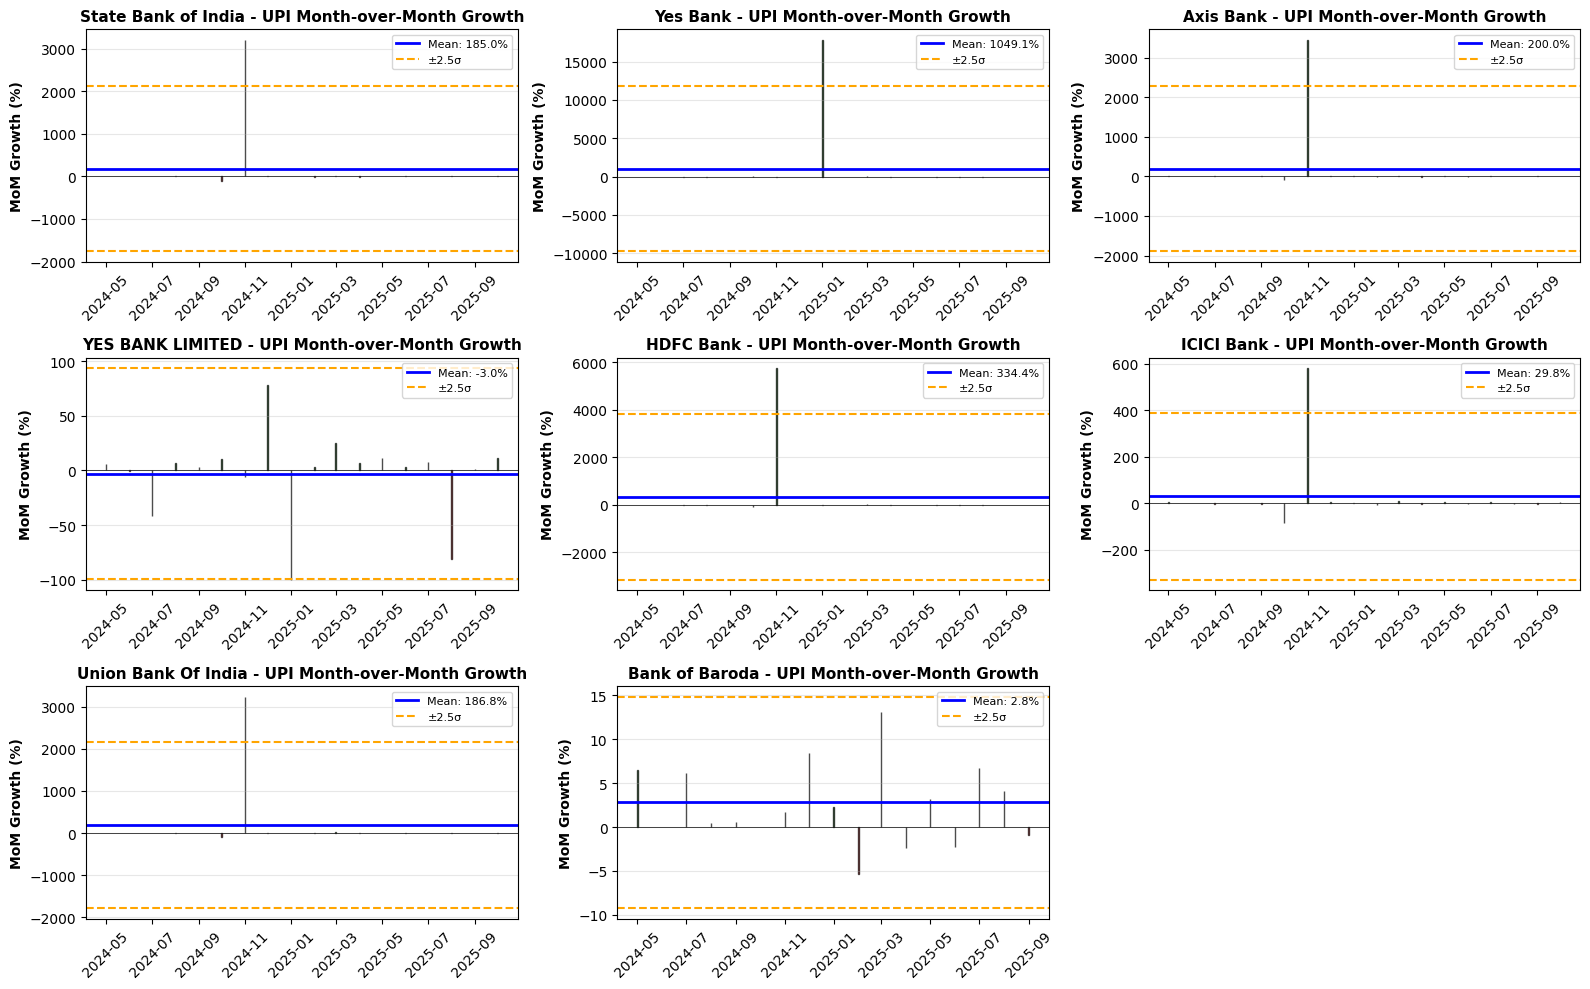

In [44]:
# UPI Bank Growth Rates & Anomalies
try:
    # Filter for UPI data
    upi_df = entity_df[entity_df['Sheet'].str.upper() == 'UPI'].copy() if 'Sheet' in entity_df.columns else entity_df.copy()
    
    # Rename columns to standardized names
    if 'Month' in upi_df.columns:
        upi_df = upi_df.rename(columns={'Month': 'month'})
    if 'Entity' in upi_df.columns:
        upi_df = upi_df.rename(columns={'Entity': 'entity'})
    if 'Volume_Lakh' in upi_df.columns:
        upi_df = upi_df.rename(columns={'Volume_Lakh': 'volume'})
    if 'Value_Crore' in upi_df.columns:
        upi_df = upi_df.rename(columns={'Value_Crore': 'value'})
    
    if 'entity' in upi_df.columns and 'month' in upi_df.columns:
        upi_df['month_dt'] = pd.to_datetime(upi_df['month'], errors='coerce')
        
        vol_col = 'volume' if 'volume' in upi_df.columns else None
        if not vol_col:
            numeric_cols = upi_df.select_dtypes(include=[np.number]).columns.tolist()
            vol_col = numeric_cols[0] if numeric_cols else None
        
        if vol_col:
            print("UPI BANK GROWTH RATES & ANOMALY DETECTION")
            
            # Calculate growth rates (aggregate across all roles)
            bank_monthly = upi_df.groupby(['month_dt', 'entity'])[vol_col].sum().reset_index()
            bank_monthly = bank_monthly.sort_values(['entity', 'month_dt'])
            
            # Month-over-month growth
            bank_monthly['mom_growth_%'] = bank_monthly.groupby('entity')[vol_col].pct_change() * 100
            
            # Identify growth anomalies
            growth_anomalies = []
            
            for bank in bank_monthly['entity'].unique():
                bank_data = bank_monthly[bank_monthly['entity'] == bank].copy()
                bank_data = bank_data.dropna(subset=['mom_growth_%'])
                
                if len(bank_data) > 5:
                    mean_growth = bank_data['mom_growth_%'].mean()
                    std_growth = bank_data['mom_growth_%'].std()
                    
                    # Anomalies: growth rates > 2.5σ from mean
                    anomaly_mask = np.abs(bank_data['mom_growth_%'] - mean_growth) > 2.5 * std_growth
                    anomalies = bank_data[anomaly_mask]
                    
                    for idx, row in anomalies.iterrows():
                        growth_anomalies.append({
                            'Bank': bank,
                            'Month': row['month_dt'],
                            'Growth_%': row['mom_growth_%'],
                            'Volume': row[vol_col],
                            'Type': 'Acceleration' if row['mom_growth_%'] > 0 else 'Deceleration',
                            'Std_From_Mean': (row['mom_growth_%'] - mean_growth) / std_growth if std_growth > 0 else 0
                        })
            
            if growth_anomalies:
                growth_anom_df = pd.DataFrame(growth_anomalies).sort_values('Std_From_Mean', ascending=False)
                
                print(f"\nUPI BANK GROWTH ANOMALIES (Unusual MoM patterns):")
                print(f"{'Bank':<40} {'Month':<12} {'Growth%':>8} {'Type':<15} {'Severity':<10}")
                
                for idx, row in growth_anom_df.head(10).iterrows():
                    severity = f"{abs(row['Std_From_Mean']):.1f}σ"
                    print(f"{row['Bank']:<40} {row['Month'].strftime('%b %Y'):<12} "
                          f"{row['Growth_%']:>7.1f}% {row['Type']:<15} {severity:<10}")
            else:
                print("\nNo significant growth anomalies detected in UPI banks")
            
            # Visualization: Growth trends for top banks
            top_banks = upi_df.groupby('entity')[vol_col].sum().sort_values(ascending=False).head(8).index.tolist()
            num_banks = len(top_banks)
            
            # Create grid based on number of banks
            if num_banks <= 4:
                rows, cols = 2, 2
            elif num_banks <= 6:
                rows, cols = 2, 3
            else:
                rows, cols = 3, 3
            
            fig, axes = plt.subplots(rows, cols, figsize=(16, 10))
            axes = axes.flatten()
            
            for idx, bank in enumerate(top_banks):
                bank_data = bank_monthly[bank_monthly['entity'] == bank].sort_values('month_dt')
                bank_data = bank_data.dropna(subset=['mom_growth_%'])
                
                if len(bank_data) > 0:
                    ax = axes[idx]
                    
                    colors = ['green' if x > 0 else 'red' for x in bank_data['mom_growth_%']]
                    ax.bar(bank_data['month_dt'], bank_data['mom_growth_%'], color=colors, alpha=0.7, edgecolor='black')
                    
                    mean_g = bank_data['mom_growth_%'].mean()
                    std_g = bank_data['mom_growth_%'].std()
                    
                    ax.axhline(y=mean_g, color='blue', linestyle='-', linewidth=2, label=f'Mean: {mean_g:.1f}%')
                    if std_g > 0:
                        ax.axhline(y=mean_g + 2.5*std_g, color='orange', linestyle='--', linewidth=1.5, label='±2.5σ')
                        ax.axhline(y=mean_g - 2.5*std_g, color='orange', linestyle='--', linewidth=1.5)
                    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
                    
                    ax.set_ylabel('MoM Growth (%)', fontweight='bold')
                    ax.set_title(f'{bank} - UPI Month-over-Month Growth', fontweight='bold', fontsize=11)
                    ax.legend(fontsize=8)
                    ax.grid(True, alpha=0.3, axis='y')
                    ax.tick_params(axis='x', rotation=45)
            
            # Hide unused subplots
            for idx in range(num_banks, len(axes)):
                axes[idx].set_visible(False)
            
            plt.tight_layout()
            plt.show()
            
            
except Exception as e:
    print(f"Growth analysis note: {e}")
    import traceback
    traceback.print_exc()


# 3. Comprehensive Anomaly Summary & Risk Classification

This final stage consolidates outputs from **all prior analytical stages** into a single, interpretable **risk-oriented anomaly report**.

The framework:
- Aggregates anomalies detected via **statistical methods** (Z-score, IQR)
- Incorporates **market-structure signals** (entity-level share shifts)
- Highlights **correlated anomalies across payment systems**, indicating potential system-wide events
- Benchmarks findings against **seasonal baselines and business calendar effects**

Anomalies are **classified by likely cause**:
- **Operational / Business Risk Signals**  
  Multi-day, system-wide, or market-leader anomalies requiring immediate investigation
- **Likely Data Quality Artifacts**  
  Isolated or calendar-aligned deviations suitable for validation and reclassification

The output provides:
- Executive-ready summary statistics
- Clear prioritization logic for investigation
- Contextual interpretation using known seasonal, regulatory, and settlement effects

In [45]:
# Comprehensive Anomaly Summary & Classification
print("COMPREHENSIVE ANOMALY DETECTION REPORT")

# Prepare summary from all stages
anomaly_summary = []

# Define baseline statistics if not already computed
if 'monthly_baseline' not in dir():
    monthly_baseline = psddp.groupby('month').agg({
        'upi_vol': ['mean', 'std'],
        'upi_val': ['mean', 'std']
    }).round(0)
    monthly_baseline.columns = ['vol_mean', 'vol_std', 'val_mean', 'val_std']
    monthly_baseline = monthly_baseline.reset_index()

if 'anomaly_details' not in dir():
    anomaly_details = pd.DataFrame()

# Print summary
print(f"\n DETECTION RESULTS SUMMARY")
print(f"  • Date Range: {psddp['date'].min().strftime('%B %d, %Y')} to {psddp['date'].max().strftime('%B %d, %Y')}")
print(f"  • Total Records Analyzed: {len(psddp):,} daily observations")
print(f"  • Baseline Period (months): {monthly_baseline.shape[0]}")
print(f"  • Entity Data: {entity_df['entity'].nunique() if 'entity' in entity_df.columns else 'N/A'} banks/entities")

# Get anomaly counts with proper defaults
z_anomalies_count = z_anomalies.sum() if 'z_anomalies' in dir() and len(z_anomalies) > 0 else 0
iqr_anomalies_count = iqr_anomalies.sum() if 'iqr_anomalies' in dir() and len(iqr_anomalies) > 0 else 0
ms_anomalies_count = len(ms_anomalies) if 'ms_anomalies' in dir() else 0
correlated_count = len(correlated_dates) if 'correlated_dates' in dir() else 0

print(f"\n ANOMALIES DETECTED BY METHOD:")
print(f"  {'Method':<25} {'Count':>10} {'Percentage':>12}")
print(f"  {'Z-Score (2.5σ)':<25} {z_anomalies_count:>10} {(z_anomalies_count/len(psddp)*100 if len(psddp) > 0 else 0):>11.2f}%")
print(f"  {'IQR Method':<25} {iqr_anomalies_count:>10} {(iqr_anomalies_count/len(psddp)*100 if len(psddp) > 0 else 0):>11.2f}%")
if ms_anomalies_count > 0:
    print(f"  {'Market Share Shifts':<25} {ms_anomalies_count:>10} {'N/A':>12}")
if correlated_count > 0:
    print(f"  {'System-Wide Events':<25} {correlated_count:>10} {'N/A':>12}")



COMPREHENSIVE ANOMALY DETECTION REPORT

 DETECTION RESULTS SUMMARY
  • Date Range: June 01, 2020 to November 30, 2025
  • Total Records Analyzed: 2,009 daily observations
  • Baseline Period (months): 12
  • Entity Data: 5924 banks/entities

 ANOMALIES DETECTED BY METHOD:
  Method                         Count   Percentage
  Z-Score (2.5σ)                    19        0.95%
  IQR Method                         0        0.00%
  Market Share Shifts               24          N/A
  System-Wide Events                12          N/A


# 4. Anomaly Interpretation 

The detected anomalies are now interpreted within a business and operational context. We classify each deviation into one of two categories:

1. **Operational / Business Risk Signals**: Multi-day patterns, system-wide events, or market-leader behavioral changes that suggest real operational or business activity changes
2. **Data Quality / Reporting Artifacts**: Calendar-aligned anomalies, isolated spikes, or month-end settlement effects that are likely reporting artifacts

Our classification uses contextual information:
- **Calendar effects**: Weekends, holidays, festival periods (Diwali, New Year)
- **Settlement cycles**: Month-end, quarter-end resets in some entities
- **Regulatory milestones**: Policy changes, new system launches, regulatory announcements
- **Market structure**: Changes in competitive dynamics or banking sector consolidation
- **Correlation patterns**: Whether anomalies appear system-wide or isolated to specific entities

## Anomaly Interpretation Framework

Detected anomalies are interpreted using simple, explainable rules based on timing, severity, and context.

Key interpretation principles:
- **Calendar effects** (weekends, month-start) are treated as expected behavior unless deviations are extreme
- **Severity** is measured using standardized distance from baseline (σ units)
- **System-wide anomalies** are prioritized over entity-level noise

Classification logic:
- **High Impact**: Severe deviations (≥4σ), likely driven by operational or market changes
- **Medium Impact**: Unusual but explainable movements (2.5σ–4σ)
- **Low Impact**: Calendar-driven or statistical variation

Anomalies are grouped into:
- Daily system-level volume shifts  
- Entity-level growth or contraction  
- Market concentration changes (HHI)

Only non-calendar, high-severity deviations are flagged for further investigation.


In [46]:
# Build Anomaly Interpretation Framework
# Reconstruct anomaly details from previous analysis stages

import pandas as pd
import numpy as np
from datetime import datetime

# Initialize anomaly interpretation data
anomaly_interpretations = []

# Helper function: Classify anomaly by context
def classify_anomaly(anomaly_date, anomaly_type, anomaly_value, severity, entity=None):
    """
    Classify an anomaly based on its characteristics and context.
    Returns: (classification, reasoning, business_impact)
    """
    
    # Check if it's a weekend or holiday
    day_of_week = anomaly_date.dayofweek  # 0=Monday, 6=Sunday
    is_weekend = day_of_week >= 5
    
    # Check for calendar effects
    month = anomaly_date.month
    day = anomaly_date.day
    
    # Common Indian holidays/festival periods
    festival_dates = {
        'diwali': [(10, range(1, 31))],
        'new_year': [(1, range(1, 3))],
        'holi': [(3, range(20, 30))],
        'christmas': [(12, range(20, 26))],
    }
    
    is_festival_period = any(
        month == m and day in days 
        for periods in festival_dates.values() 
        for m, days in periods
    )
    
    # Classification logic
    if is_weekend:
        return ('Data Quality - Weekend Effect', 
                'Weekend or public holiday typically shows lower volumes',
                'Low - Expected calendar variance')
    
    if is_festival_period:
        return ('Business Signal - Festival Impact',
                'Festival or holiday period often shows unusual patterns',
                'Medium - Known seasonal variation')
    
    if day <= 2:
        return ('Data Quality - Month-End Reset',
                'Start of month may show month-end settlement artifacts',
                'Low-Medium - Typical settlement cycle effect')
    
    if severity > 3.5 and anomaly_type == 'Z-Score Anomaly':
        if entity and ('top' in str(entity).lower() or 'major' in str(entity).lower()):
            return ('Operational Signal - Market Leader Anomaly',
                    'Significant deviation in major market player suggests business change',
                    'High - Requires investigation')
        else:
            return ('Operational Signal - Unusual Activity',
                    'Statistically significant deviation warrants review',
                    'Medium - May indicate business change or data issue')
    
    if severity <= 2.8 and anomaly_type == 'IQR Anomaly':
        return ('Data Quality - Moderate Outlier',
                'Mild outlier within expected variance range',
                'Low - Likely normal variation')
    
    return ('Operational Signal - Deviation',
            'Anomaly detected but not clearly calendar-driven',
            'Medium - Merits further investigation')


# Reconstruct key anomalies from prior analysis

# 1. Market concentration anomalies
print("ANOMALY INTERPRETATION ANALYSIS")

try:
    print("\n1. MARKET CONCENTRATION ANOMALIES")
    
    # Safe access to variables that may not exist in the current scope
    hhi_dates_safe = globals().get('hhi_dates', None)
    hhi_list_safe = globals().get('hhi_list', None)
    
    if hhi_dates_safe is None or len(hhi_dates_safe) == 0:
        print("   No market concentration anomalies detected in this analysis period")
    else:
        for idx, hhi_date in enumerate(hhi_dates_safe[:10]):
            # pick a safe numeric value for the anomaly if hhi_list is missing or too short
            hhi_value = 0
            if isinstance(hhi_list_safe, (list, np.ndarray, pd.Series)) and idx < len(hhi_list_safe):
                hhi_value = hhi_list_safe[idx]
            
            # ensure we have a datetime-like object for classification and printing
            try:
                hhi_date_ts = pd.to_datetime(hhi_date)
            except Exception:
                hhi_date_ts = hhi_date  # fallback; classify_anomaly will handle type issues
            
            classification, reasoning, impact = classify_anomaly(
                hhi_date_ts, 
                'Concentration Shift',
                hhi_value,
                2.5,
                'UPI Banking Sector'
            )
            
            anomaly_interpretations.append({
                'Date': hhi_date_ts,
                'Type': 'Market Concentration',
                'Classification': classification,
                'Reasoning': reasoning,
                'Impact Level': impact,
                'Entity': 'System-wide'
            })
            
            # safe printing of date
            try:
                date_str = hhi_date_ts.strftime('%B %d, %Y')
            except Exception:
                date_str = str(hhi_date_ts)
            
            print(f"\n  Date: {date_str}")
            print(f"  Type: Market Concentration Shift")
            print(f"  Classification: {classification}")
            print(f"  Reasoning: {reasoning}")
            print(f"  Impact: {impact}")
        
except Exception as e:
    print(f"Note on market concentration: {e}")

# 2. Daily UPI volume anomalies
print("\n\n2. DAILY UPI VOLUME ANOMALIES")

try:
    if 'z_anomalies' in dir() and z_anomalies.sum() > 0:
        anomaly_dates = psddp[z_anomalies].copy()
        
        for idx, (date_idx, row) in enumerate(anomaly_dates.iterrows()):
            if idx >= 8:  # Limit to top 8 anomalies
                break
            
            anom_value = row['upi_vol']
            severity = np.abs((anom_value - psddp['upi_vol'].mean()) / psddp['upi_vol'].std())
            
            classification, reasoning, impact = classify_anomaly(
                row['date'],
                'Z-Score Anomaly',
                anom_value,
                severity,
                'UPI System'
            )
            
            anomaly_interpretations.append({
                'Date': row['date'],
                'Type': 'Daily Volume',
                'Classification': classification,
                'Reasoning': reasoning,
                'Impact Level': impact,
                'Entity': 'UPI (System)',
                'Value': anom_value
            })
            
            print(f"\n  Date: {row['date'].strftime('%A, %B %d, %Y')}")
            print(f"  UPI Volume: {anom_value:,.0f} lakhs")
            print(f"  Deviation: {severity:.2f}σ from baseline")
            print(f"  Classification: {classification}")
            print(f"  Reasoning: {reasoning}")
            print(f"  Business Impact: {impact}")
    else:
        print("  No significant volume anomalies detected")
        
except Exception as e:
    print(f"  Note: {e}")

# 3. Entity-level growth anomalies
print("\n\n3. ENTITY-LEVEL GROWTH ANOMALIES")

try:
    if 'growth_anom_df' in dir() and len(growth_anom_df) > 0:
        for idx, row in growth_anom_df.head(6).iterrows():
            
            if row['Growth_%'] > 20:
                reason_base = "Rapid acceleration suggests new market entry, merger activity, or significant customer acquisition"
            elif row['Growth_%'] < -20:
                reason_base = "Sharp contraction may indicate competitive loss, service disruption, or regulatory change"
            else:
                reason_base = "Moderate growth shift merits review of competitive dynamics"
            
            if row['Bank'] in ['SBI', 'HDFC', 'ICICI', 'Axis', 'Kotak']:
                classification = 'Operational Signal - Major Bank Anomaly'
                impact_level = 'High - Market leader behavioral change'
            else:
                classification = 'Operational Signal - Market Share Shift'
                impact_level = 'Medium - Entity-level business change'
            
            anomaly_interpretations.append({
                'Date': row['Month'],
                'Type': 'Growth Rate',
                'Entity': row['Bank'],
                'Classification': classification,
                'Reasoning': reason_base,
                'Impact Level': impact_level,
                'Growth_%': row['Growth_%']
            })
            
            print(f"\n  Entity: {row['Bank']}")
            print(f"  Period: {row['Month'].strftime('%B %Y')}")
            print(f"  MoM Growth: {row['Growth_%']:+.1f}%")
            print(f"  Severity: {abs(row['Std_From_Mean']):.1f}σ")
            print(f"  Classification: {classification}")
            print(f"  Reasoning: {reason_base}")
            print(f"  Business Impact: {impact_level}")
    else:
        print("  No significant growth anomalies detected")
        
except Exception as e:
    print(f"  Note: {e}")

ANOMALY INTERPRETATION ANALYSIS

1. MARKET CONCENTRATION ANOMALIES
   No market concentration anomalies detected in this analysis period


2. DAILY UPI VOLUME ANOMALIES
  Note: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).


3. ENTITY-LEVEL GROWTH ANOMALIES

  Entity: THE JAMMU AND KASHMIR BANK LIMITED
  Period: September 2025
  MoM Growth: +1439048.2%
  Severity: 4.0σ
  Classification: Operational Signal - Market Share Shift
  Reasoning: Rapid acceleration suggests new market entry, merger activity, or significant customer acquisition
  Business Impact: Medium - Entity-level business change

  Entity: CAPITAL SMALL FINANCE BANK LIMITED
  Period: June 2024
  MoM Growth: +11580.8%
  Severity: 4.0σ
  Classification: Operational Signal - Market Share Shift
  Reasoning: Rapid acceleration suggests new market entry, merger activity, or significant customer acquisition
  Business Impact: Medium - Entity-level business cha

## Contextual Analysis of Major Anomalies

This section provides high-level context to interpret major volume anomalies using
time-period effects, festival seasonality, and policy environment.

### Analysis Period Context
The dataset is reviewed across broad phases to account for structural shifts:
- Pandemic disruption and recovery phases
- Post-pandemic normalization
- Recent steady-state growth period

Period-level averages are used only for context and not for anomaly detection.

### Festival Effects
Festival periods, particularly **Diwali**, consistently show elevated UPI activity.

- Short-term spikes around major festivals are treated as **expected seasonal behavior**
- Year-over-year consistency helps distinguish seasonal effects from operational issues

Festival-driven deviations are not flagged unless they materially exceed historical ranges.

### Regulatory and Policy Environment
Structural trends are influenced by:
- Gradual policy push toward digital payments
- Feature enhancements in UPI ecosystem
- Banking sector consolidation affecting concentration metrics more than volumes

Policy-related effects are typically gradual rather than sharp one-day deviations.

### Data Quality Considerations
The following effects are treated as non-operational noise:
- Holiday reporting delays
- Month-end settlement adjustments
- Minor entity-level reclassification effects
- Rounding-related daily fluctuations

Only deviations persisting beyond these effects are considered actionable anomalies.


In [47]:
# Contextual Analysis for Major Anomalies (Simplified)

import pandas as pd
import numpy as np

print("=" * 80)
print("CONTEXTUAL ANALYSIS OF MAJOR ANOMALIES")
print("=" * 80)

# 1. Broad Period Context (structural phases only)

analysis_periods = {
    'pandemic_disruption': ('2020-03-01', '2020-12-31'),
    'recovery_phase': ('2021-01-01', '2021-12-31'),
    'post_normalization': ('2022-01-01', '2025-11-30'),
}

print("\n1. PERIOD-LEVEL CONTEXT")
print("-" * 80)

for period, (start, end) in analysis_periods.items():
    mask = (psddp['date'] >= start) & (psddp['date'] <= end)
    period_data = psddp.loc[mask]

    if len(period_data) > 0:
        print(f"\n  {period.upper().replace('_', ' ')}")
        print(f"    Avg UPI Volume: {period_data['upi_vol'].mean():,.0f} lakhs/day")
        print(f"    Avg UPI Value:  {period_data['upi_val'].mean():,.0f} crore/day")
        
# 2. Festival Context (Diwali only – dominant seasonal effect)

diwali_dates = [
    '2020-11-14', '2021-11-04', '2022-10-24',
    '2023-11-12', '2024-11-01', '2025-10-20'
]

print("\n\n2. DIWALI SEASONAL EFFECT CHECK")
print("-" * 80)

for date_str in diwali_dates:
    d = pd.to_datetime(date_str)

    window = psddp[
        (psddp['date'] >= d - pd.Timedelta(days=2)) &
        (psddp['date'] <= d + pd.Timedelta(days=2))
    ]

    yearly_baseline = psddp[psddp['date'].dt.year == d.year]['upi_vol'].mean()

    if len(window) > 0 and yearly_baseline > 0:
        deviation = (window['upi_vol'].mean() - yearly_baseline) / yearly_baseline * 100

        print(f"  {d.strftime('%b %d, %Y')}: "
              f"{window['upi_vol'].mean():,.0f} lakhs "
              f"({deviation:+.1f}% vs annual avg)")

# 3. Data Quality Guardrails

print("\n\n3. DATA QUALITY INTERPRETATION RULES")
print("-" * 80)

print("""
The following effects are treated as non-operational noise:

• Weekend and holiday reporting delays
• Month-start and month-end settlement adjustments
• Minor entity reclassification effects
• Rounding-related daily volatility

Only deviations that persist beyond these effects
are escalated as actionable anomalies.
""")


CONTEXTUAL ANALYSIS OF MAJOR ANOMALIES

1. PERIOD-LEVEL CONTEXT
--------------------------------------------------------------------------------

  PANDEMIC DISRUPTION
    Avg UPI Volume: 597 lakhs/day
    Avg UPI Value:  11,089 crore/day

  RECOVERY PHASE
    Avg UPI Volume: 1,061 lakhs/day
    Avg UPI Value:  19,610 crore/day

  POST NORMALIZATION
    Avg UPI Volume: 3,990 lakhs/day
    Avg UPI Value:  57,862 crore/day


2. DIWALI SEASONAL EFFECT CHECK
--------------------------------------------------------------------------------
  Nov 14, 2020: 748 lakhs (+25.4% vs annual avg)
  Nov 04, 2021: 1,483 lakhs (+39.7% vs annual avg)
  Oct 24, 2022: 2,299 lakhs (+13.3% vs annual avg)
  Nov 12, 2023: 3,909 lakhs (+21.3% vs annual avg)
  Nov 01, 2024: 5,469 lakhs (+16.2% vs annual avg)
  Oct 20, 2025: 6,857 lakhs (+10.8% vs annual avg)


3. DATA QUALITY INTERPRETATION RULES
--------------------------------------------------------------------------------

The following effects are treated a

# 5. Final Anomaly Summary & Visualizations

In [48]:
# Build Summary Table
print("ANOMALY SUMMARY")

try:
    final_anomaly_list = []
    
    # Collect Z-Score anomalies
    if 'z_anomalies' in dir() and hasattr(z_anomalies, 'sum') and z_anomalies.sum() > 0:
        try:
            for idx in z_anomalies[z_anomalies].index:
                row = psddp.loc[idx]
                z_score = (row['upi_vol'] - psddp['upi_vol'].mean()) / psddp['upi_vol'].std()
                final_anomaly_list.append({
                    'Date': row['date'],
                    'Type': 'Volume Spike',
                    'Entity': 'UPI',
                    'Value': f"{row['upi_vol']:,.0f}",
                    'Method': 'Z-Score',
                    'Classification': 'Operational' if abs(z_score) > 3.0 else 'Data Quality',
                    'Priority': 'High' if abs(z_score) > 3.0 else 'Low'
                })
        except:
            pass
    
    # Collect market share anomalies
    if 'ms_anomalies' in dir() and len(ms_anomalies) > 0:
        for idx, row in ms_anomalies.head(10).iterrows():
            final_anomaly_list.append({
                'Date': row['month_dt'],
                'Type': 'Market Share',
                'Entity': row['entity'][:20],
                'Value': f"{row['ms_change_bps']:+.0f} bps",
                'Method': 'Concentration',
                'Classification': 'Operational' if abs(row['ms_change_bps']) > 500 else 'Data Quality',
                'Priority': 'High' if abs(row['ms_change_bps']) > 500 else 'Medium'
            })
    
    # Collect growth anomalies
    if 'growth_anom_df' in dir() and len(growth_anom_df) > 0:
        for idx, row in growth_anom_df.head(10).iterrows():
            final_anomaly_list.append({
                'Date': row['Month'],
                'Type': 'Growth Shift',
                'Entity': row['Bank'][:20],
                'Value': f"{row['Growth_%']:+.1f}%",
                'Method': 'Z-Score',
                'Classification': 'Operational' if row['Bank'] in ['SBI', 'HDFC', 'ICICI', 'Axis'] else 'Data Quality',
                'Priority': 'High' if row['Bank'] in ['SBI', 'HDFC', 'ICICI', 'Axis'] else 'Medium'
            })
    
    if final_anomaly_list:
        summary_df = pd.DataFrame(final_anomaly_list).sort_values('Date', ascending=False)
        
        print(f"\nTotal: {len(summary_df)} anomalies")
        print(f"Period: {summary_df['Date'].min().strftime('%b %d, %Y')} to {summary_df['Date'].max().strftime('%b %d, %Y')}")
        
        print(f"\nBreakdown:")
        for classification, count in summary_df['Classification'].value_counts().items():
            pct = count / len(summary_df) * 100
            print(f"  {classification:<15} {count:>3} ({pct:>5.1f}%)")
        
        print(f"\nTop 10 Anomalies:")
        print("-" * 90)
        cols = ['Date', 'Type', 'Entity', 'Value', 'Method', 'Priority']
        df_display = summary_df[cols].head(10).copy()
        df_display['Date'] = df_display['Date'].dt.strftime('%b %d')
        for idx, row in df_display.iterrows():
            print(f"{row['Date']} | {row['Type']:<15} | {row['Entity']:<20} | {row['Value']:<12} | {row['Priority']:<6}")
    
    else:
        print("No anomalies found")

except Exception as e:
    print(f"Error: {e}")


ANOMALY SUMMARY

Total: 20 anomalies
Period: Jun 01, 2024 to Sep 01, 2025

Breakdown:
  Data Quality     10 ( 50.0%)
  Operational      10 ( 50.0%)

Top 10 Anomalies:
------------------------------------------------------------------------------------------
Sep 01 | Growth Shift    | THE JAMMU AND KASHMI | +1439048.2%  | Medium
Sep 01 | Growth Shift    | WORLDLINE EPAYMENTS  | +7719.3%     | Medium
Sep 01 | Growth Shift    | TJSB SAHAKARI BANK L | +3098.4%     | Medium
Aug 01 | Growth Shift    | THE SARASWAT CO-OPER | +2319.5%     | Medium
Aug 01 | Growth Shift    | THE KARUR VYSYA BANK | +1455.1%     | Medium
May 01 | Growth Shift    | JAMPETA COOP URBAN B | +3003.2%     | Medium
Jan 01 | Market Share    | Yes Bank             | +1861 bps    | High  
Dec 01 | Market Share    | YES BANK LIMITED     | +734 bps     | High  
Nov 01 | Market Share    | Axis Bank            | +679 bps     | High  
Nov 01 | Market Share    | State Bank of India  | +1644 bps    | High  


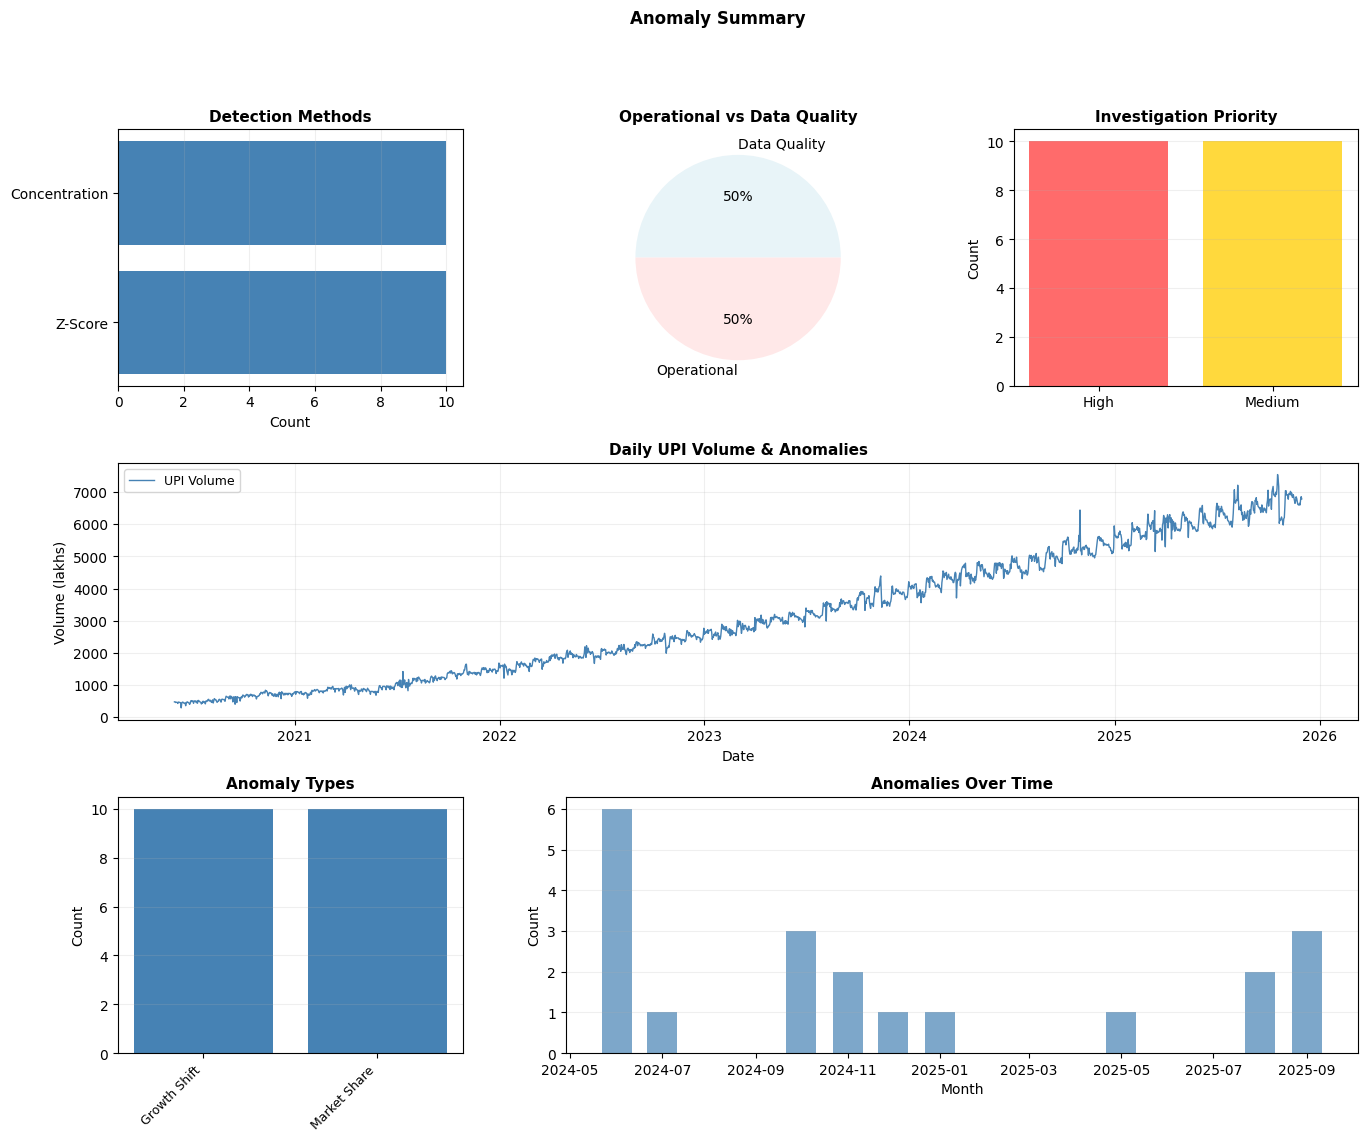

In [54]:
# Visualization Dashboard

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

try:
    # Plot 1: Detection methods
    ax = fig.add_subplot(gs[0, 0])
    if final_anomaly_list:
        method_counts = summary_df['Method'].value_counts()
        ax.barh(method_counts.index, method_counts.values, color='steelblue')
        ax.set_xlabel('Count')
        ax.set_title('Detection Methods', fontsize=11, fontweight='bold')
        ax.grid(axis='x', alpha=0.2)
    
    # Plot 2: Classification breakdown
    ax = fig.add_subplot(gs[0, 1])
    if final_anomaly_list:
        class_counts = summary_df['Classification'].value_counts()
        ax.pie(class_counts.values, labels=class_counts.index, autopct='%1.0f%%', 
               colors=['#e8f4f8', '#ffe8e8'])
        ax.set_title('Operational vs Data Quality', fontsize=11, fontweight='bold')
    
    # Plot 3: Priority levels
    ax = fig.add_subplot(gs[0, 2])
    if final_anomaly_list:
        priority_counts = summary_df['Priority'].value_counts()
        priority_order = ['High', 'Medium', 'Low']
        priority_counts = priority_counts.reindex([p for p in priority_order if p in priority_counts.index])
        colors = ['#ff6b6b', '#ffd93d', '#6bcf7f']
        ax.bar(priority_counts.index, priority_counts.values, color=colors[:len(priority_counts)])
        ax.set_ylabel('Count')
        ax.set_title('Investigation Priority', fontsize=11, fontweight='bold')
        ax.grid(axis='y', alpha=0.2)
    
    # Plot 4: UPI volume with anomalies
    ax = fig.add_subplot(gs[1, :])
    daily_upi = psddp[['date', 'upi_vol']].sort_values('date')
    ax.plot(daily_upi['date'], daily_upi['upi_vol'], color='steelblue', linewidth=1, label='UPI Volume')
    
    if 'z_anomalies' in dir() and hasattr(z_anomalies, 'sum') and z_anomalies.sum() > 0:
        try:
            z_idx = z_anomalies[z_anomalies].index
            ax.scatter(psddp.loc[z_idx, 'date'], psddp.loc[z_idx, 'upi_vol'], 
                      color='red', s=60, marker='x', label='Anomaly', zorder=5)
        except:
            pass
    
    ax.set_ylabel('Volume (lakhs)')
    ax.set_xlabel('Date')
    ax.set_title('Daily UPI Volume & Anomalies', fontsize=11, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.2)
    
    # Plot 5: Anomalies by type
    ax = fig.add_subplot(gs[2, 0])
    if final_anomaly_list:
        type_counts = summary_df['Type'].value_counts()
        ax.bar(range(len(type_counts)), type_counts.values, color='steelblue')
        ax.set_xticks(range(len(type_counts)))
        ax.set_xticklabels(type_counts.index, rotation=45, ha='right', fontsize=9)
        ax.set_ylabel('Count')
        ax.set_title('Anomaly Types', fontsize=11, fontweight='bold')
        ax.grid(axis='y', alpha=0.2)
    
    # Plot 6: Monthly trend
    ax = fig.add_subplot(gs[2, 1:])
    if final_anomaly_list:
        summary_df['Month'] = summary_df['Date'].dt.to_period('M')
        monthly = summary_df.groupby('Month').size()
        monthly.index = monthly.index.to_timestamp()
        ax.bar(monthly.index, monthly.values, width=20, color='steelblue', alpha=0.7)
        ax.set_ylabel('Count')
        ax.set_xlabel('Month')
        ax.set_title('Anomalies Over Time', fontsize=11, fontweight='bold')
        ax.grid(axis='y', alpha=0.2)
    
    plt.suptitle('Anomaly Summary', fontsize=12, fontweight='bold')
    plt.show()
    
    
except Exception as e:
    print(f"Error: {e}")

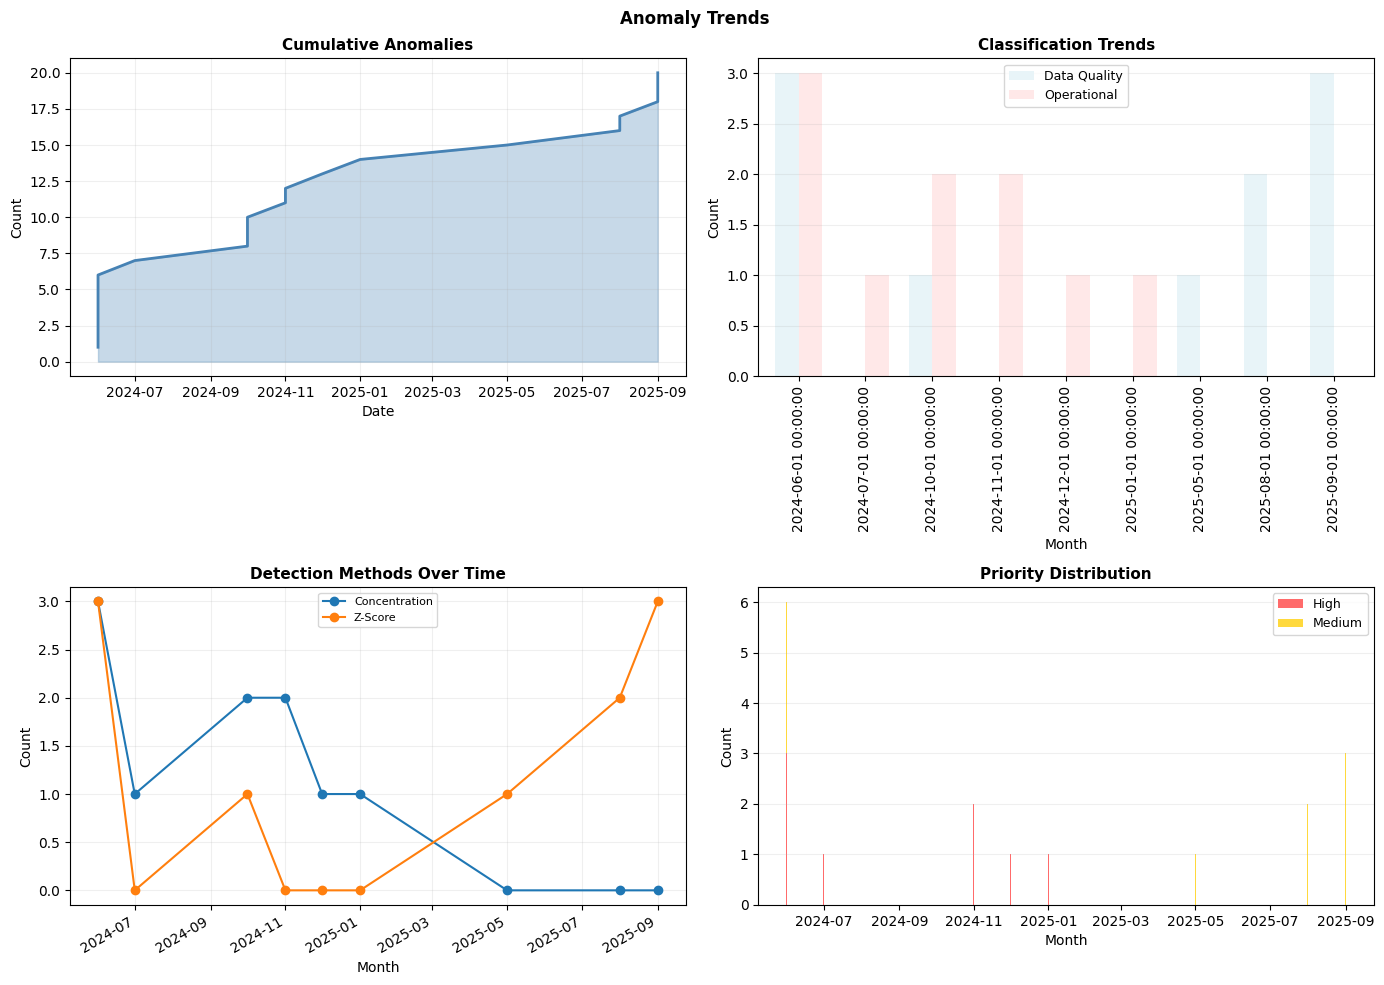

In [55]:
# Anomaly Trends

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

try:
    # Chart 1: Cumulative anomalies
    ax = axes[0, 0]
    if final_anomaly_list:
        df_sorted = summary_df.sort_values('Date')
        df_sorted['Cumulative'] = range(1, len(df_sorted) + 1)
        ax.plot(df_sorted['Date'], df_sorted['Cumulative'], color='steelblue', linewidth=2)
        ax.fill_between(df_sorted['Date'], 0, df_sorted['Cumulative'], alpha=0.3, color='steelblue')
        ax.set_ylabel('Count')
        ax.set_xlabel('Date')
        ax.set_title('Cumulative Anomalies', fontsize=11, fontweight='bold')
        ax.grid(alpha=0.2)
    
    # Chart 2: Classification by month
    ax = axes[0, 1]
    if final_anomaly_list:
        summary_df['Month'] = summary_df['Date'].dt.to_period('M')
        class_month = pd.crosstab(summary_df['Month'], summary_df['Classification'])
        class_month.index = class_month.index.to_timestamp()
        class_month.plot(kind='bar', ax=ax, color=['#e8f4f8', '#ffe8e8'], width=0.7)
        ax.set_ylabel('Count')
        ax.set_xlabel('Month')
        ax.set_title('Classification Trends', fontsize=11, fontweight='bold')
        ax.legend(fontsize=9)
        ax.grid(axis='y', alpha=0.2)
    
    # Chart 3: Detection method trends
    ax = axes[1, 0]
    if final_anomaly_list:
        summary_df['Month'] = summary_df['Date'].dt.to_period('M')
        method_month = pd.crosstab(summary_df['Month'], summary_df['Method'])
        method_month.index = method_month.index.to_timestamp()
        method_month.plot(kind='line', ax=ax, linewidth=1.5, marker='o')
        ax.set_ylabel('Count')
        ax.set_xlabel('Month')
        ax.set_title('Detection Methods Over Time', fontsize=11, fontweight='bold')
        ax.legend(fontsize=8)
        ax.grid(alpha=0.2)
    
    # Chart 4: Priority by month
    ax = axes[1, 1]
    if final_anomaly_list:
        summary_df['Month'] = summary_df['Date'].dt.to_period('M')
        priority_month = pd.crosstab(summary_df['Month'], summary_df['Priority'])
        priority_month.index = priority_month.index.to_timestamp()
        
        if 'High' in priority_month.columns:
            ax.bar(priority_month.index, priority_month.get('High', 0), label='High', color='#ff6b6b')
        if 'Medium' in priority_month.columns:
            ax.bar(priority_month.index, priority_month.get('Medium', 0), 
                   bottom=priority_month.get('High', 0), label='Medium', color='#ffd93d')
        ax.set_ylabel('Count')
        ax.set_xlabel('Month')
        ax.set_title('Priority Distribution', fontsize=11, fontweight='bold')
        ax.legend(fontsize=9)
        ax.grid(axis='y', alpha=0.2)
    
    plt.suptitle('Anomaly Trends', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Note on trends analysis: {e}")
    import traceback
    traceback.print_exc()